Disclaimer: Artifical Intelligence was used throughout this code to assist in streamlining the building of larger & redundant chunks, to create performance improvements, and to help in the debugging process. The following is original work with AI assistance.

#Preinitialization

In [5]:
#Preinitialization:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

!apt-get install graphviz
!pip install graphviz






data = pd.read_csv('coursework_data_20595117.csv')



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# Step 1

Brief look into the data



In [ ]:
data.head()

age          job  marital  education default  balance housing loan  \
0   45  blue-collar  married    primary      no      300     yes   no   
1   35       admin.  married   tertiary      no      163     yes   no   
2   29  blue-collar  married    primary      no        5      no   no   
3   46   technician  married  secondary      no      488      no   no   
4   56     services   single  secondary      no      699     yes   no   

    contact  day  duration  campaign  pdays  previous poutcome    y  
0  cellular   29       203         1    261         3  failure   no  
1  cellular    6       126         6     -1         0  unknown   no  
2  cellular    3       321         1     -1         0  unknown  yes  
3   unknown    5        92         1     -1         0  unknown   no  
4  cellular   20       193         1     -1         0  unknown   no

# Step 2

*Initial Exploration of Variables*

Variables in detail:

| Type   | Name      | Feature Description                                                                                                     |
|--------|-----------|-------------------------------------------------------------------------------------------------------------------------|
| input  | age       | The called individual's age in years (numeric)                                                                          |
| input  | job       | The individual's declared job role (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',                  |
|        |           | 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')                 |
| input  | marital   | The individual's marital status (categorical: 'divorced', 'married', 'single', 'unknown')                               |
| input  | education | Declared education level (categorical: 'primary', 'secondary', 'tertiary', 'unknown')                                   |
| input  | default   | Does this person have credit they are defaulting on (categorical: 'no', 'yes', 'unknown')                               |
| input  | balance   | What is the person's current balance at the bank (if any)? (numeric)                                                    |
| input  | housing   | Has taken out a housing loan? (categorical: 'no', 'yes', 'unknown')                                                     |
| input  | loan      | Has taken out a personal loan? (categorical: 'no', 'yes', 'unknown')                                                    |
| input  | contact   | Contact communication type (categorical: 'cellular', 'telephone', 'unknown')                                            |
| input  | day       | Day of the month the individual was last contacted (numerical)                                                          |
| input  | duration  | Last contact duration, in seconds (numeric). Important note: This attribute highly affects the output target            |
|        |           | (e.g., if duration=0 then y='no'), but will not be known for future calls. It may be used within analysis               |
|        |           | (and please do), but should not be used within a predictive model for new customers.                                    |
| input  | campaign  | Number of contacts performed during this campaign and for this client (numeric, includes last contact)                  |
| input  | pdays     | The number of days that passed by after the client was last contacted in a previous campaign (numeric; -1 means client  |
|        |           | was not previously contacted)                                                                                          |
| input  | previous  | Prior number of contacts performed before this campaign and for this client (numeric)                                   |
| input  | poutcome  | Result of trying to sell the individual something on a previous campaign (categorical: 'failure', 'success',            |
|        |           | 'other', 'unknown')                                                                                                    |
| output | y         | The output feature we must try to understand and predict - whether the call to this individual resulted in a sale       |
|        |           | (categorical: 'yes', 'no')                                                                                             |


In [ ]:
# Initialize Dictionaries for Categorical and Numberical Variables for use in variable exploration graphs
categorical_vars_dict = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numerical_vars_dict = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
output_var = 'y'

In [ ]:
output_counts = data[output_var].value_counts()
total_count = len(data)

# Display the counts and frequencies
print("Output Variable Counts:")
print(output_counts)

print("\nOutput Variable Frequencies:")
print(output_counts / total_count)

print("\nTotal Count:", total_count)

Output Variable Counts:
y
no     3153
yes     847
Name: count, dtype: int64

Output Variable Frequencies:
y
no     0.78825
yes    0.21175
Name: count, dtype: float64

Total Count: 4000


Visualization of Categorical Variables and Heatmap of all Variables

Frequency Tables for Categorical Variables

Variable: job
y               no  yes
job                    
student         44   39
retired        146   86
unknown         24    9
unemployed      95   29
management     692  210
technician     516  140
admin.         374   94
services       285   69
housemaid       98   19
self-employed  107   20
entrepreneur   109   19
blue-collar    663  113


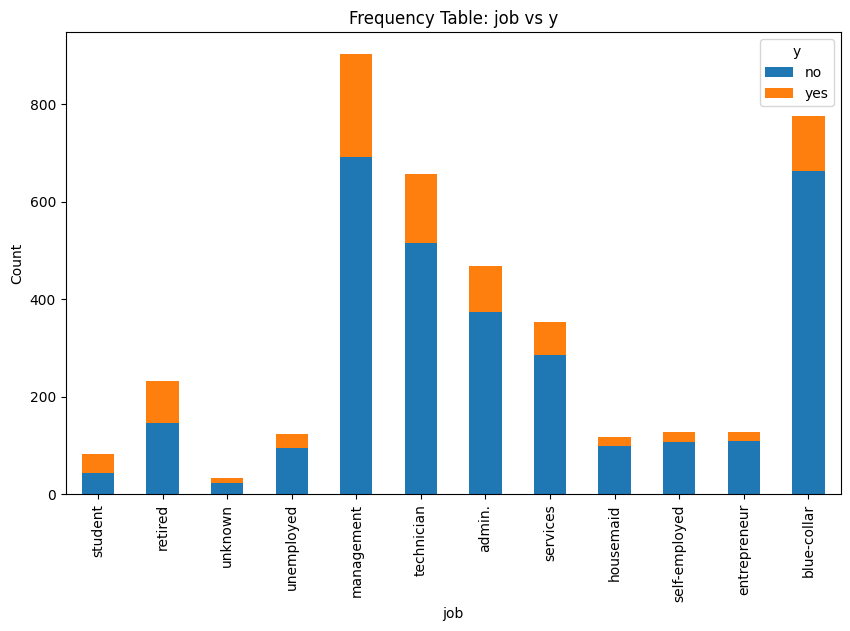


Variable: marital
y           no  yes
marital            
single     869  305
divorced   339  117
married   1945  425


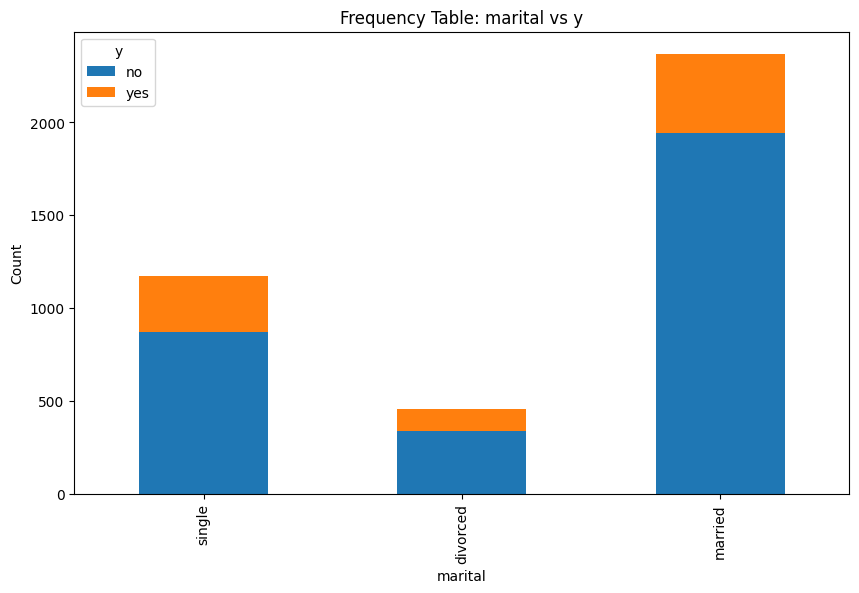


Variable: education
y            no  yes
education           
tertiary    905  322
unknown     143   42
secondary  1593  384
primary     512   99


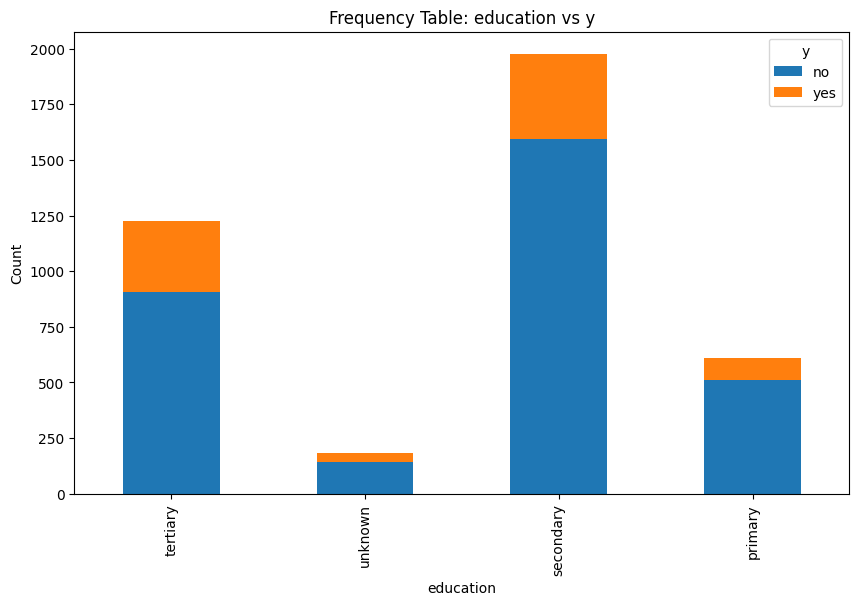


Variable: default
y          no  yes
default           
no       3101  837
yes        52   10


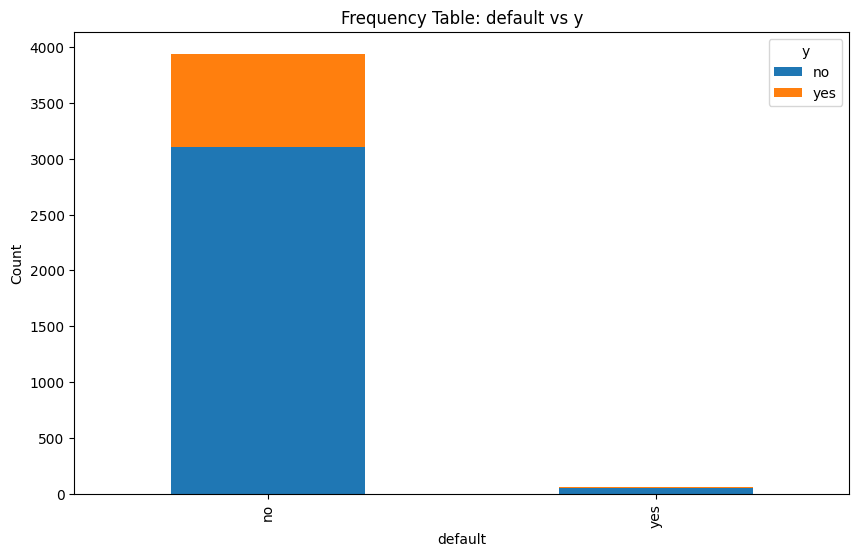


Variable: housing
y          no  yes
housing           
no       1325  540
yes      1828  307


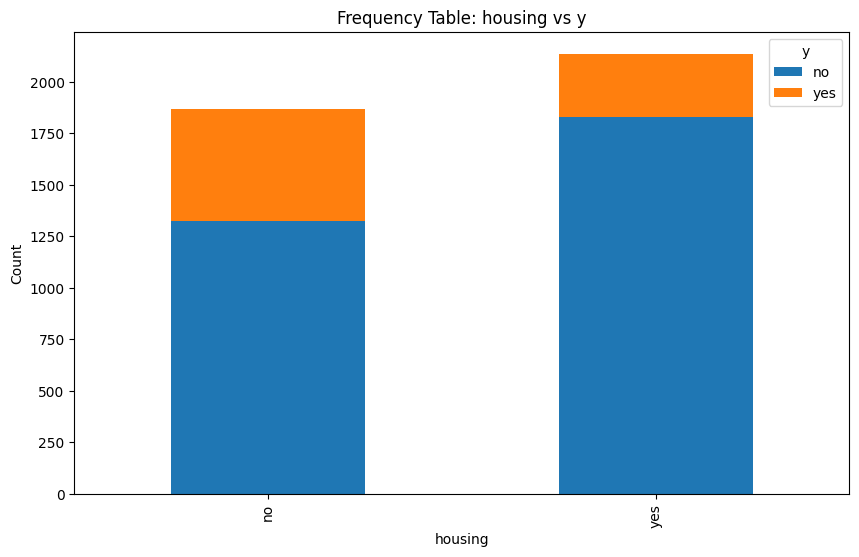


Variable: loan
y       no  yes
loan           
no    2643  765
yes    510   82


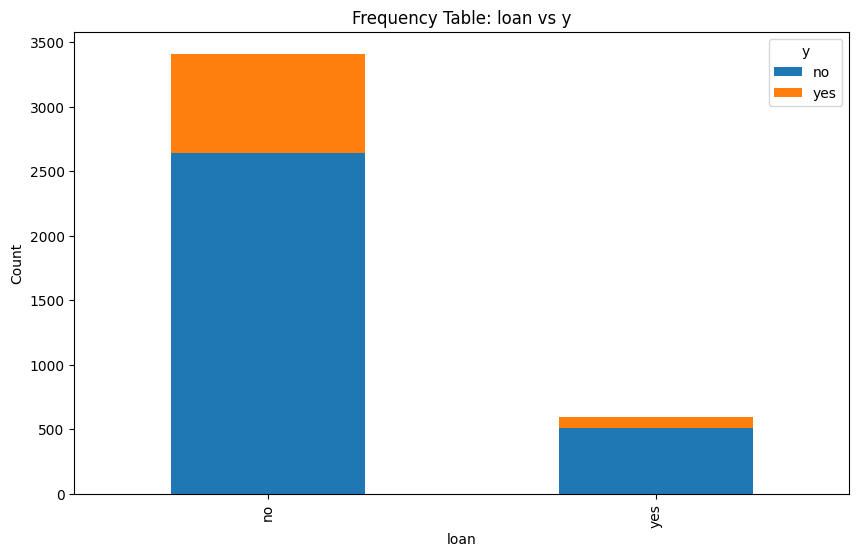


Variable: contact
y            no  yes
contact             
telephone   183   70
cellular   1990  694
unknown     980   83


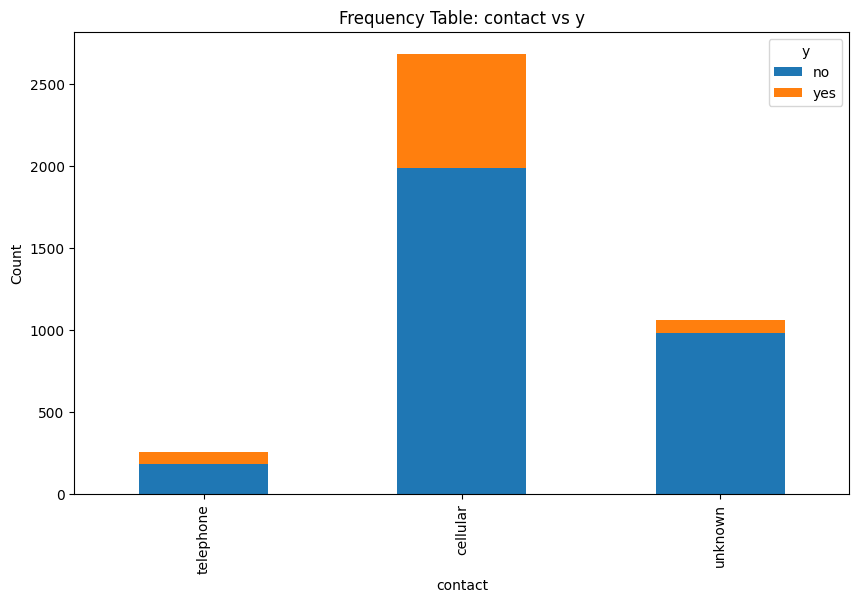


Variable: poutcome
y           no  yes
poutcome           
success     30  154
other      123   44
failure    352   99
unknown   2648  550


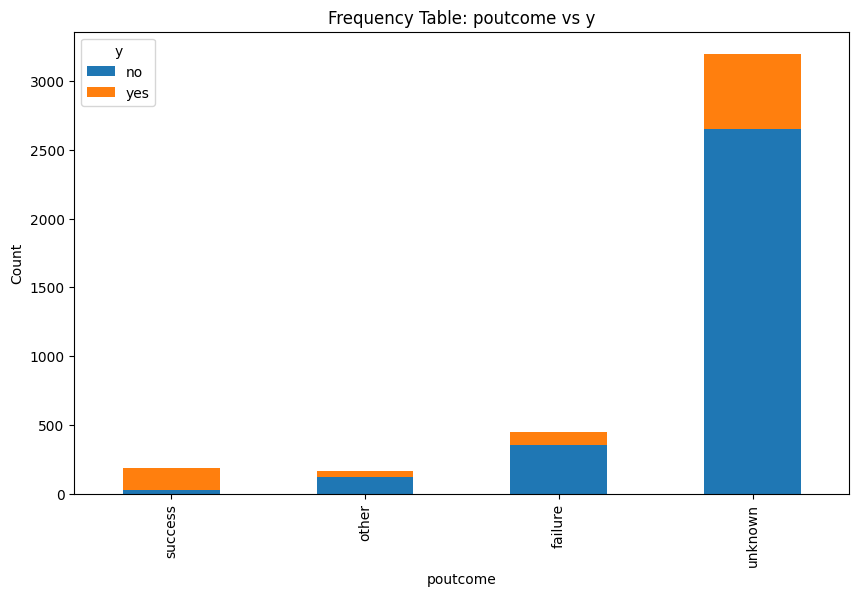

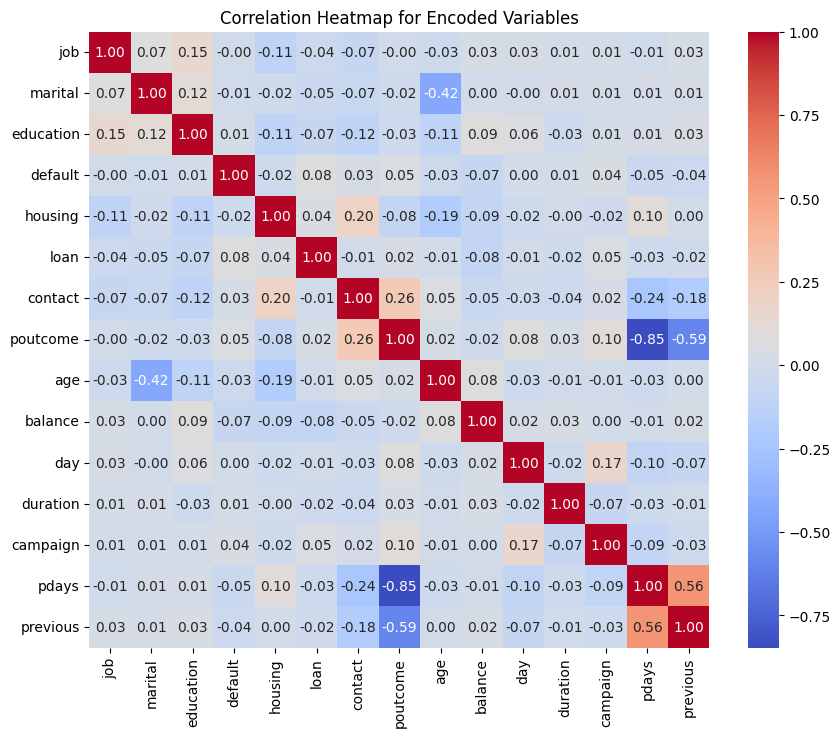

In [ ]:
# Frequency tables and bar plots for categorical variables
print("Frequency Tables for Categorical Variables")
for var in categorical_vars_dict:
    print(f"\nVariable: {var}")
    freq_table = pd.crosstab(data[var], data[output_var])

    # Calculate yes/no ratio and sort for graphs ordered by yes/no ratio
    freq_table['ratio'] = freq_table['yes'] / freq_table['no']
    freq_table = freq_table.sort_values(by=['ratio'], ascending=False)
    freq_table = freq_table.drop(columns=['ratio']) #Remove ratio column after sorting

    print(freq_table)

    # Bar plot for categorical variable
    freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Frequency Table: {var} vs {output_var}')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.legend(title=output_var)
    plt.show()

    # Copy the dataset to avoid modifying the original
    data_encoded = data.copy()

    # List of categorical variables to encode
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

    # Encode categorical variables
    for feature in categorical_features:
      le = LabelEncoder()
      data_encoded[feature] = le.fit_transform(data_encoded[feature])




Numerical Variable Visualization


Summary Statistics for Numerical Variables
                mean  median      variance     min    25%    50%      75%  \
age         41.34425    39.0  1.222358e+02    18.0   33.0   39.0    49.00   
balance   1402.80350   488.0  7.225468e+06 -3058.0   89.0  488.0  1601.50   
day         15.78900    16.0  6.994847e+01     1.0    8.0   16.0    21.00   
duration   290.02375   194.0  8.596907e+04     2.0  109.0  194.0   358.25   
campaign     2.65975     2.0  8.806181e+00     1.0    1.0    2.0     3.00   
pdays       43.85400    -1.0  1.090483e+04    -1.0   -1.0   -1.0    -1.00   
previous     0.63900     0.0  3.709606e+00     0.0    0.0    0.0     0.00   

              max  
age          93.0  
balance   36221.0  
day          31.0  
duration   3183.0  
campaign     50.0  
pdays       850.0  
previous     24.0  


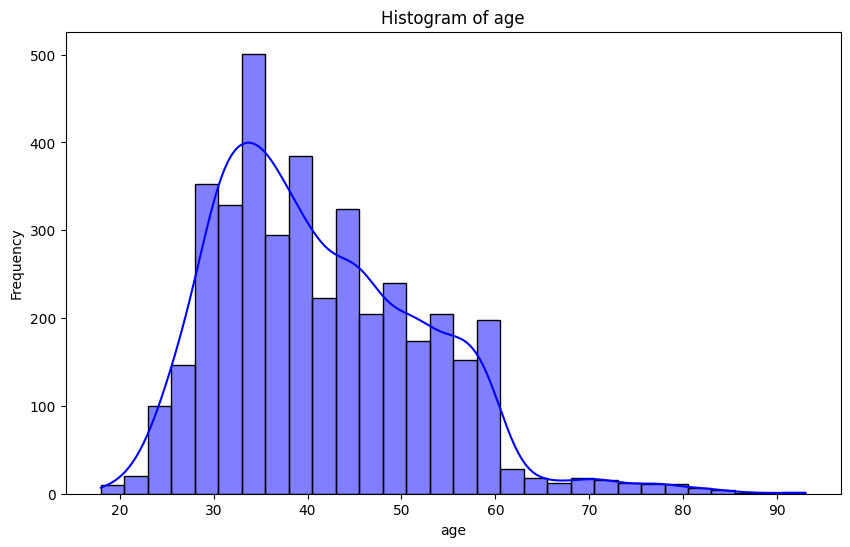

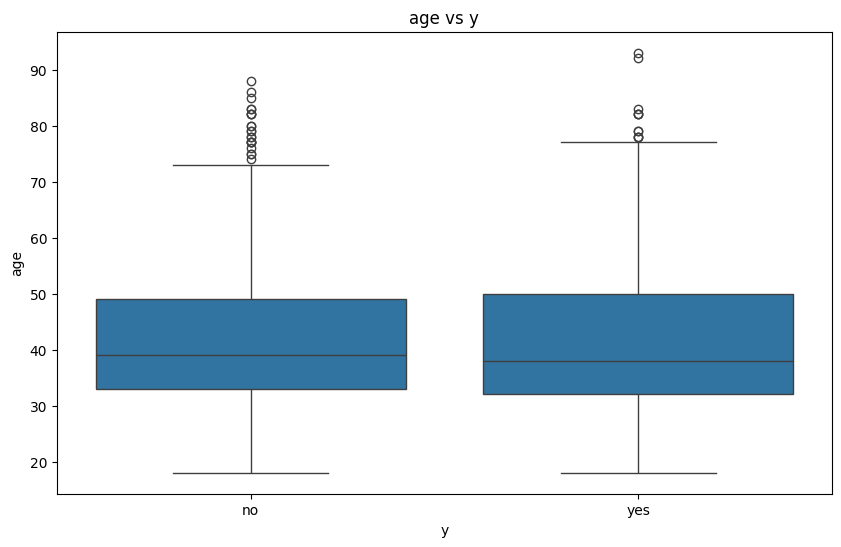

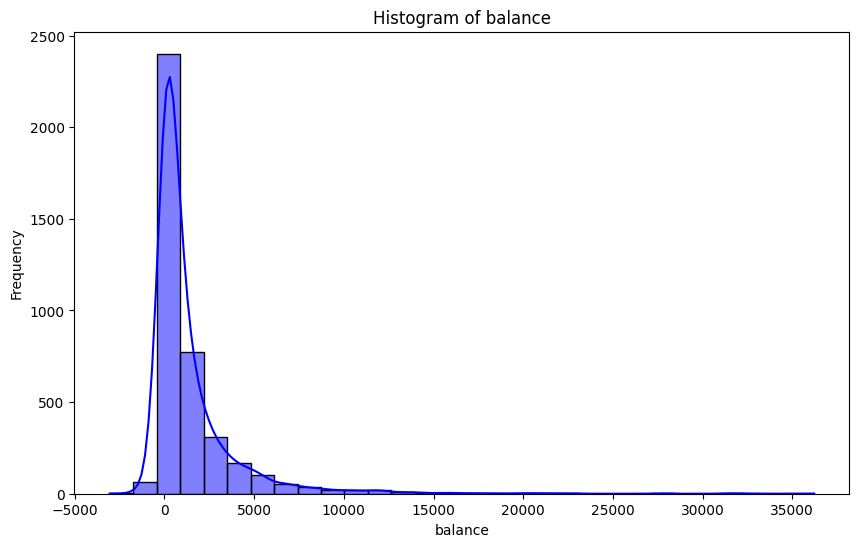

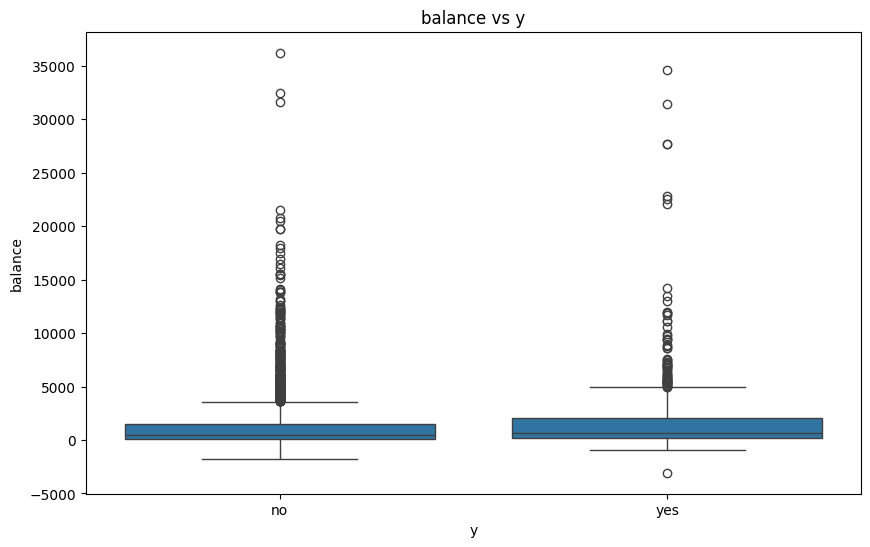

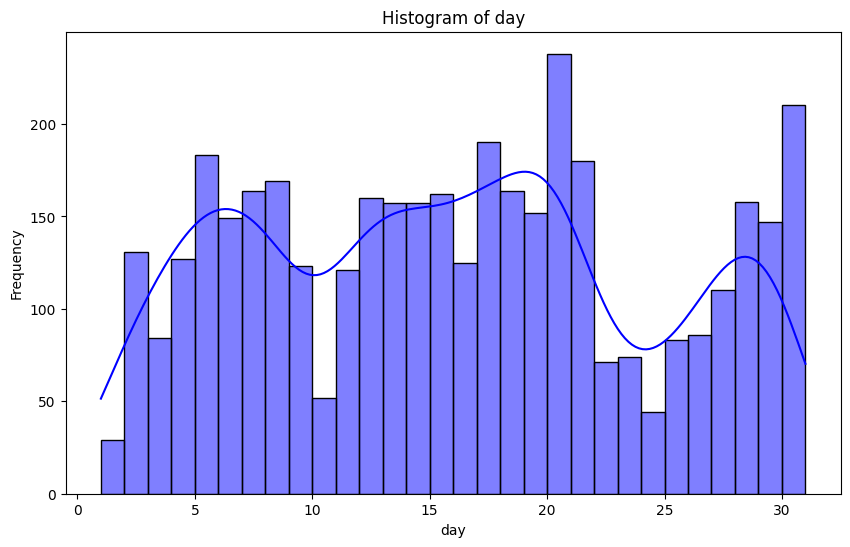

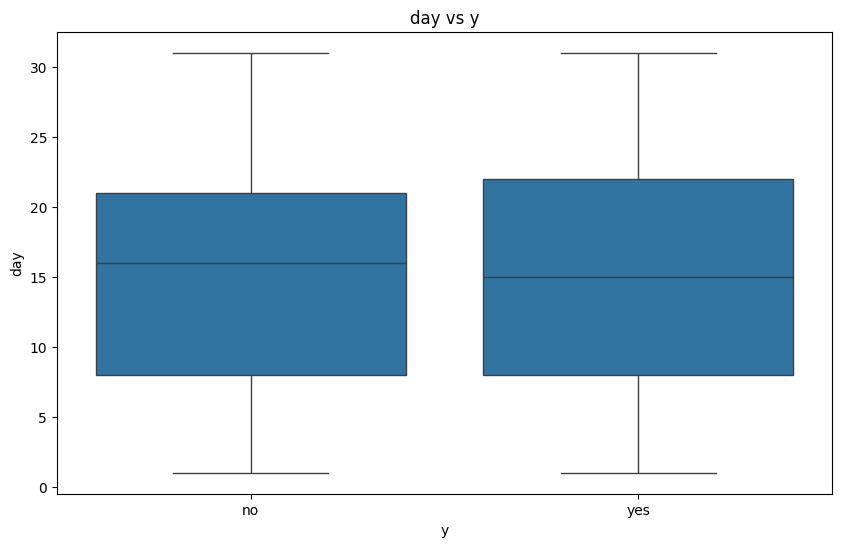

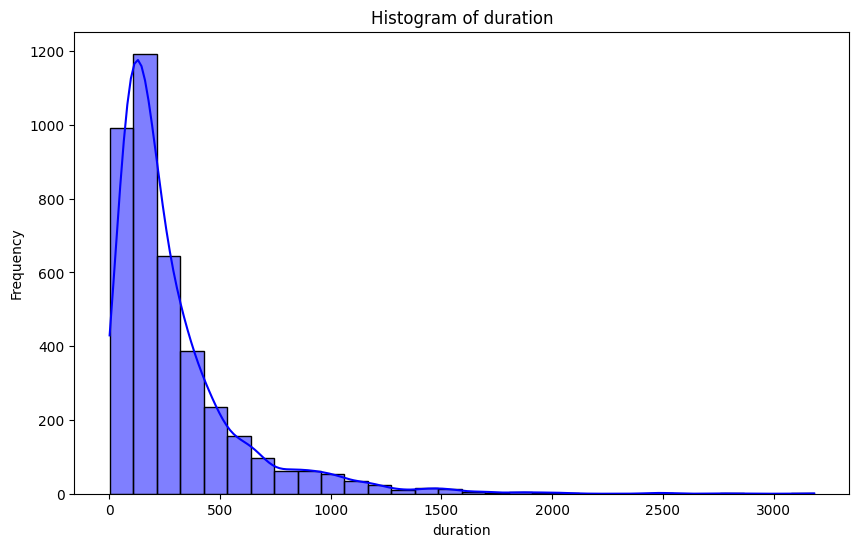

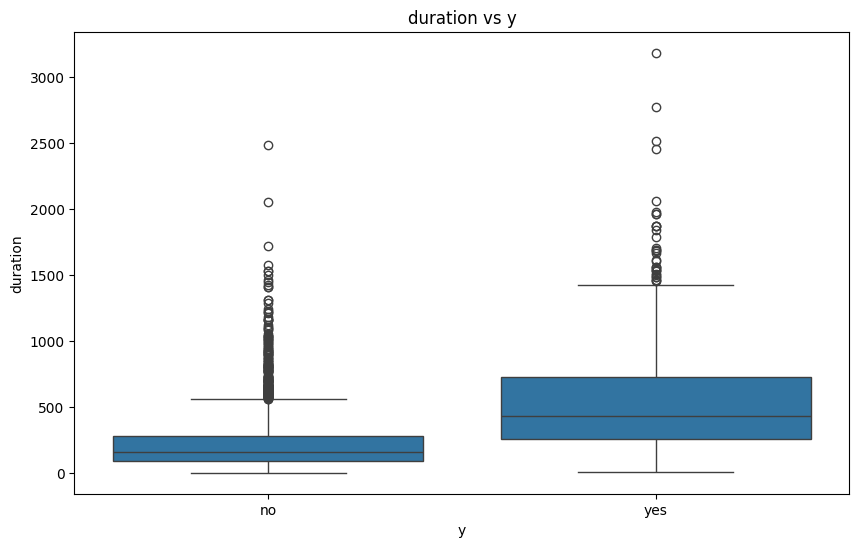

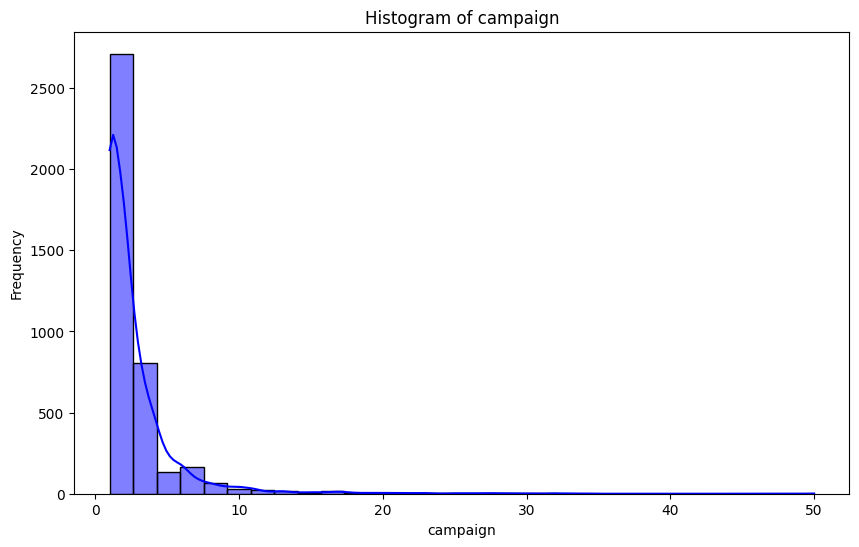

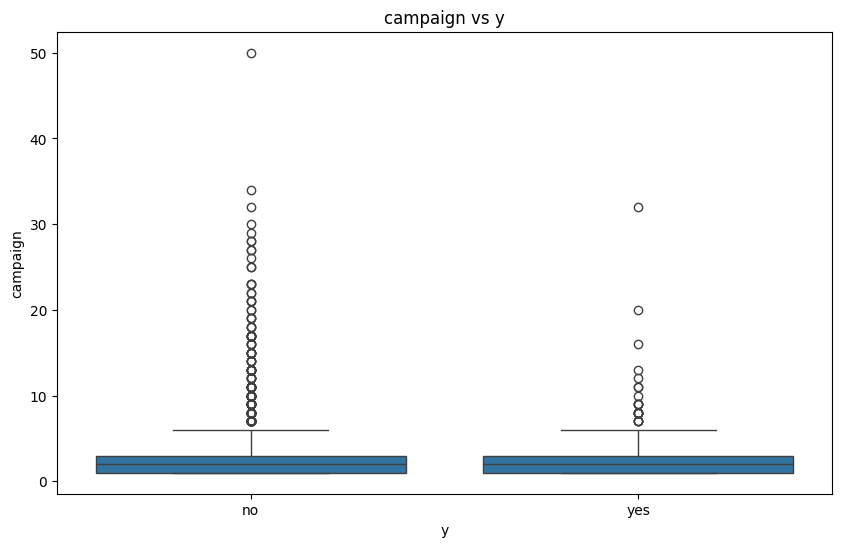

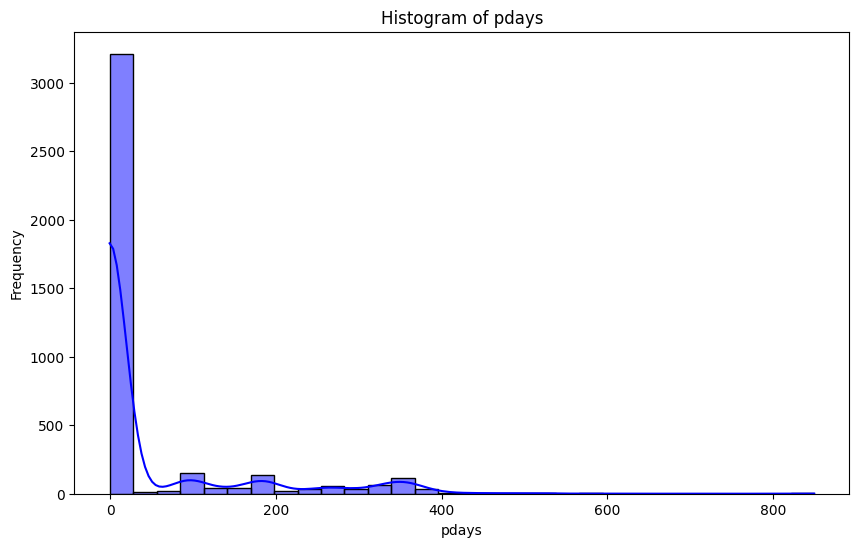

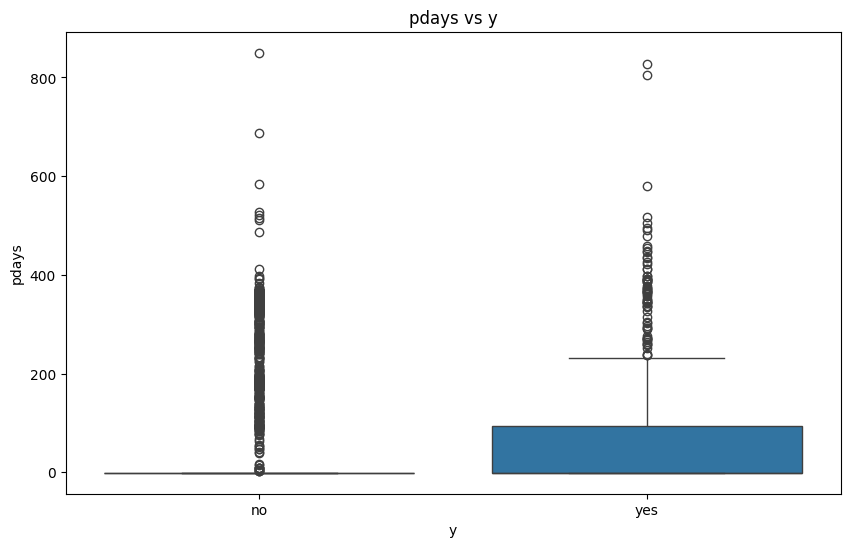

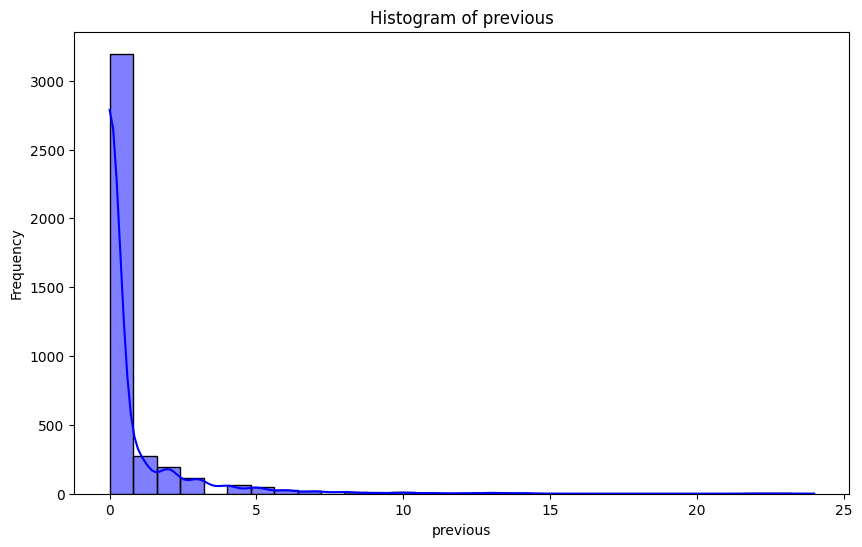

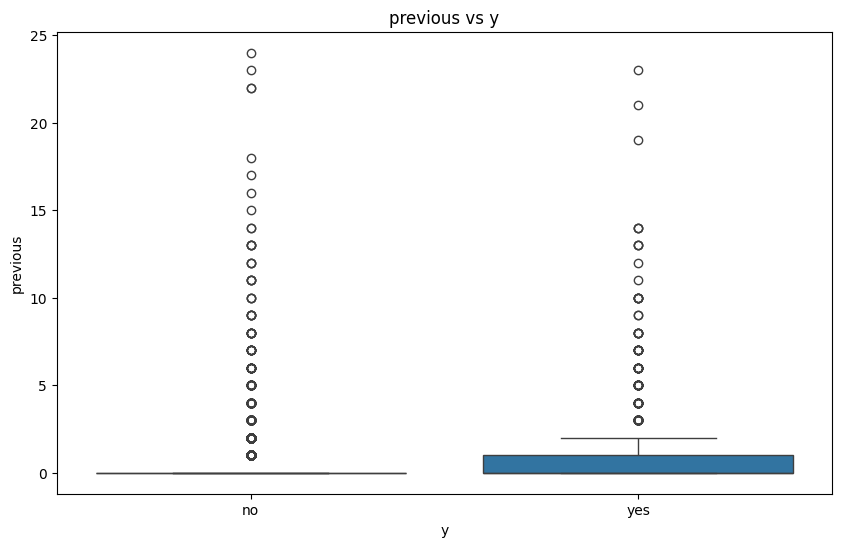

In [ ]:
#
# Summary statistics with mean, median, and variance
print("\nSummary Statistics for Numerical Variables")
summary_stats = data[numerical_vars_dict].describe().T  # Transpose for readability
summary_stats['median'] = data[numerical_vars_dict].median()
summary_stats['variance'] = data[numerical_vars_dict].var()
print(summary_stats[['mean', 'median', 'variance', 'min', '25%', '50%', '75%', 'max']])

# Visualizations for each numerical variable
for var in numerical_vars_dict:
    # Histogram for numerical variable
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot to show relationship with the output variable
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=output_var, y=var, data=data)
    plt.title(f'{var} vs {output_var}')
    plt.xlabel(output_var)
    plt.ylabel(var)
    plt.show()


# Step 2a

*Further Analysis of variables*


## Relationships between important variables wihtout 'y' included

Scatterplot for Numerical Variables


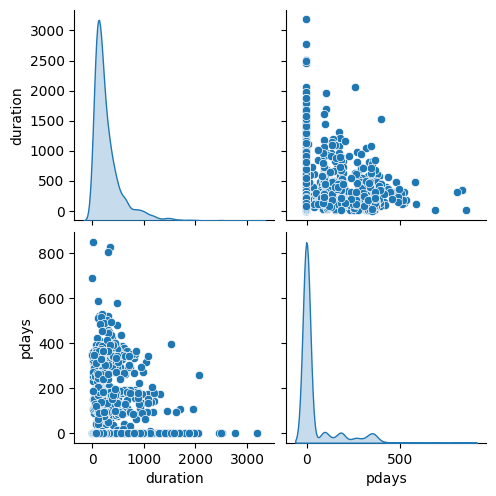

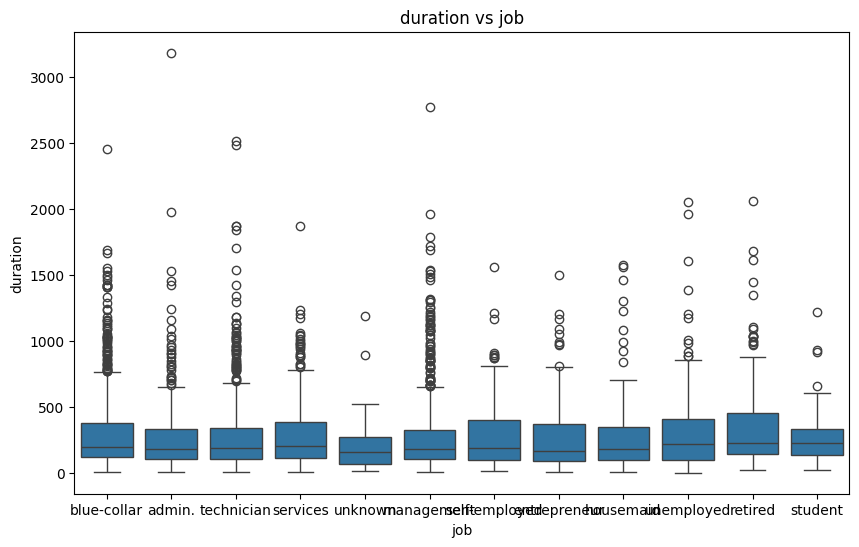

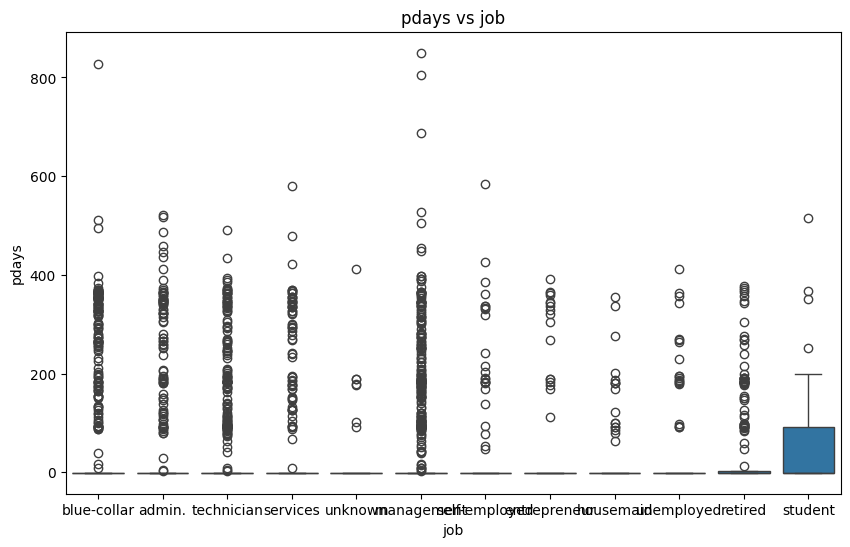

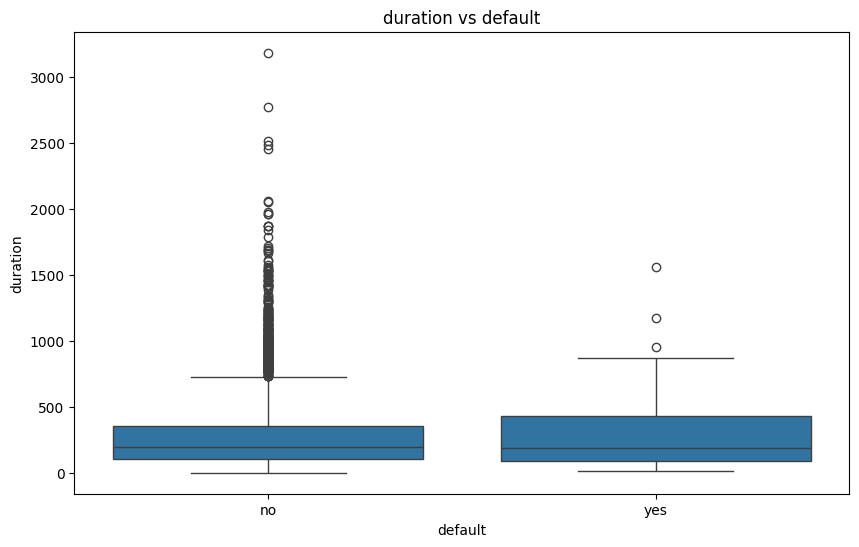

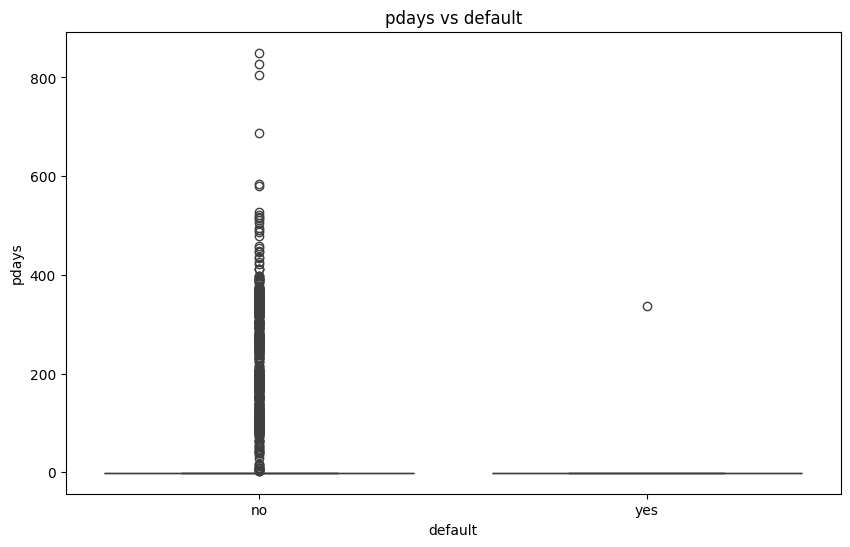

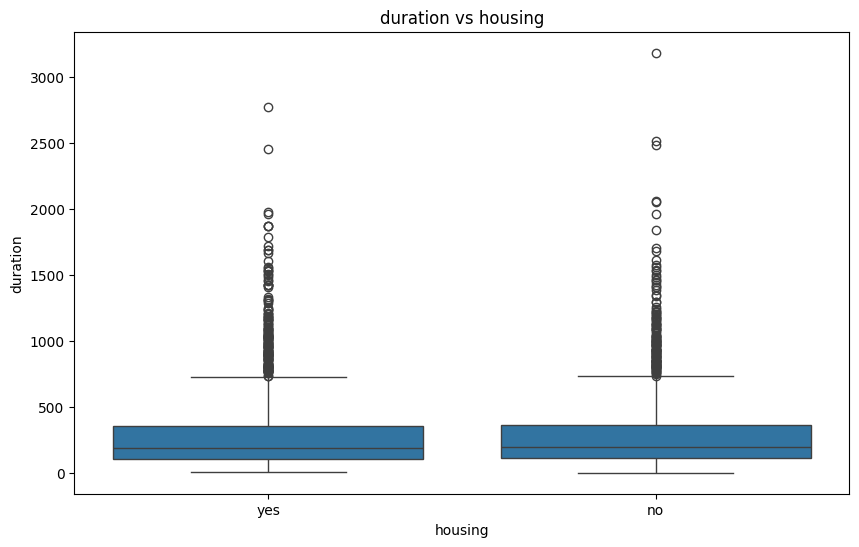

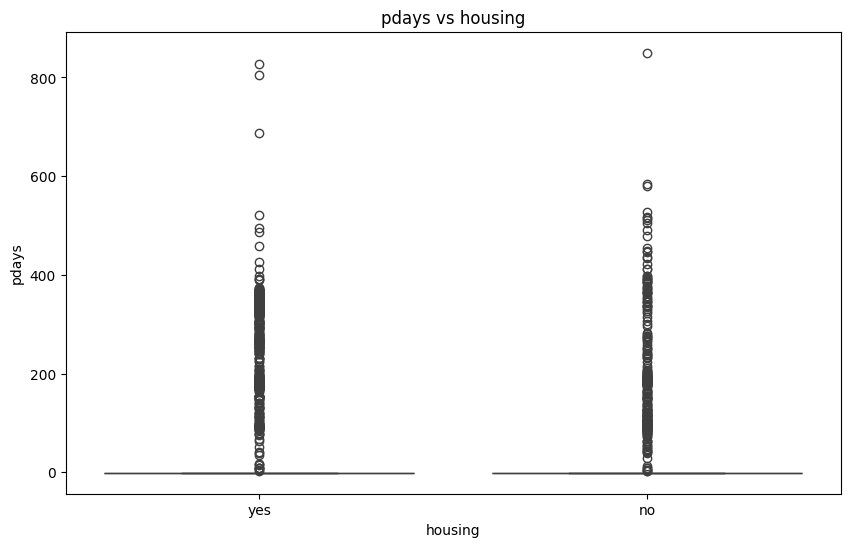

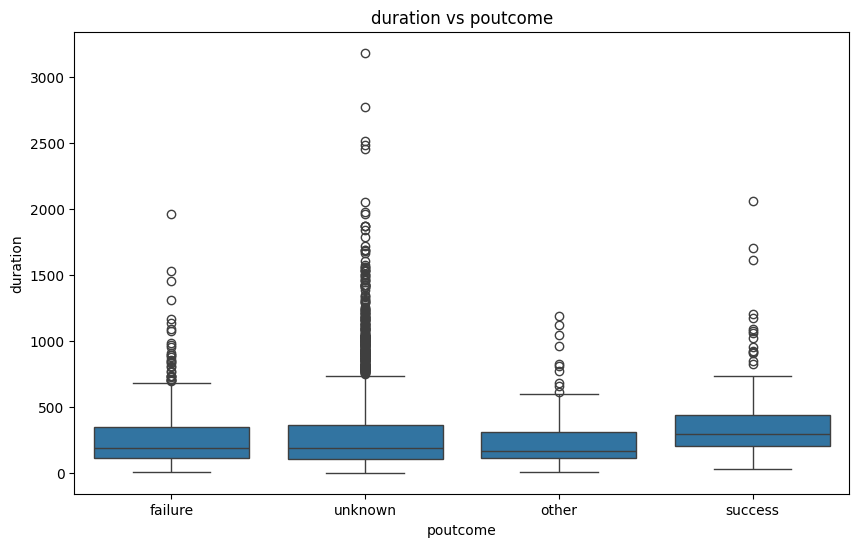

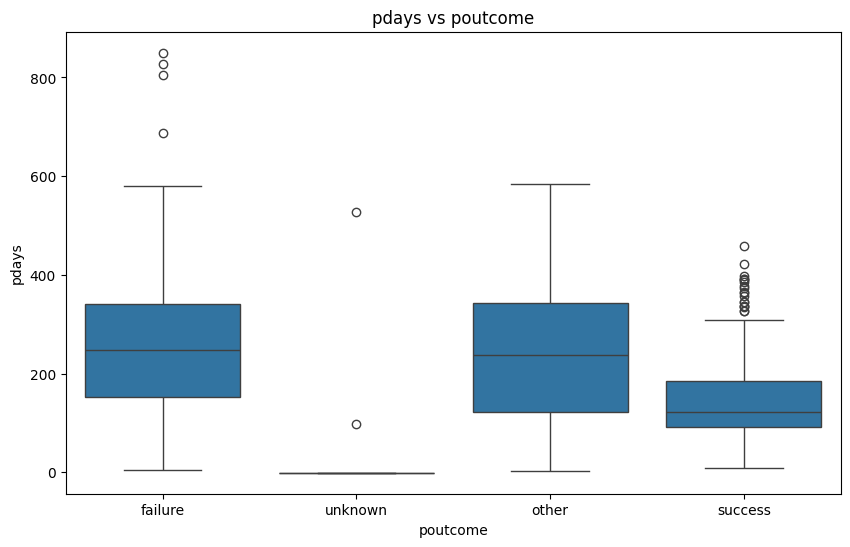

Heatmaps for Categorical Variable Interactions


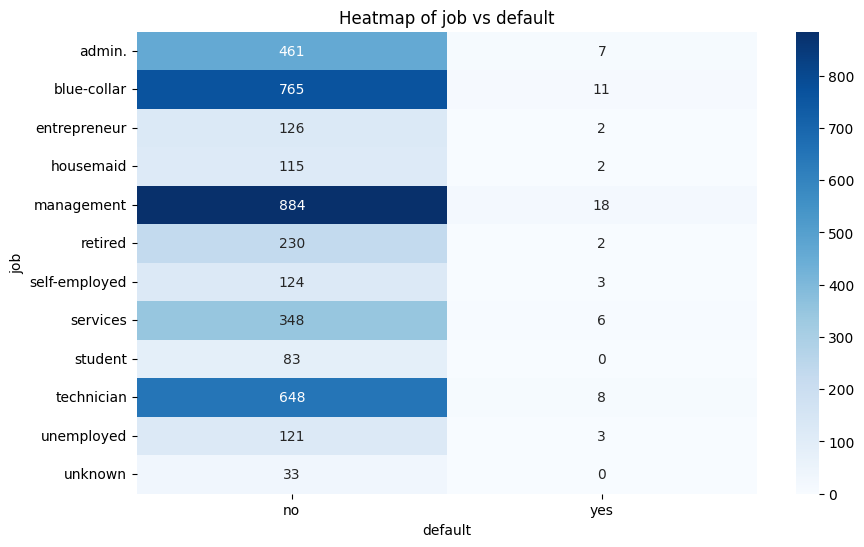

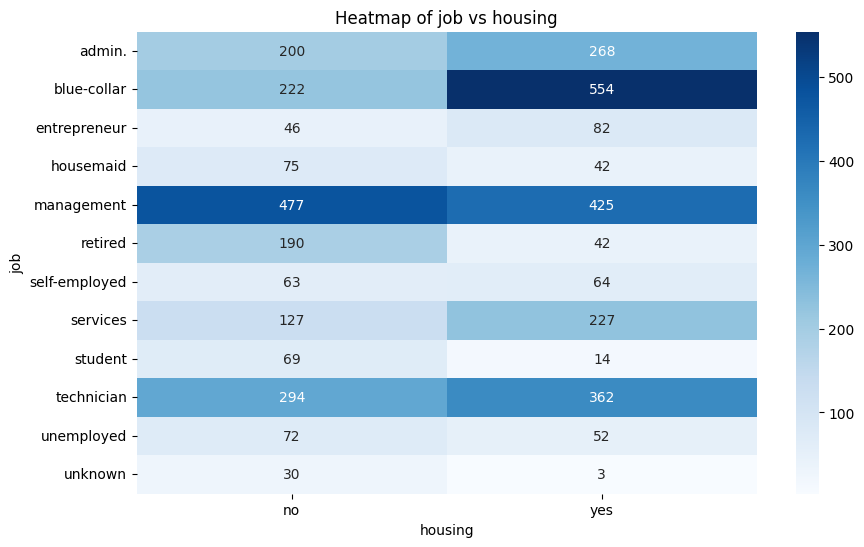

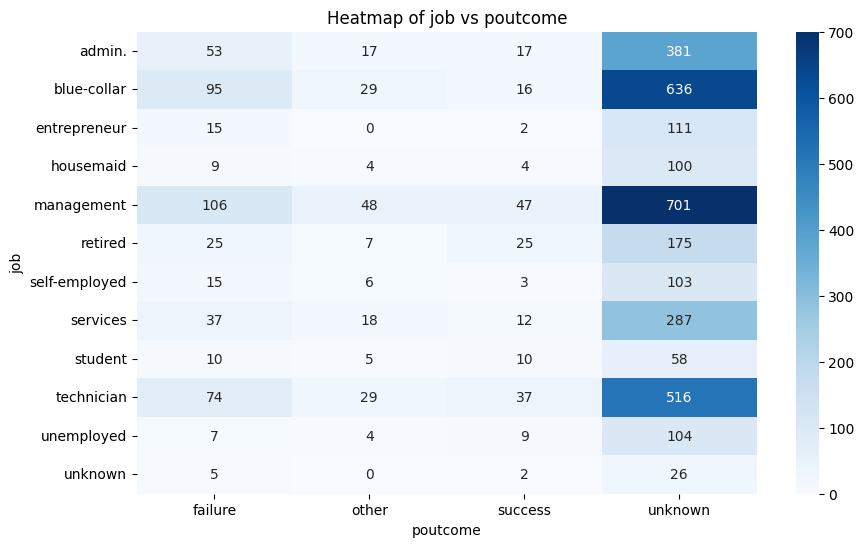

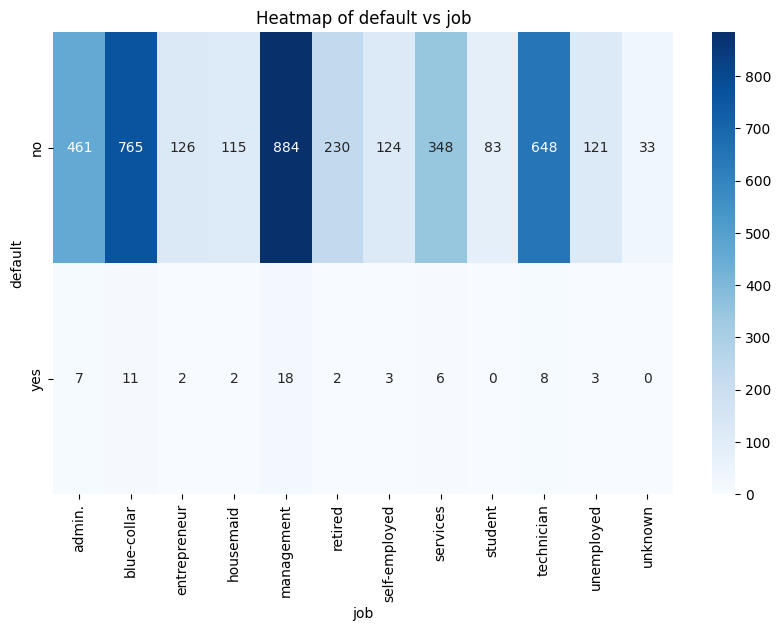

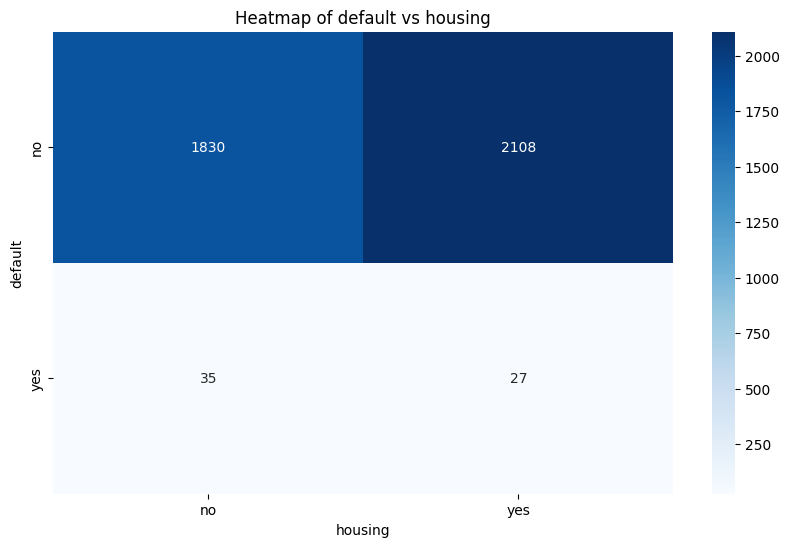

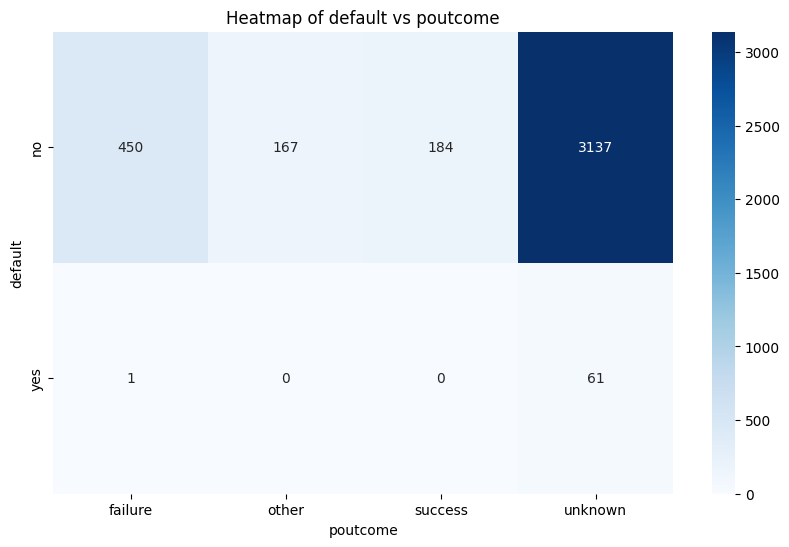

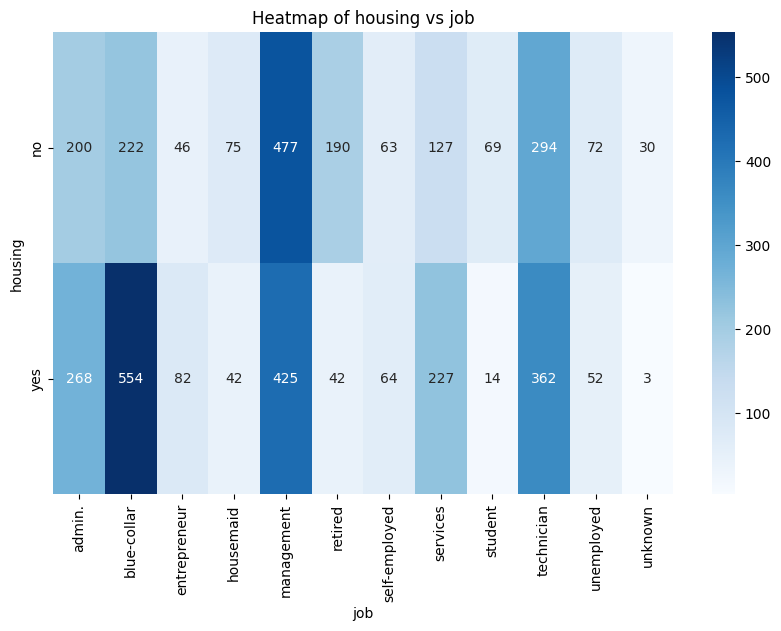

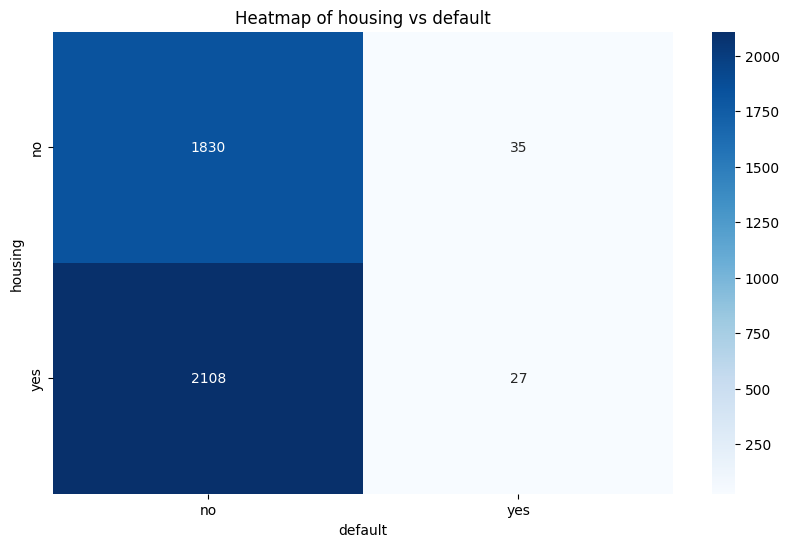

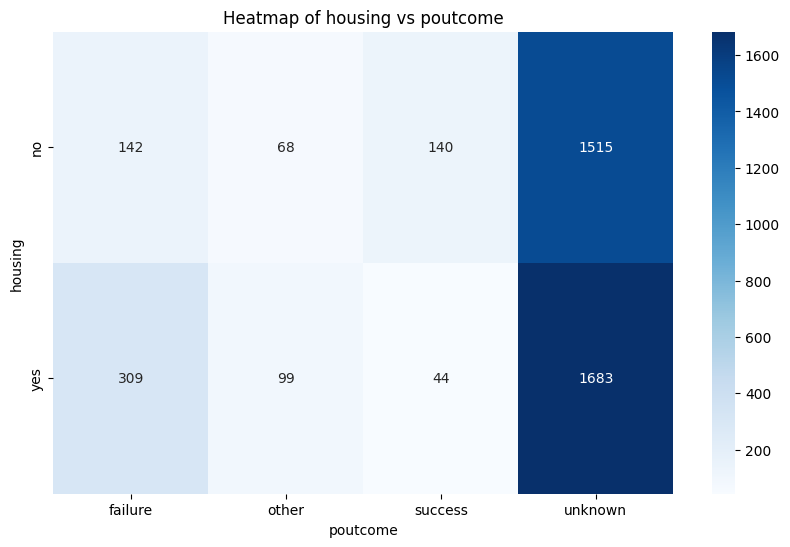

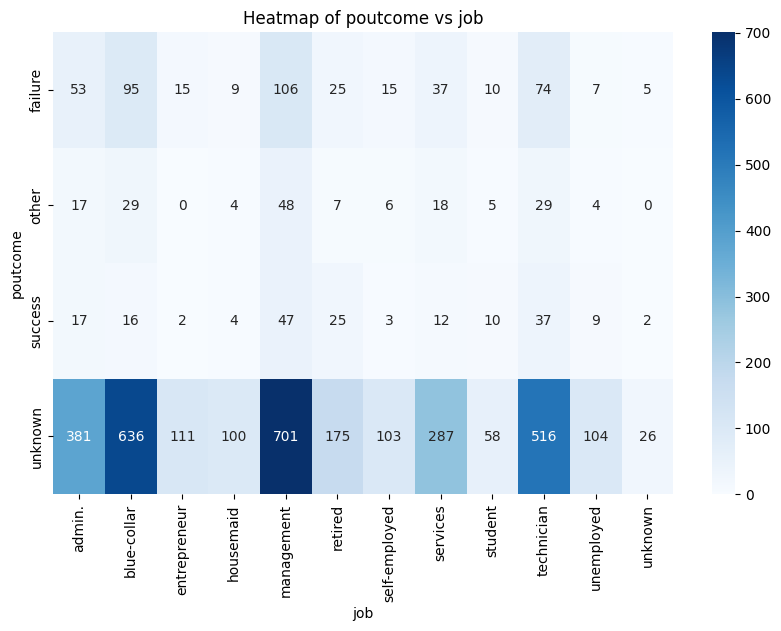

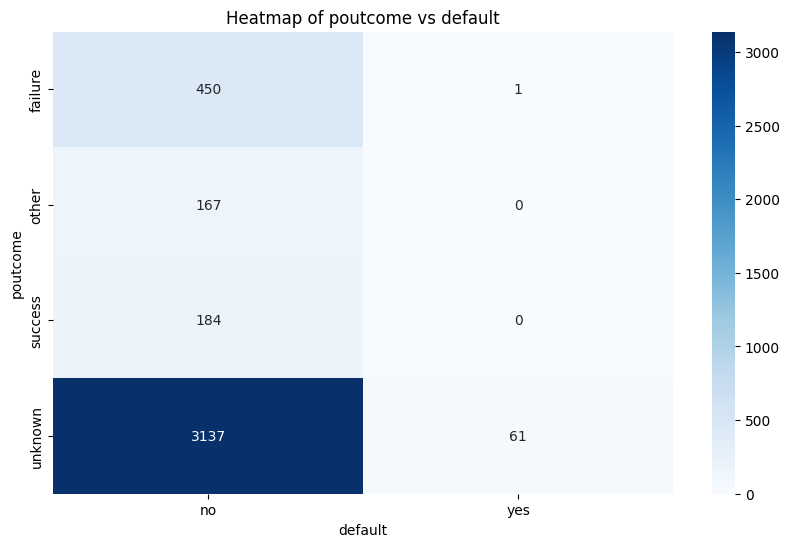

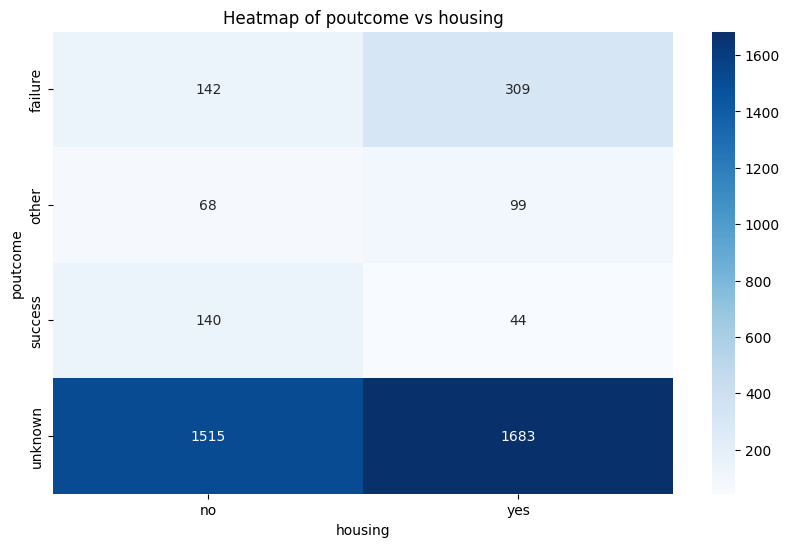

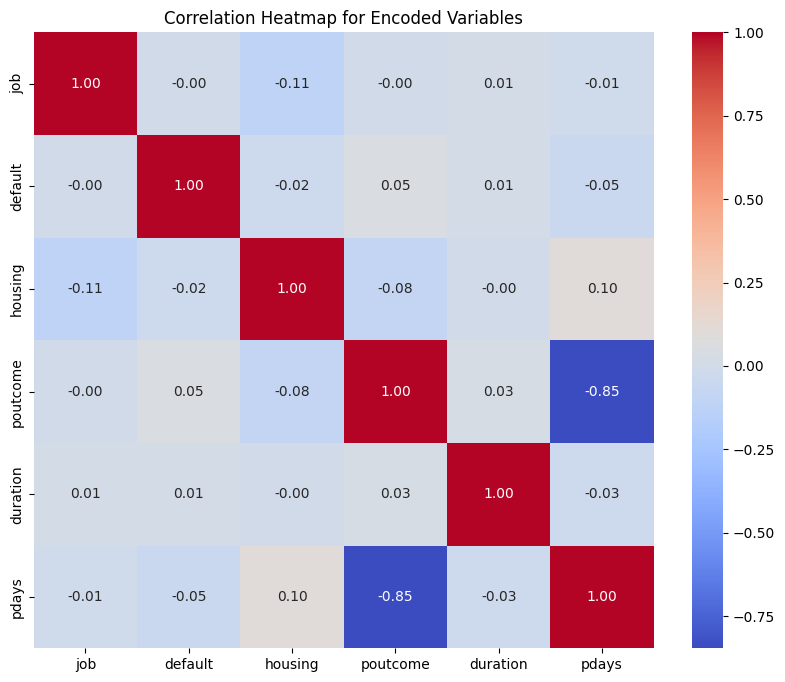

In [ ]:

# Separate numerical and categorical variables
significant_numerical_vars = ['duration', 'pdays']
significant_categorical_vars = ['job', 'default', 'housing', 'poutcome']

# Pairwise Scatterplots for Numerical Variables
print("Scatterplot for Numerical Variables")
sns.pairplot(data[significant_numerical_vars], kind='scatter', diag_kind='kde')
plt.show()

# Boxplots: Numerical Variables vs Categorical Variables
for cat_var in significant_categorical_vars:
    for num_var in significant_numerical_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=num_var, data=data)
        plt.title(f'{num_var} vs {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.show()

# Heatmap for Categorical Variables (Contingency Tables)
print("Heatmaps for Categorical Variable Interactions")
for cat_var1 in significant_categorical_vars:
    for cat_var2 in significant_categorical_vars:
        if cat_var1 != cat_var2:
            plt.figure(figsize=(10, 6))
            contingency_table = pd.crosstab(data[cat_var1], data[cat_var2])
            sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Heatmap of {cat_var1} vs {cat_var2}')
            plt.show()

# Heatmap of Correlation for Numerical and Encoded Categorical Variables
# Encoding categorical variables for correlation matrix
encoded_data = data.copy()
for col in significant_categorical_vars:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = encoded_data[['job', 'default', 'housing', 'poutcome', 'duration', 'pdays']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Encoded Variables')
plt.show()


Some Variables were highly correlated and hard to analyze with the above visualizations, so we created the same visualizations using the log(variables) to see if we could better understand their relationships
- DID NOT END UP USING ANY OF THIS INFORMATION IN OUR ANALYSIS

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Scatterplot for Log-Transformed Numerical Variables


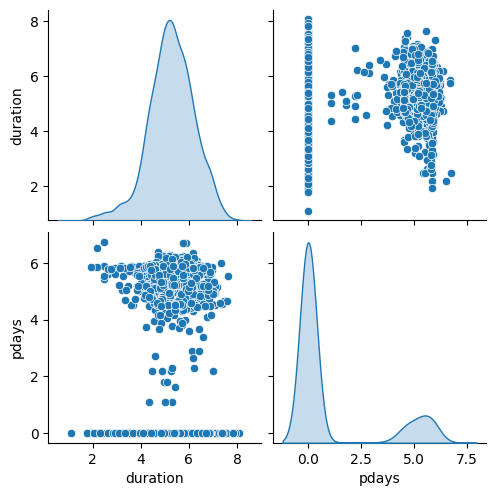

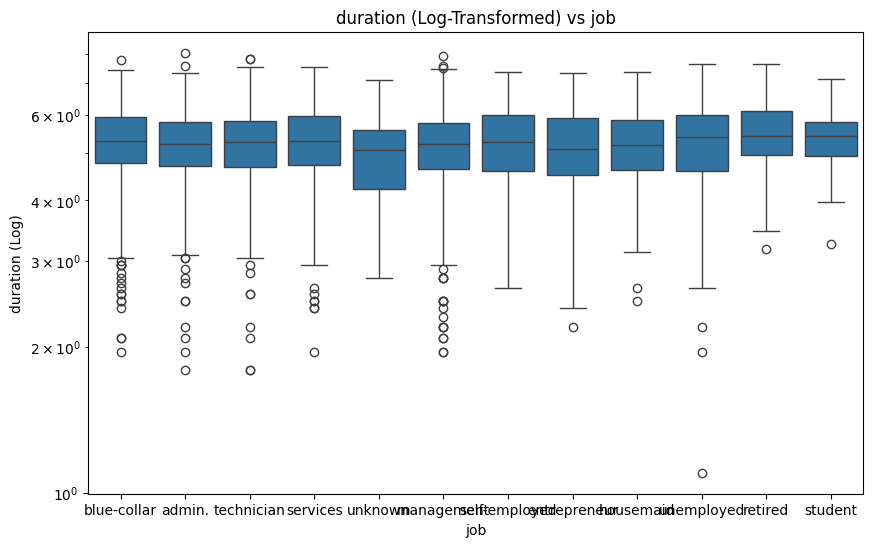

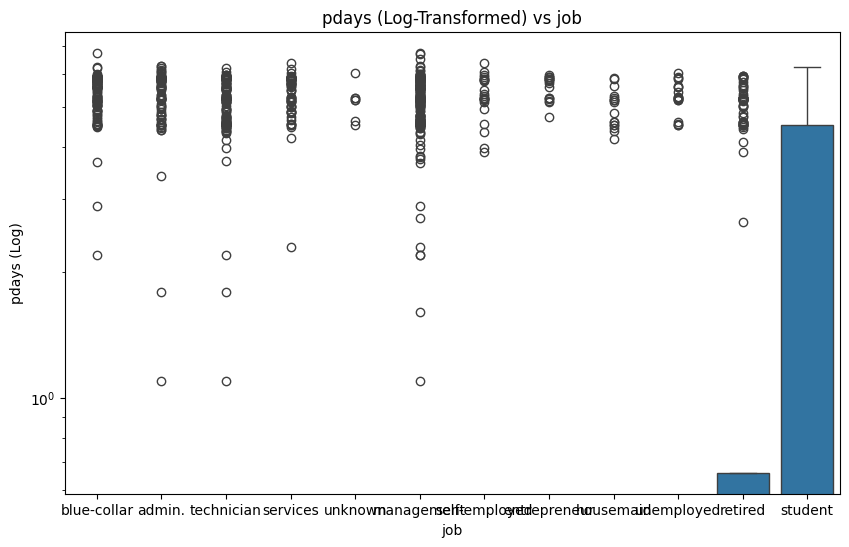

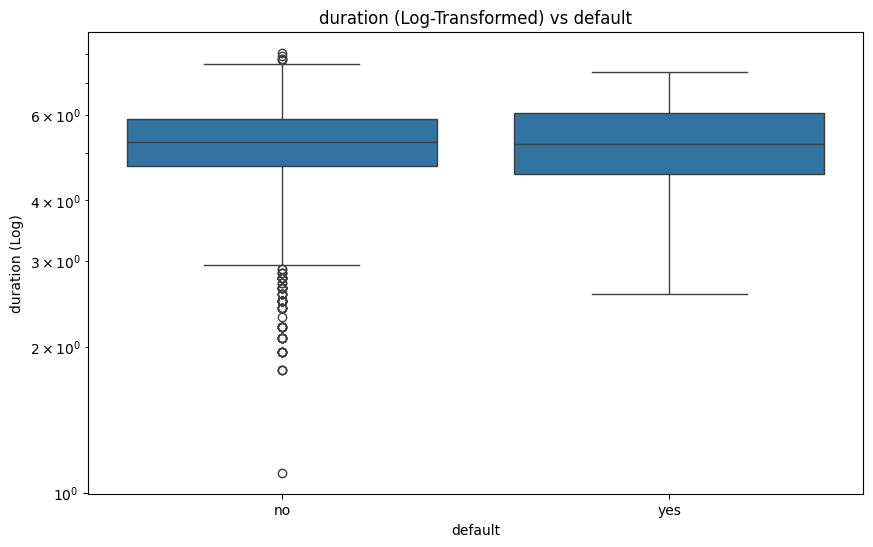

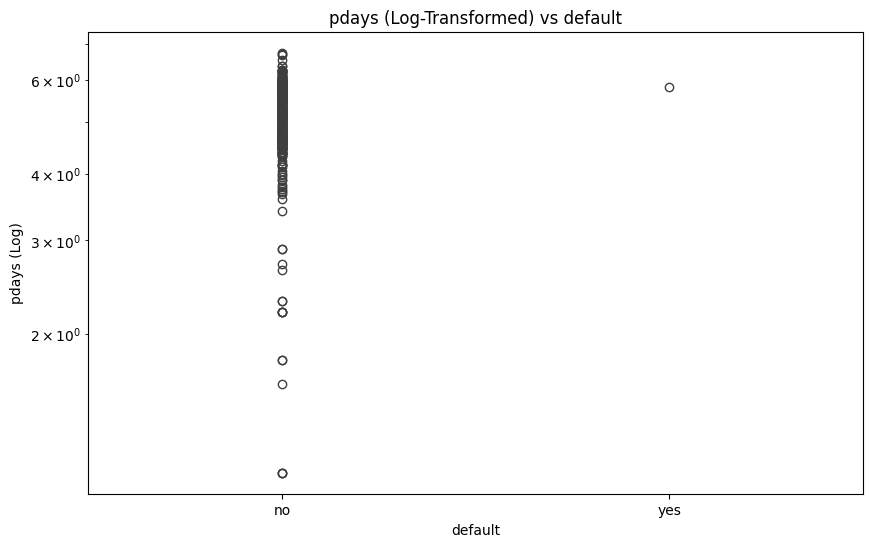

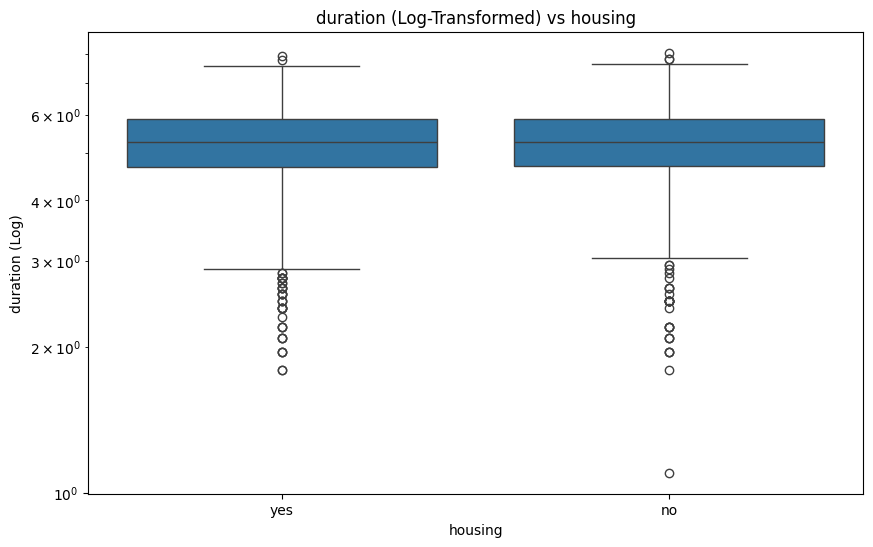

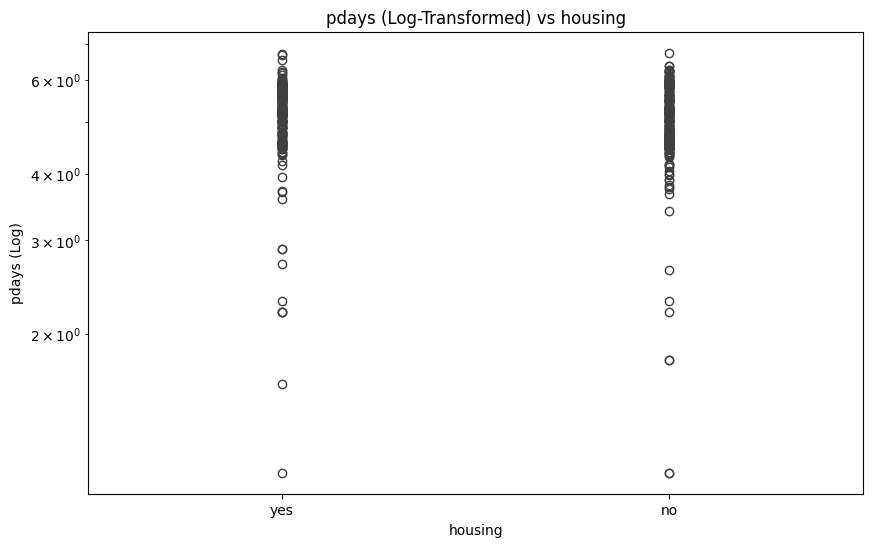

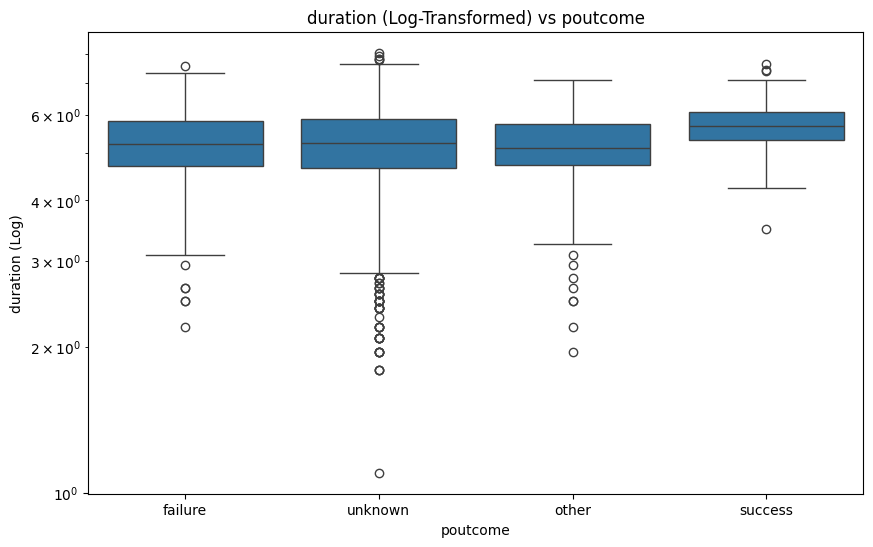

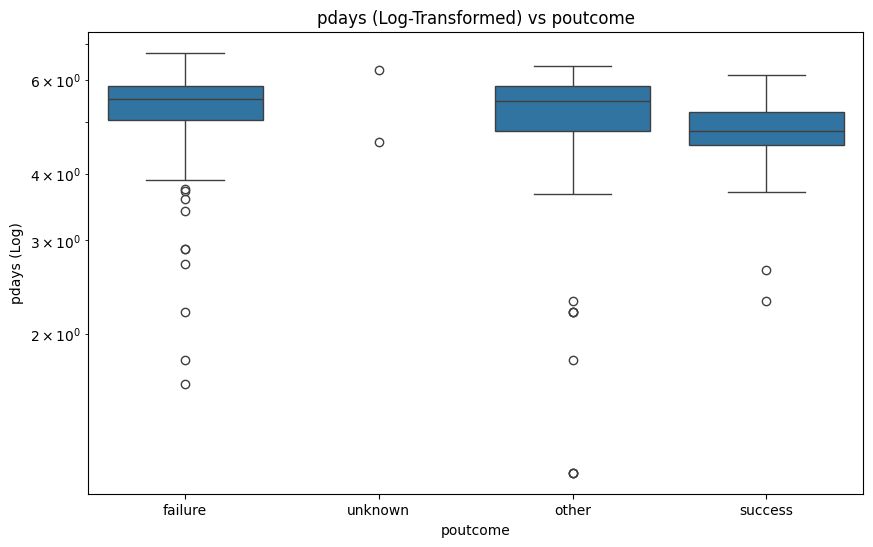

Heatmaps for Normalized Categorical Variable Interactions


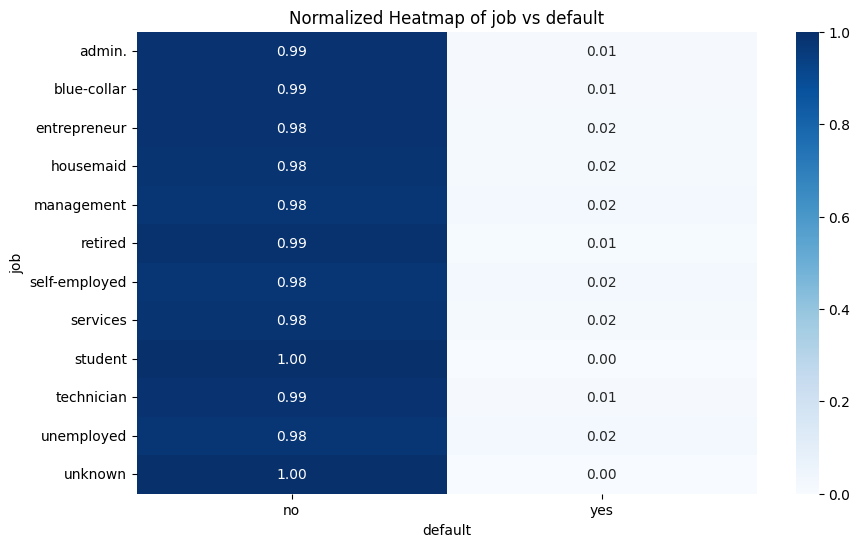

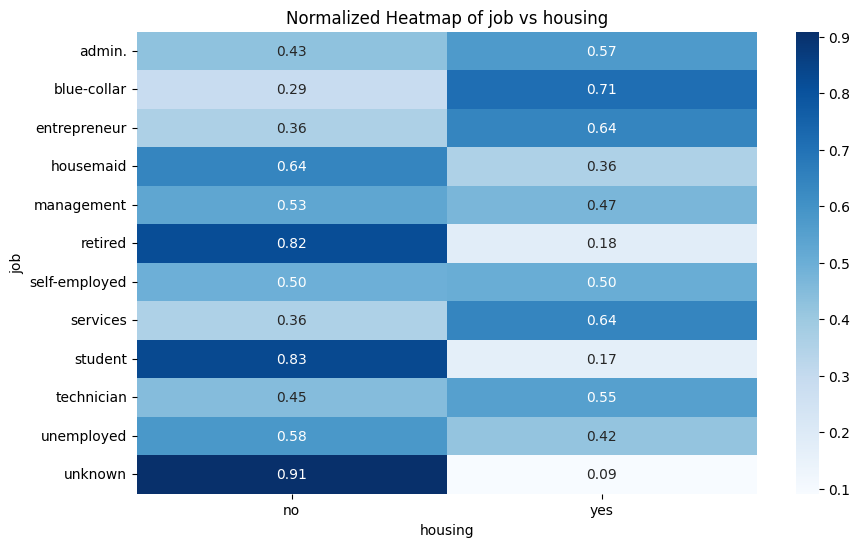

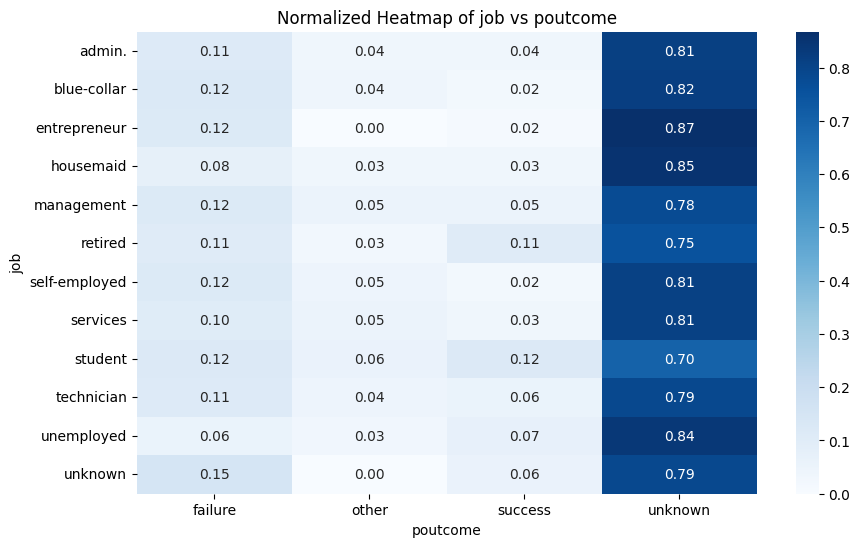

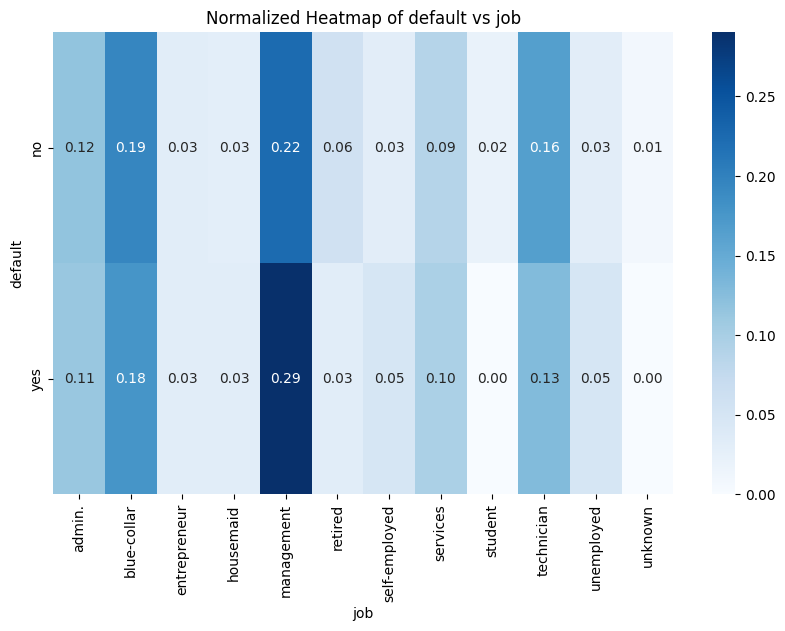

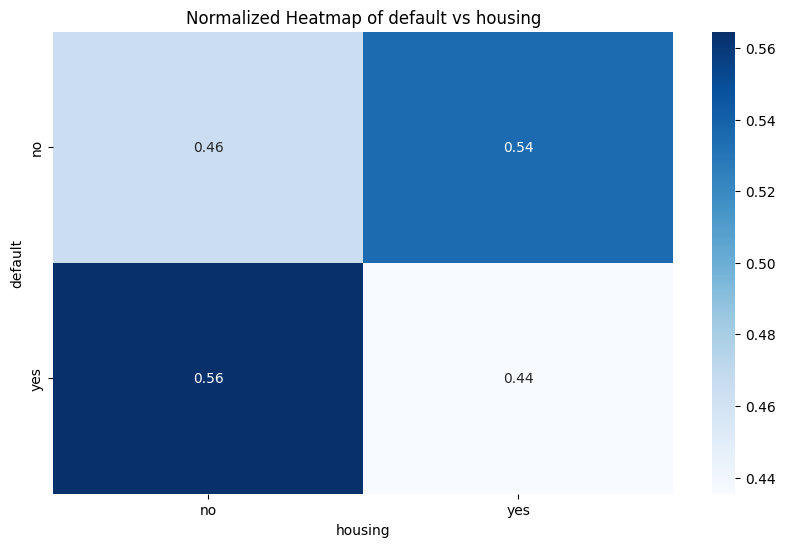

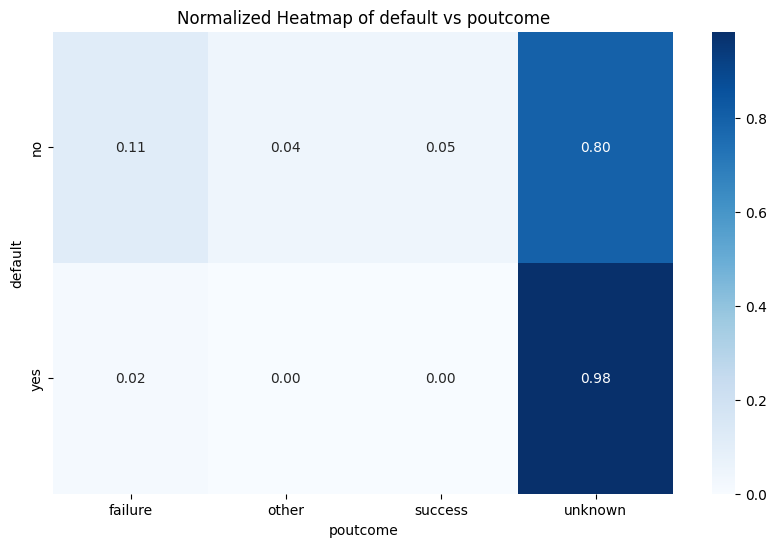

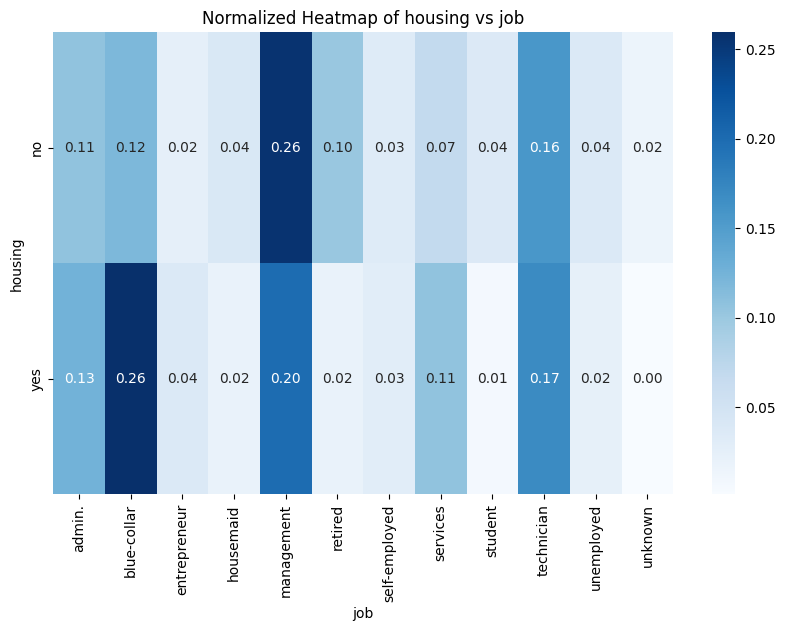

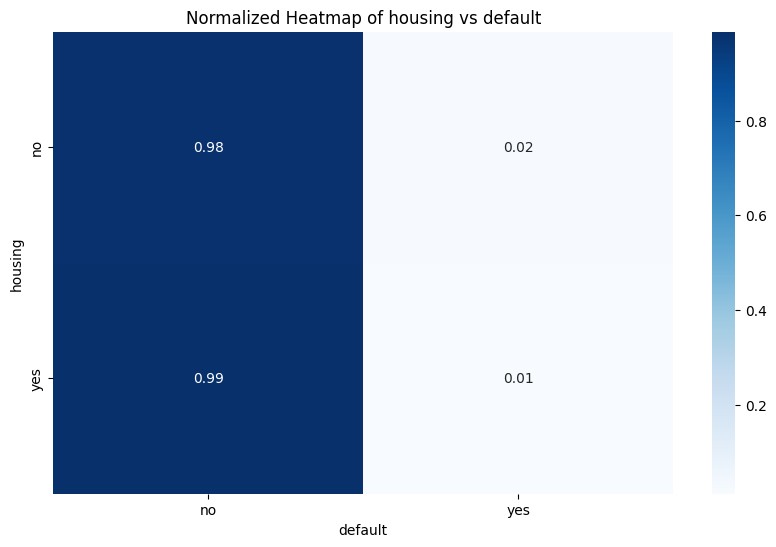

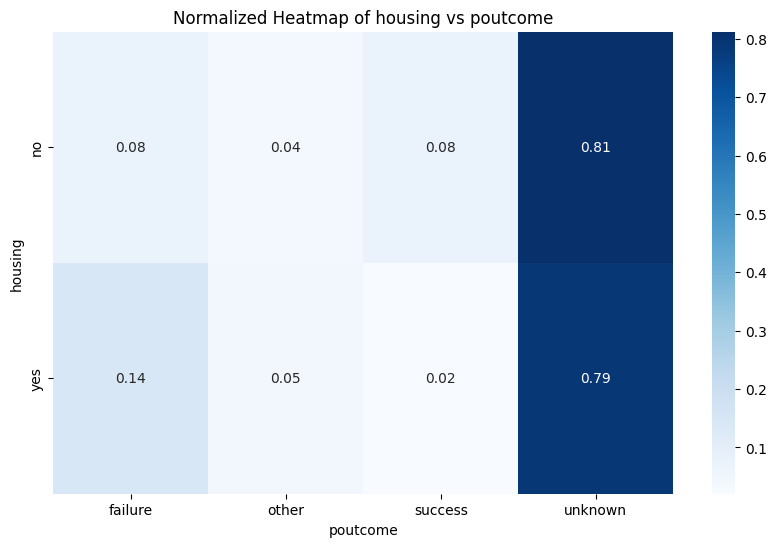

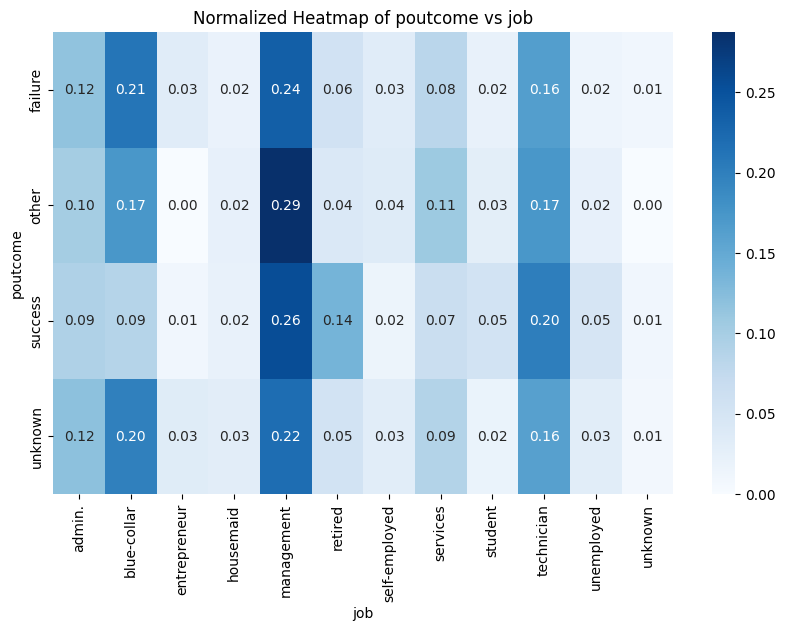

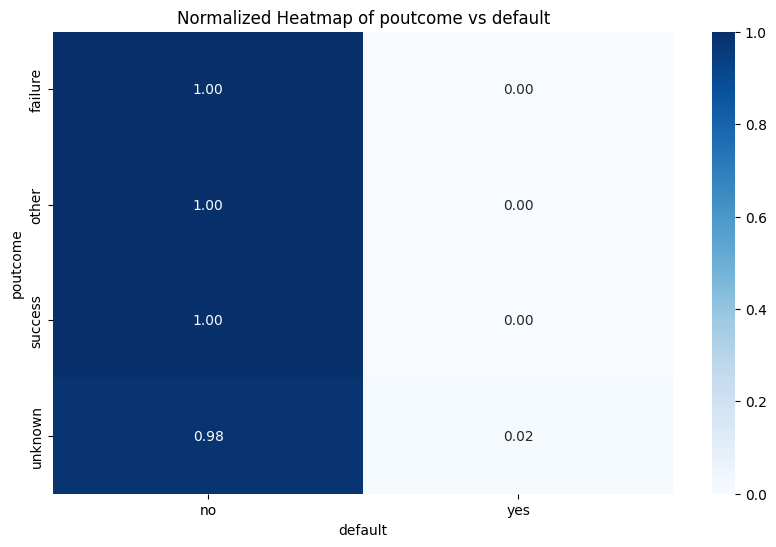

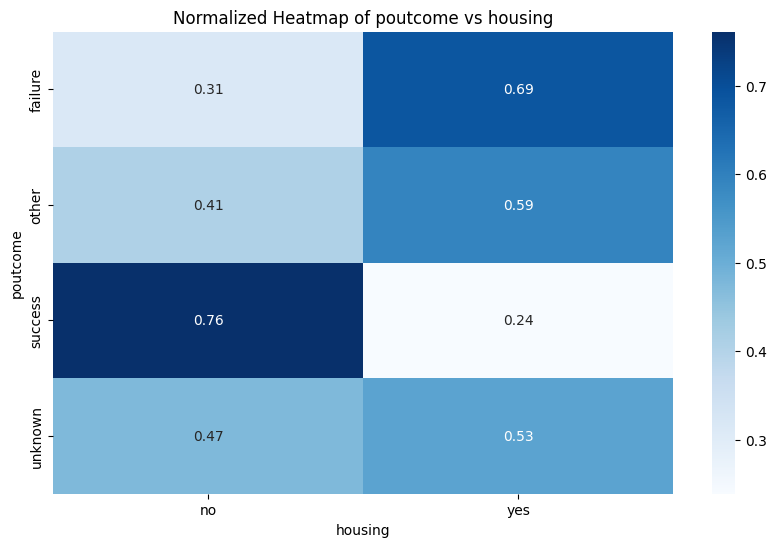

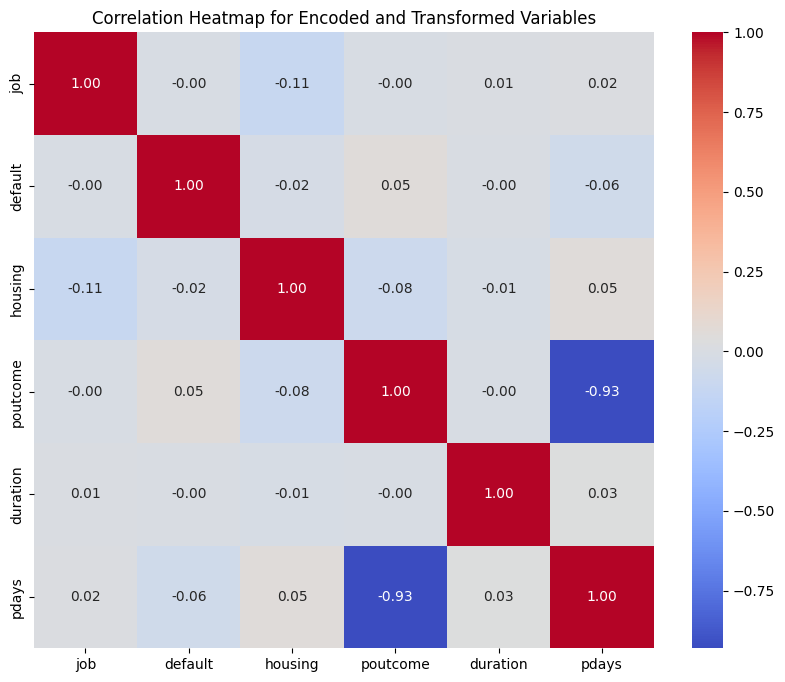

In [ ]:

# Separate numerical and categorical variables
numerical_vars = ['duration', 'pdays']
categorical_vars = ['job', 'default', 'housing', 'poutcome']

# Log Transform Skewed Numerical Variables
data_transformed = data.copy()
for var in numerical_vars:
    # Replace zeros or negative values for log transformation
    data_transformed[var] = np.where(data_transformed[var] > 0,
                                     np.log1p(data_transformed[var]),
                                     0)  # log1p(x) = log(1 + x)

# Pairwise Scatterplots for Log-Transformed Numerical Variables
print("Scatterplot for Log-Transformed Numerical Variables")
sns.pairplot(data_transformed[numerical_vars], kind='scatter', diag_kind='kde')
plt.show()

# Boxplots: Log-Transformed Numerical Variables vs Categorical Variables
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=num_var, data=data_transformed)
        plt.title(f'{num_var} (Log-Transformed) vs {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(f'{num_var} (Log)')
        plt.yscale('log')  # Use log scale for y-axis to better display outliers
        plt.show()

# Heatmaps for Normalized Categorical Variable Interactions
print("Heatmaps for Normalized Categorical Variable Interactions")
for cat_var1 in categorical_vars:
    for cat_var2 in categorical_vars:
        if cat_var1 != cat_var2:
            plt.figure(figsize=(10, 6))
            # Normalize contingency table row-wise
            contingency_table = pd.crosstab(data[cat_var1], data[cat_var2], normalize='index')
            sns.heatmap(contingency_table, annot=True, fmt='.2f', cmap='Blues')
            plt.title(f'Normalized Heatmap of {cat_var1} vs {cat_var2}')
            plt.show()

# Correlation Heatmap of Log-Transformed Numerical Variables and Encoded Categorical Variables
# Encoding categorical variables for correlation matrix
encoded_data = data_transformed.copy()
for col in categorical_vars:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = encoded_data[['job', 'default', 'housing', 'poutcome', 'duration', 'pdays']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Encoded and Transformed Variables')
plt.show()


###CREATING AGE GROUPS and re-evaluating the importance of the age variable

In [ ]:
#Age was surprisingly found to be insignificant, so let's dive into age a little deeper by creating age categories and seeing how age interacts with the other input variables

# Define age group bins and labels
age_bins = [18, 28, 38, 48, 58, 95]  # Customize bins as needed
age_labels = ['18-27', '28-37', '38-47', '48-57', '58+']

# Create a new column 'age_group'
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Display the frequency table for age groups
print(data['age_group'].value_counts())

age_group
28-37    1478
38-47    1137
48-57     771
58+       338
18-27     276
Name: count, dtype: int64


<ipython-input-40-ea279962879c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_outcomes = data.groupby('age_group')['y'].value_counts(normalize=True)



Outcome Results by Age Group:
age_group  y  
18-27      no     0.670290
           yes    0.329710
28-37      no     0.784844
           yes    0.215156
38-47      no     0.834653
           yes    0.165347
48-57      no     0.839170
           yes    0.160830
58+        no     0.627219
           yes    0.372781
Name: proportion, dtype: float64


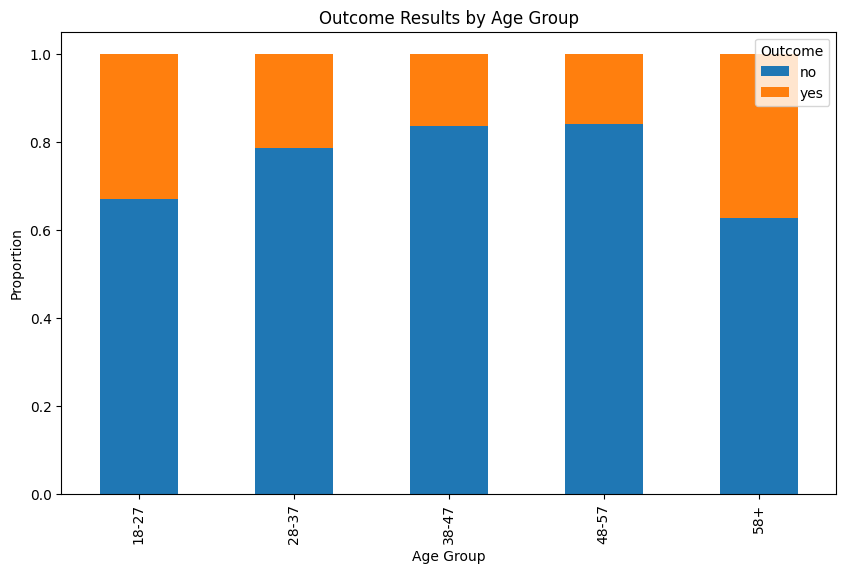

In [ ]:
# Group the data by 'age_group' and calculate the frequency of 'yes' and 'no' outcomes
age_group_outcomes = data.groupby('age_group')['y'].value_counts(normalize=True)

# Display the results
print("\nOutcome Results by Age Group:")
print(age_group_outcomes)

# Optional: Create a bar plot for visualization
age_group_outcomes.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcome Results by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Outcome')
plt.show()

###Mean Age

In [ ]:
# Calculate the overall mean age
mean_age = data['age'].mean()
print(f"Overall Mean Age: {mean_age:.2f}")

# Calculate the average age of young people most likely to say 'yes'
younger_data = data[data['age'] < mean_age]
younger_yes_mean_age = younger_data[younger_data['y'] == 'yes']['age'].mean()

# Calculate the average age of older people most likely to say 'yes'
older_data = data[data['age'] >= mean_age]
older_yes_mean_age = older_data[older_data['y'] == 'yes']['age'].mean()

# Calculate the interquartile range (IQR)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for the inner-quartile range
lower_bound = mean_age - (IQR / 2)
upper_bound = mean_age + (IQR / 2)

# Filter data within the inner-quartile range
iqr_data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Calculate the average age of people most likely to say 'no' within the IQR
no_mean_age_iqr = iqr_data[iqr_data['y'] == 'no']['age'].mean()

# Print the results
print(f"Average age of young people most likely to say 'yes': {younger_yes_mean_age:.2f}")
print(f"Average age of older people most likely to say 'yes': {older_yes_mean_age:.2f}")
print(f"Average age of people most likely to say 'no' within the IQR: {no_mean_age_iqr:.2f}")

Overall Mean Age: 41.34
Average age of young people most likely to say 'yes': 32.37
Average age of older people most likely to say 'yes': 54.70
Average age of people most likely to say 'no' within the IQR: 40.57


### Insights on the young age group

In [ ]:
# Filter data for younger people (18 to 35)
younger_people_data = data[(data['age'] >= 18) & (data['age'] <= 35)]

# Find minimum and maximum ages in the younger group
min_younger_age = younger_people_data['age'].min()
max_younger_age = younger_people_data['age'].max()

# Print min and max ages
print(f"Minimum age in younger group: {min_younger_age}")
print(f"Maximum age in younger group: {max_younger_age}")

# Define age group bins and labels for the younger group (18 to 35)
younger_age_bins = [18, 23, 28, 33, 36]  # Customize bins as needed
younger_age_labels = ['18-22', '23-27', '28-32', '33-35']

# Create a new column 'younger_age_group' in the full dataset
data['younger_age_group'] = pd.cut(data['age'], bins=younger_age_bins, labels=younger_age_labels, right=False)

# Calculate relative frequency of 'yes' to 'no' for each age group in the full dataset
younger_age_group_outcomes = data.groupby('younger_age_group')['y'].value_counts(normalize=True)

# Reshape the data for easier interpretation
younger_relative_freq = younger_age_group_outcomes.unstack().fillna(0)  # Fill NaN with 0 if any
younger_relative_freq['yes_to_no_ratio'] = younger_relative_freq['yes'] / younger_relative_freq['no']

# Get the counts for each age group
age_group_counts = data.groupby('younger_age_group')['age'].count()

# Add the counts to the relative frequency table
younger_relative_freq['count'] = age_group_counts

# Display the results
print("\nRelative Frequency of 'yes' to 'no' for Younger Age Groups (18 to 35):")
print(younger_relative_freq[['yes', 'no', 'yes_to_no_ratio', 'count']])  # Show relevant columns with count

Minimum age in younger group: 18
Maximum age in younger group: 35

Relative Frequency of 'yes' to 'no' for Younger Age Groups (18 to 35):
y                       yes        no  yes_to_no_ratio  count
younger_age_group                                            
18-22              0.566667  0.433333         1.307692     30
23-27              0.300813  0.699187         0.430233    246
28-32              0.221408  0.778592         0.284369    682
33-35              0.191617  0.808383         0.237037    501


<ipython-input-42-f5faaac143c9>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  younger_age_group_outcomes = data.groupby('younger_age_group')['y'].value_counts(normalize=True)
<ipython-input-42-f5faaac143c9>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby('younger_age_group')['age'].count()


### Insights into the older age group

In [ ]:
# Filter data for older people (62 and up)
older_people_data = data[data['age'] >= 62]

# Find minimum and maximum ages in the older group
min_older_age = older_people_data['age'].min()
max_older_age = older_people_data['age'].max()

# Print min and max ages
print(f"Minimum age in older group: {min_older_age}")
print(f"Maximum age in older group: {max_older_age}")

# Define age group bins and labels for the older group (62 and up)
older_age_bins = [62, 67, 72, 77, 82, 87, 92, 99]  # Customize bins as needed
older_age_labels = ['62-66', '67-71', '72-76', '77-81', '82-86', '87-91', '92-98']

# Create a new column 'older_age_group' in the full dataset
data['older_age_group'] = pd.cut(data['age'], bins=older_age_bins, labels=older_age_labels, right=False)

# Calculate relative frequency of 'yes' to 'no' for each older age group in the full dataset
older_age_group_outcomes = data.groupby('older_age_group')['y'].value_counts(normalize=True)

# Reshape the data for easier interpretation
older_relative_freq = older_age_group_outcomes.unstack().fillna(0)  # Fill NaN with 0 if any
older_relative_freq['yes_to_no_ratio'] = older_relative_freq['yes'] / older_relative_freq['no']

# Get the counts for each older age group
older_age_group_counts = data.groupby('older_age_group')['age'].count()

# Add the counts to the relative frequency table
older_relative_freq['count'] = older_age_group_counts

# Display the results
print("\nRelative Frequency of 'yes' to 'no' for Older Age Groups (62 and up):")
print(older_relative_freq[['yes', 'no', 'yes_to_no_ratio', 'count']])  # Show relevant columns with count

Minimum age in older group: 62
Maximum age in older group: 93

Relative Frequency of 'yes' to 'no' for Older Age Groups (62 and up):
y                     yes        no  yes_to_no_ratio  count
older_age_group                                            
62-66            0.666667  0.333333         2.000000     33
67-71            0.515152  0.484848         1.062500     33
72-76            0.650000  0.350000         1.857143     20
77-81            0.500000  0.500000         1.000000     20
82-86            0.363636  0.636364         0.571429     11
87-91            0.000000  1.000000         0.000000      1
92-98            1.000000  0.000000              inf      2


<ipython-input-43-1aa7746c75b6>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  older_age_group_outcomes = data.groupby('older_age_group')['y'].value_counts(normalize=True)
<ipython-input-43-1aa7746c75b6>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  older_age_group_counts = data.groupby('older_age_group')['age'].count()


### Insights into the middle-age group

In [ ]:
# Filter data for middle-aged people (between 35 and 62)
middle_aged_data = data[(data['age'] >= 35) & (data['age'] <= 62)]

# Find minimum and maximum ages in the middle-aged group
min_middle_age = middle_aged_data['age'].min()
max_middle_age = middle_aged_data['age'].max()

# Print min and max ages
print(f"Minimum age in middle-aged group: {min_middle_age}")
print(f"Maximum age in middle-aged group: {max_middle_age}")

# Define age group bins and labels for the middle-aged group
middle_age_bins = [35, 40, 45, 50, 55, 60, 63]  # Customize bins as needed
middle_age_labels = ['35-39', '40-44', '45-49', '50-54', '55-59', '60-62']

# Create a new column 'middle_age_group' in the full dataset
data['middle_age_group'] = pd.cut(data['age'], bins=middle_age_bins, labels=middle_age_labels, right=False)

# Calculate relative frequency of 'yes' to 'no' for each middle age group in the full dataset
middle_age_group_outcomes = data.groupby('middle_age_group')['y'].value_counts(normalize=True)

# Reshape the data for easier interpretation
middle_relative_freq = middle_age_group_outcomes.unstack().fillna(0)  # Fill NaN with 0 if any
middle_relative_freq['yes_to_no_ratio'] = middle_relative_freq['yes'] / middle_relative_freq['no']

# Get the counts for each middle age group
middle_age_group_counts = data.groupby('middle_age_group')['age'].count()

# Add the counts to the relative frequency table
middle_relative_freq['count'] = middle_age_group_counts

# Display the results
print("\nRelative Frequency of 'yes' to 'no' for Middle-Aged Groups:")
print(middle_relative_freq[['yes', 'no', 'yes_to_no_ratio', 'count']])  # Show relevant columns with count

Minimum age in middle-aged group: 35
Maximum age in middle-aged group: 62

Relative Frequency of 'yes' to 'no' for Middle-Aged Groups:
y                      yes        no  yes_to_no_ratio  count
middle_age_group                                            
35-39             0.187831  0.812169         0.231270    756
40-44             0.162617  0.837383         0.194196    535
45-49             0.180698  0.819302         0.220551    487
50-54             0.156410  0.843590         0.185410    390
55-59             0.187328  0.812672         0.230508    363
60-62             0.383721  0.616279         0.622642     86


<ipython-input-44-0c4b325a68bf>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  middle_age_group_outcomes = data.groupby('middle_age_group')['y'].value_counts(normalize=True)
<ipython-input-44-0c4b325a68bf>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  middle_age_group_counts = data.groupby('middle_age_group')['age'].count()


### Age as it relates to other variables


Cross-tabulation: age_group vs job
job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
age_group                                                                      
18-27          33           53             3          3          36        0   
28-37         198          275            41         21         391        1   
38-47         134          265            51         29         260        8   
48-57          82          152            26         44         166       58   
58+            21           31             7         20          49      165   

job        self-employed  services  student  technician  unemployed  unknown  
age_group                                                                     
18-27                  3        33       50          46          14        2  
28-37                 56       140       32         277          42        4  
38-47                 36       103        1         207          36        7  
48-57   

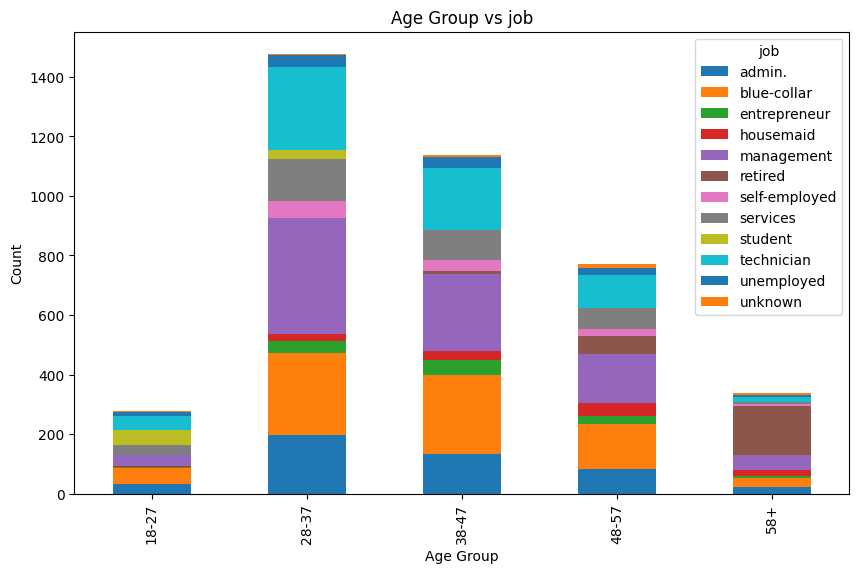


Cross-tabulation: age_group vs marital
marital    divorced  married  single
age_group                           
18-27             4       40     232
28-37            89      726     663
38-47           161      780     196
48-57           134      567      70
58+              68      257      13


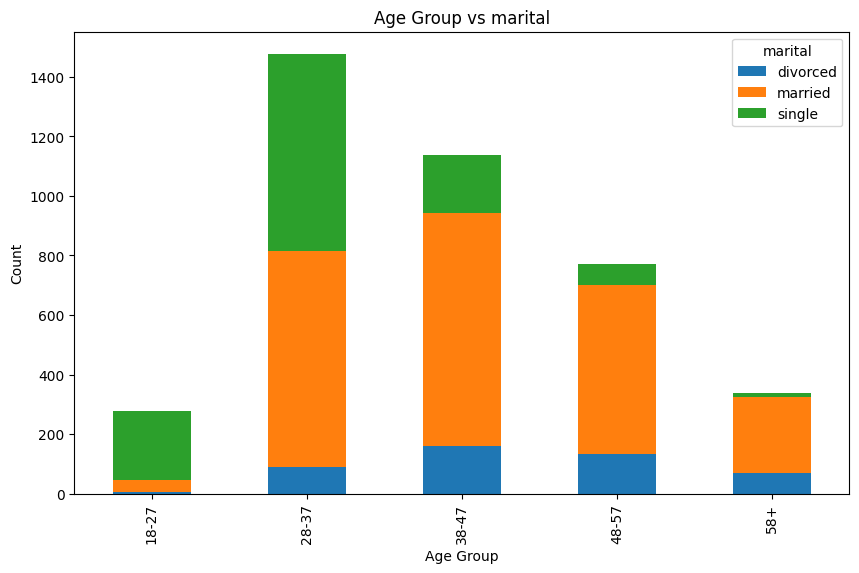


Cross-tabulation: age_group vs education
education  primary  secondary  tertiary  unknown
age_group                                       
18-27           21        171        66       18
28-37          123        747       564       44
38-47          200        558       325       54
48-57          171        364       190       46
58+             96        137        82       23


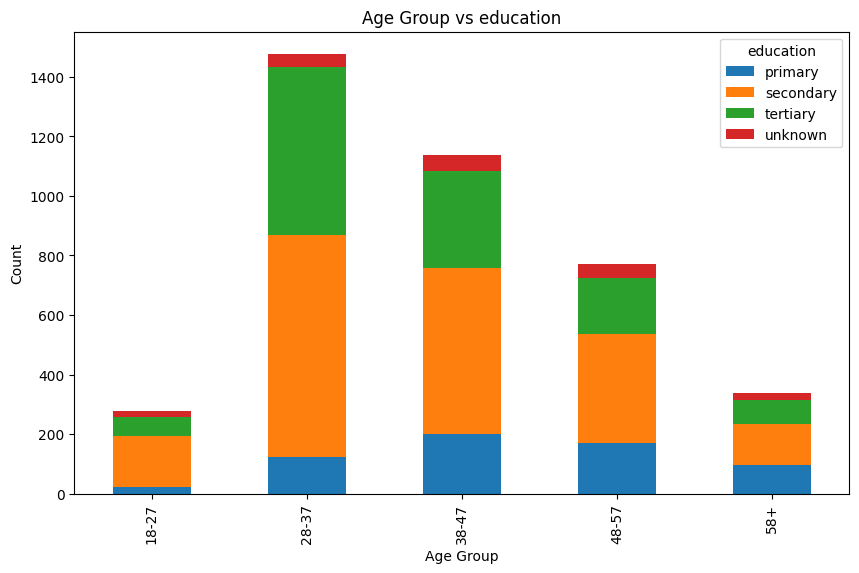


Cross-tabulation: age_group vs default
default      no  yes
age_group           
18-27       268    8
28-37      1453   25
38-47      1119   18
48-57       762    9
58+         336    2


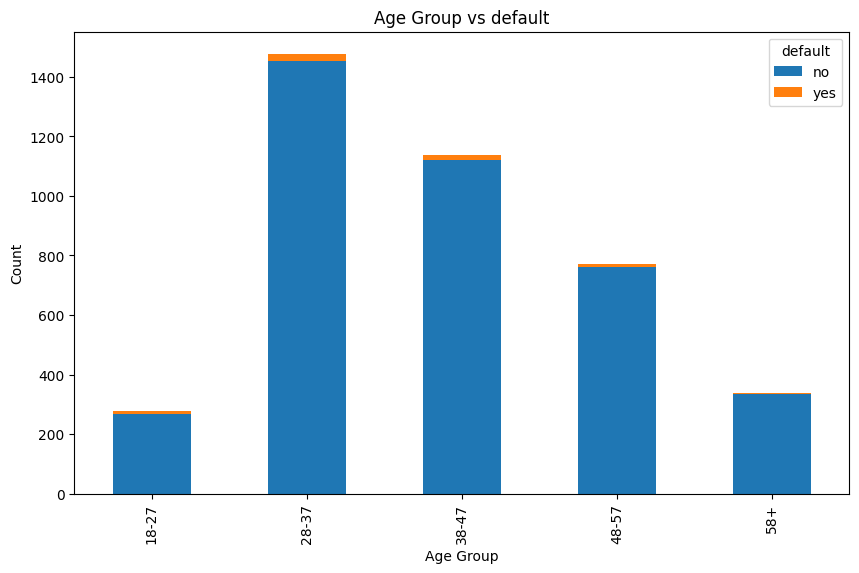


Cross-tabulation: age_group vs housing
housing     no  yes
age_group          
18-27      143  133
28-37      579  899
38-47      461  676
48-57      424  347
58+        258   80


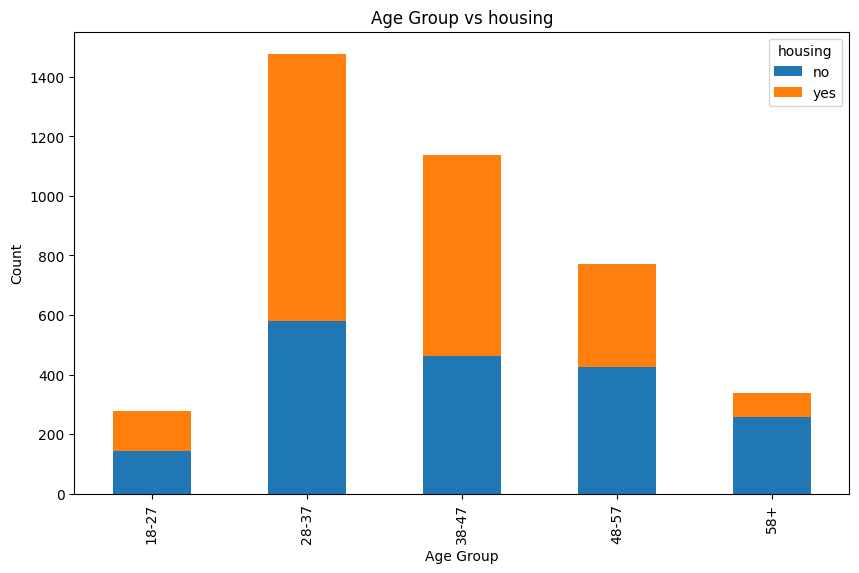


Cross-tabulation: age_group vs loan
loan         no  yes
age_group           
18-27       234   42
28-37      1265  213
38-47       978  159
48-57       625  146
58+         306   32


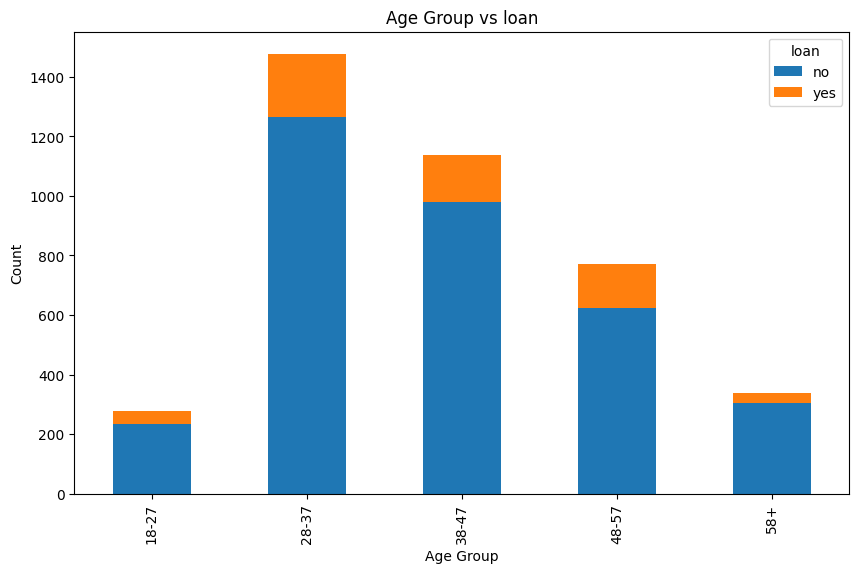


Cross-tabulation: age_group vs contact
contact    cellular  telephone  unknown
age_group                              
18-27           200         16       60
28-37          1078         46      354
38-47           730         65      342
48-57           462         64      245
58+             214         62       62


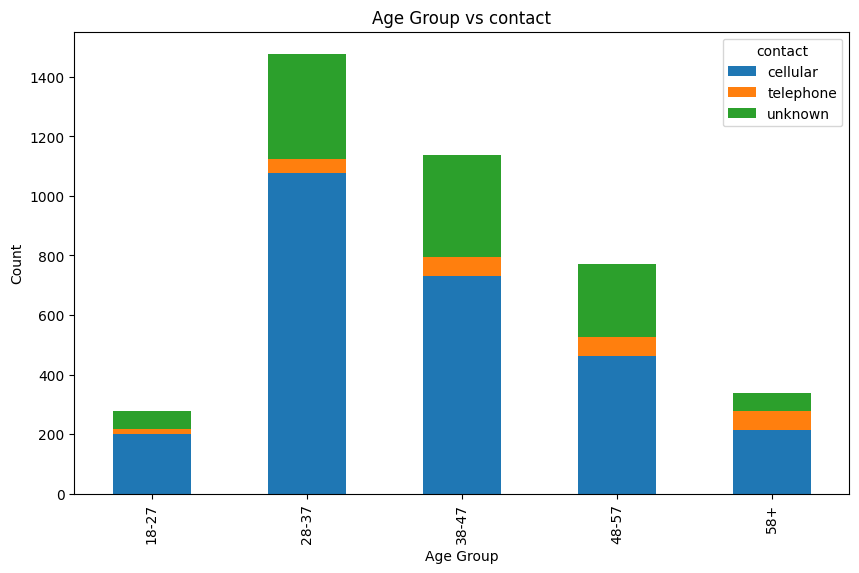


Cross-tabulation: age_group vs poutcome
poutcome   failure  other  success  unknown
age_group                                  
18-27           28     12       18      218
28-37          182     68       68     1160
38-47          141     47       39      910
48-57           66     28       25      652
58+             34     12       34      258


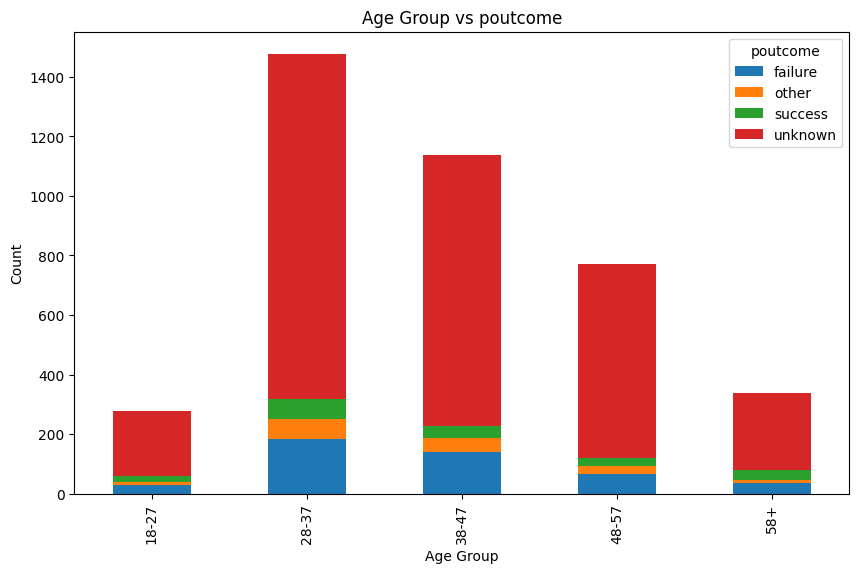

In [ ]:
#exploration of how age relates to the other variables
for var in categorical_vars_dict:
        # Create a cross-tabulation
        cross_tab = pd.crosstab(data['age_group'], data[var])
        print(f"\nCross-tabulation: age_group vs {var}")
        print(cross_tab)

        # Create a grouped bar plot (optional)
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Age Group vs {var}')
        plt.ylabel('Count')
        plt.xlabel('Age Group')
        plt.legend(title=var)
        plt.show()

### Pdays variable split:
pdays_neg1 & pdays_non_neg1




Here we split Pdays variables into a negative and non-negative group for further analysis

In [ ]:
#Splitting pdays variable into a negative and non-negative category. This way we can look at tendencies of those
# who have never been contected (-) vs tendencies of those that have been contacted (+)

# Create data frames for pdays = -1 and pdays != -1
pdays_neg1 = data[data['pdays'] == -1]
pdays_non_neg1 = data[data['pdays'] != -1]

# Display frequency tables for 'y' (output variable) in each data frame
print("\npdays = -1:")
print(pdays_neg1['y'].value_counts())
print(pdays_neg1['y'].value_counts(normalize=True))  # Add frequency

print("\npdays != -1:")
print(pdays_non_neg1['y'].value_counts())
print(pdays_non_neg1['y'].value_counts(normalize=True))  # Add frequency


pdays = -1:
y
no     2647
yes     549
Name: count, dtype: int64
y
no     0.828223
yes    0.171777
Name: proportion, dtype: float64

pdays != -1:
y
no     506
yes    298
Name: count, dtype: int64
y
no     0.629353
yes    0.370647
Name: proportion, dtype: float64


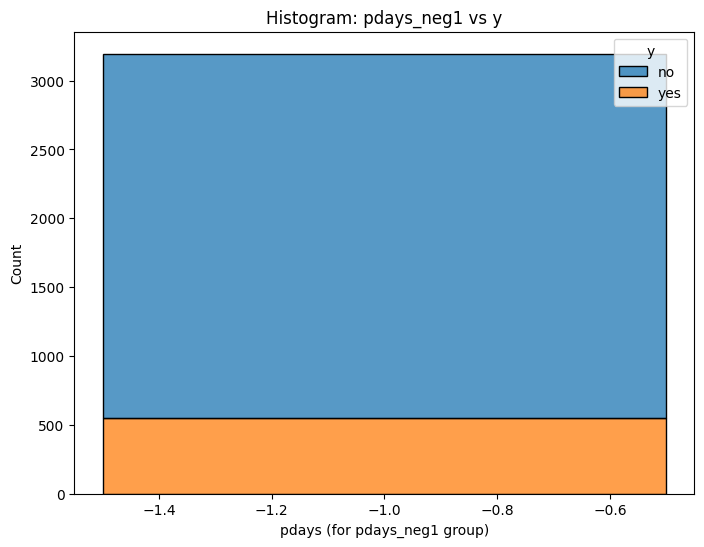

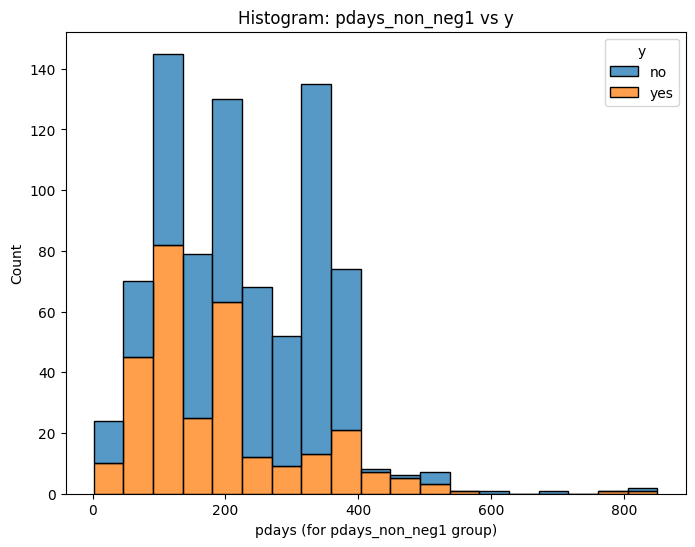

In [ ]:
# Histogram for pdays_neg1
plt.figure(figsize=(8, 6))
sns.histplot(data=pdays_neg1, x='pdays', hue='y', multiple='stack')
plt.title('Histogram: pdays_neg1 vs y')
plt.xlabel('pdays (for pdays_neg1 group)')
plt.ylabel('Count')
plt.show()

# Histogram for pdays_non_neg1
plt.figure(figsize=(8, 6))
sns.histplot(data=pdays_non_neg1, x='pdays', hue='y', multiple='stack')
plt.title('Histogram: pdays_non_neg1 vs y')
plt.xlabel('pdays (for pdays_non_neg1 group)')
plt.ylabel('Count')
plt.show()

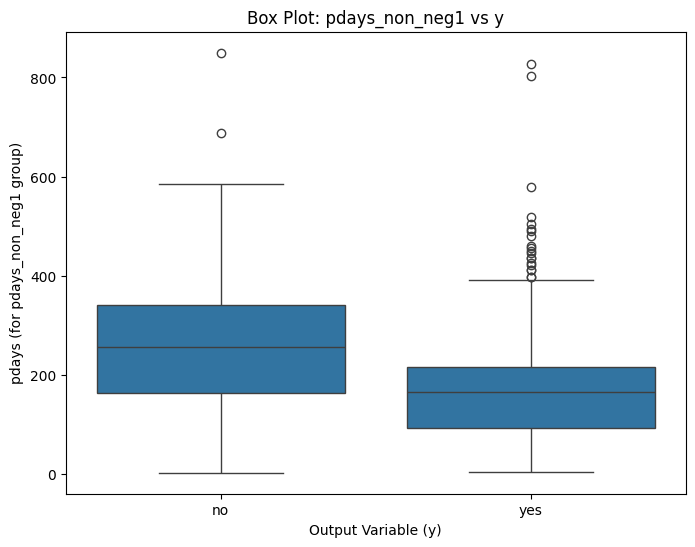

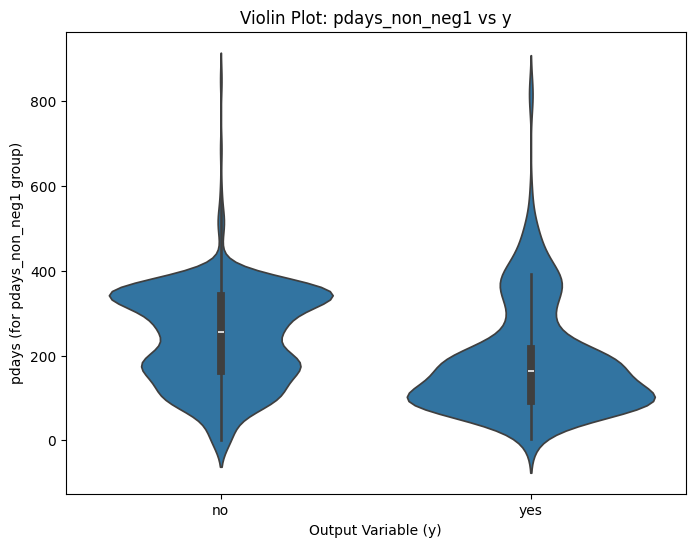

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='pdays', data=pdays_non_neg1)
plt.title('Box Plot: pdays_non_neg1 vs y')
plt.xlabel('Output Variable (y)')
plt.ylabel('pdays (for pdays_non_neg1 group)')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(x='y', y='pdays', data=pdays_non_neg1)
plt.title('Violin Plot: pdays_non_neg1 vs y')
plt.xlabel('Output Variable (y)')
plt.ylabel('pdays (for pdays_non_neg1 group)')
plt.show()



### Splitting Previous Variable
previous_0 and previous_non_0

Here we spllit the "previous" variable into 0 and non0 groups for further analysis, jsut as we did with Pdays

In [ ]:
# Create data frames for previous = 0 and previous != 0
previous_0 = data[data['previous'] == 0]
previous_non_0 = data[data['previous'] != 0]

# Display frequency tables for 'y' (output variable) in each data frame
print("\nprevious = 0:")
print(previous_0['y'].value_counts())
print(previous_0['y'].value_counts(normalize=True))  # Add frequency

print("\nprevious != 0:")
print(previous_non_0['y'].value_counts())
print(previous_non_0['y'].value_counts(normalize=True))  # Add frequency


previous = 0:
y
no     2647
yes     549
Name: count, dtype: int64
y
no     0.828223
yes    0.171777
Name: proportion, dtype: float64

previous != 0:
y
no     506
yes    298
Name: count, dtype: int64
y
no     0.629353
yes    0.370647
Name: proportion, dtype: float64


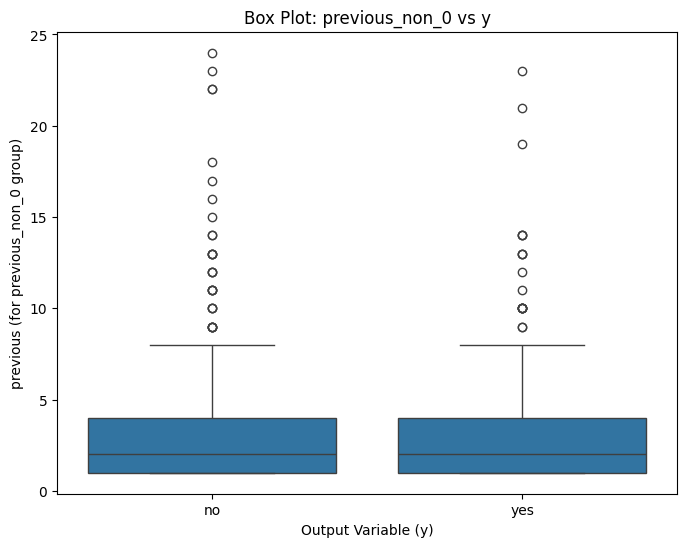

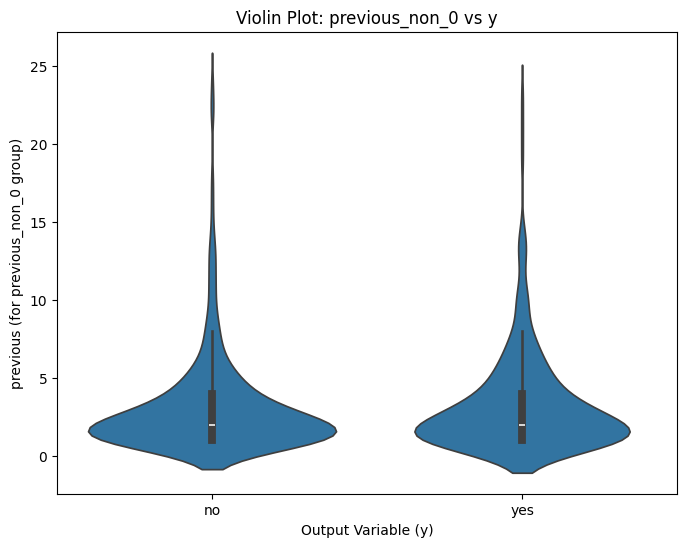

In [ ]:

# Box plot for previous_non_0
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='previous', data=previous_non_0)  # Changed 'pdays' to 'previous' and data to previous_non_0
plt.title('Box Plot: previous_non_0 vs y')
plt.xlabel('Output Variable (y)')
plt.ylabel('previous (for previous_non_0 group)')
plt.show()


# Violin plot for previous_non_0
plt.figure(figsize=(8, 6))
sns.violinplot(x='y', y='previous', data=previous_non_0)  # Changed 'pdays' to 'previous' and data to previous_non_0
plt.title('Violin Plot: previous_non_0 vs y')
plt.xlabel('Output Variable (y)')
plt.ylabel('previous (for previous_non_0 group)')
plt.show()

# Step 3
*Exploratory Modeling*



## Decision Tree

Decision Tree with no duration

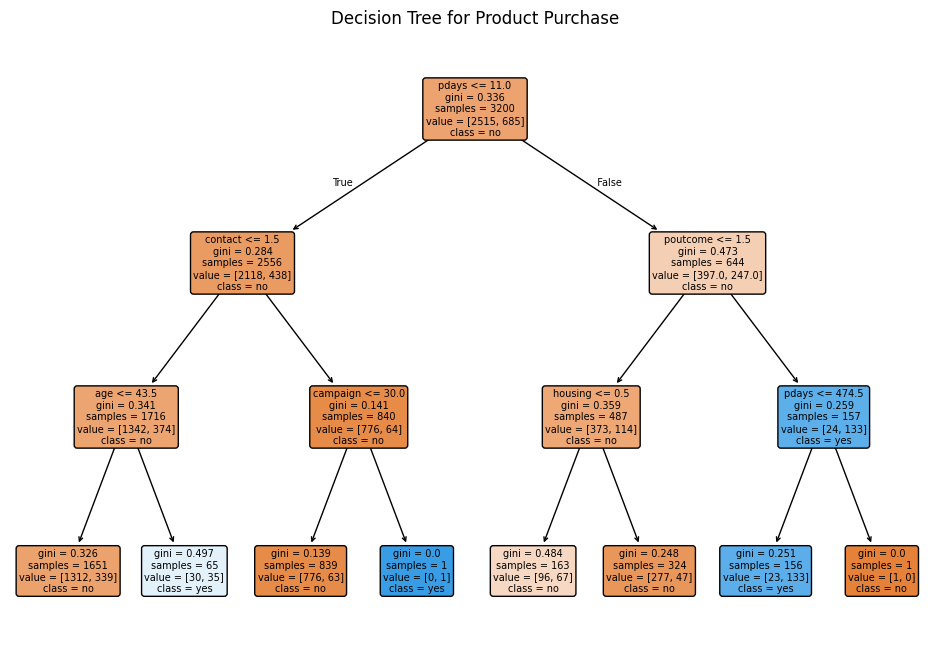

In [ ]:
# Separate features (X) and target (y)
X = data.drop('y', axis=1)
X = X.drop(columns=['duration']) #dropped duration, this var should not be used for modelling
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'age']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree for Product Purchase')
plt.show()

Decision Tree without Duration (Simplified and Labelled)

Original label: <node &#35;0<br/>pdays &le; 11.0<br/>gini = 0.336<br/>samples = 3200<br/>value = [2515, 685]<br/>class = no>
Updated label: <node #0\ngini = 0.336
Original label: <node &#35;1<br/>contact &le; 1.5<br/>gini = 0.284<br/>samples = 2556<br/>value = [2118, 438]<br/>class = no>
Updated label: <node #1\ngini = 0.284
Original label: <node &#35;2<br/>age &le; 43.5<br/>gini = 0.341<br/>samples = 1716<br/>value = [1342, 374]<br/>class = no>
Updated label: <node #2\ngini = 0.341
Original label: <node &#35;3<br/>gini = 0.326<br/>samples = 1651<br/>value = [1312, 339]<br/>class = no>
Updated label: <node #3\ngini = 0.326
Original label: <node &#35;4<br/>gini = 0.497<br/>samples = 65<br/>value = [30, 35]<br/>class = yes>
Updated label: <node #4\ngini = 0.497
Original label: <node &#35;5<br/>campaign &le; 30.0<br/>gini = 0.141<br/>samples = 840<br/>value = [776, 64]<br/>class = no>
Updated label: <node #5\ngini = 0.141
Original label: <node &#35;6<br/>gini = 0.139<br/>samples = 839<br/

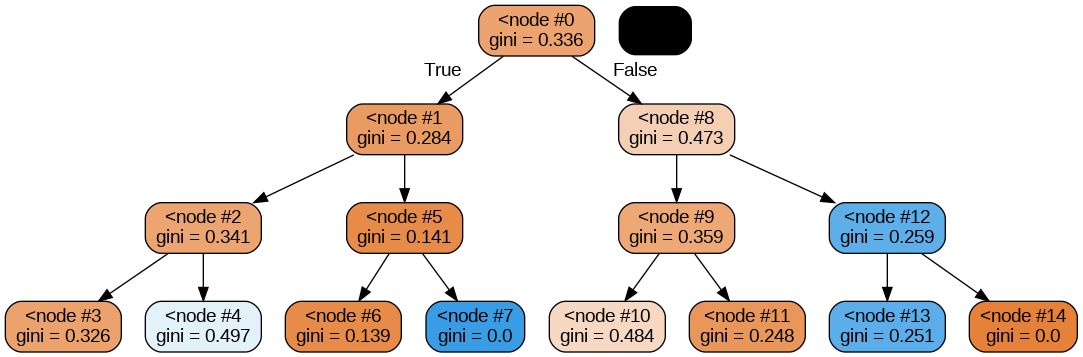

In [ ]:
def customize_tree_plot(decision_tree, feature_names, class_names):
    from sklearn.tree import export_graphviz
    from io import StringIO
    import pydotplus
    from IPython.display import Image

    # Export the decision tree to DOT format
    dot_data = StringIO()
    export_graphviz(
        decision_tree,
        out_file=dot_data,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        node_ids=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # Customize node labels
    for node in graph.get_nodes():
        label = node.get("label")
        if label:  # Only modify nodes with actual labels
            # Debugging step
            print(f"Original label: {label}")

            # Handle HTML-like labels
            if "&#35;" in label:  # Check for HTML-encoded node labels
                label = label.replace("&#35;", "#").replace("<br/>", "\\n")

            # Parse and modify labels for simplicity
            if "gini" in label and "samples" in label:
                lines = label.split("\\n")
                feature_split = lines[0]  # First line contains the feature and threshold
                gini = [line for line in lines if "gini" in line][0]  # Gini index

                # Check for the feature name and threshold pattern in the label
                for feature_name in feature_names:
                    if feature_name in feature_split:
                        threshold = feature_split.split(">")[-1].strip()
                        new_label = f"{feature_name}\\n> {threshold}\\n{gini.strip()}"
                        break
                else:
                    new_label = f"{feature_split.strip()}\\n{gini.strip()}"

                # Replace the node's label with the new simplified one
                print(f"Updated label: {new_label}")  # Debugging step
                node.set("label", new_label)

    # Save the image
    output_file = "/content/customized_decision_tree.png"
    graph.write_png(output_file)

    # Display the saved image
    return Image(output_file)

# Call the function to display the customized decision tree
customized_image = customize_tree_plot(tree_model, feature_names=X.columns, class_names=['no', 'yes'])
customized_image




In [ ]:
dot_data = StringIO()
export_graphviz(
    tree_model,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,
    special_characters=True,
    node_ids=True,
)
print(dot_data.getvalue())  # Check for invalid syntax


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<node &#35;0<br/>pdays &le; 11.0<br/>gini = 0.336<br/>samples = 3200<br/>value = [2515, 685]<br/>class = no>, fillcolor="#eca36f"] ;
1 [label=<node &#35;1<br/>contact &le; 1.5<br/>gini = 0.284<br/>samples = 2556<br/>value = [2118, 438]<br/>class = no>, fillcolor="#ea9b62"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<node &#35;2<br/>age &le; 43.5<br/>gini = 0.341<br/>samples = 1716<br/>value = [1342, 374]<br/>class = no>, fillcolor="#eca470"] ;
1 -> 2 ;
3 [label=<node &#35;3<br/>gini = 0.326<br/>samples = 1651<br/>value = [1312, 339]<br/>class = no>, fillcolor="#eca26c"] ;
2 -> 3 ;
4 [label=<node &#35;4<br/>gini = 0.497<br/>samples = 65<br/>value = [30, 35]<br/>class = yes>, fillcolor="#e3f1fb"] ;
2 -> 4 ;
5 [label=<node &#35;5<br/>campaign &le; 30.0<br/>gini = 0.141<br/>samples = 840<br/>value = [776, 64]<br/>class = no>, f

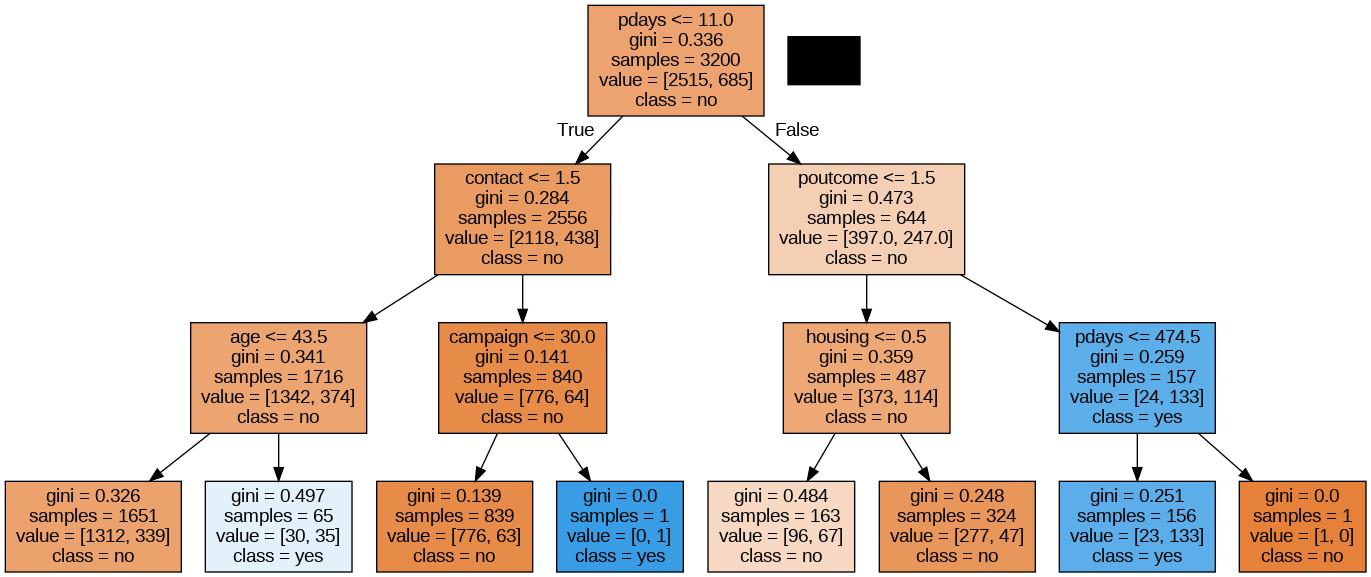

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("simple_tree.png")
from IPython.display import Image
Image("simple_tree.png")


## Demographic Decision Tree

Here we created a decisions tree using only demographic data. We did this for the following reasons:
- demographic data is the easiest data to collect
- demographic data is likely the only data available for new customers
- demographic data looks relatively unimportant in our previous decision trees, but DID look important in our initial variable exploration so it seems worth looking into further

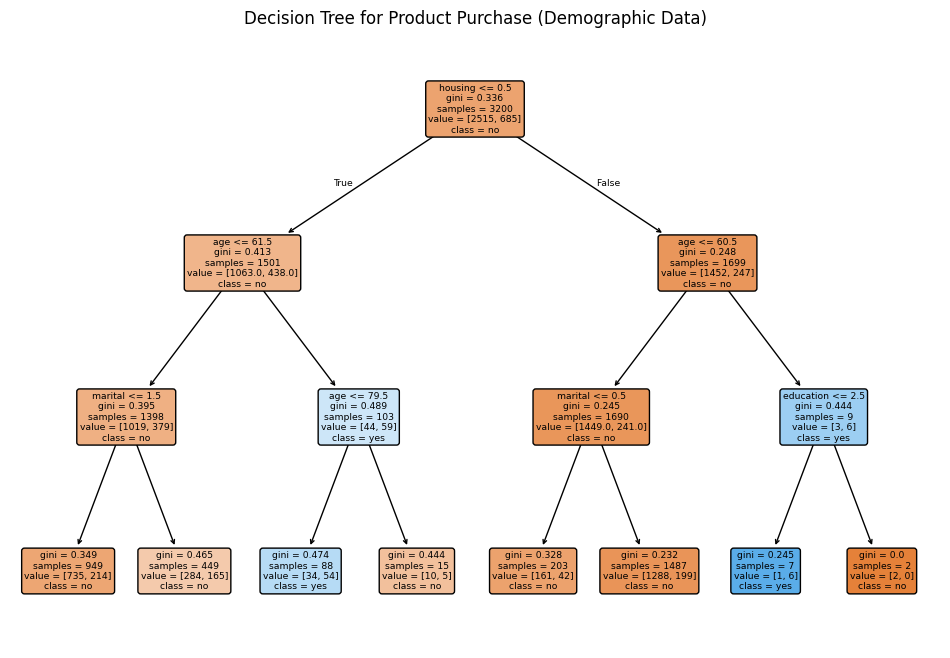

In [ ]:
# Select only demographic features for X
demographic_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = data[demographic_features].copy()  # Create an explicit copy
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree for Product Purchase (Demographic Data)')
plt.show()

Decision Tree Demographic Data (Without Age)
- Age has been removed because it is seen in the above example that our decision tree shows us that an important split occurs if the age is greater than 60, but we have observed that the younger age group (between 18 and 22) is very likely to buy

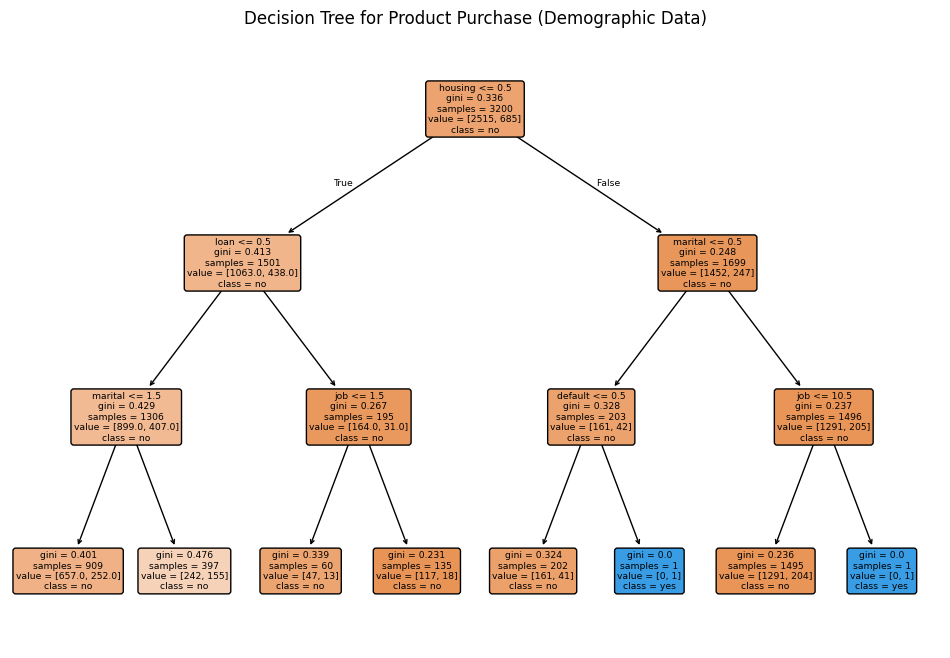

In [ ]:
# Select only demographic features for X
demographic_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
X = data[demographic_features].copy()  # Create an explicit copy
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree for Product Purchase (Demographic Data)')
plt.show()

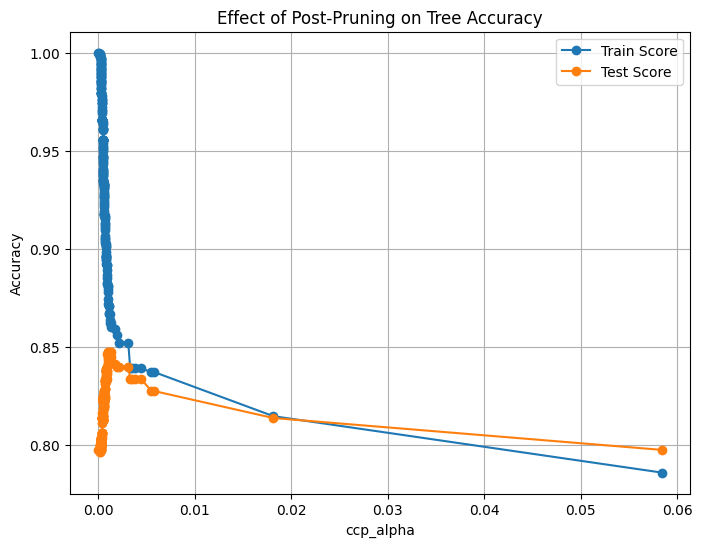

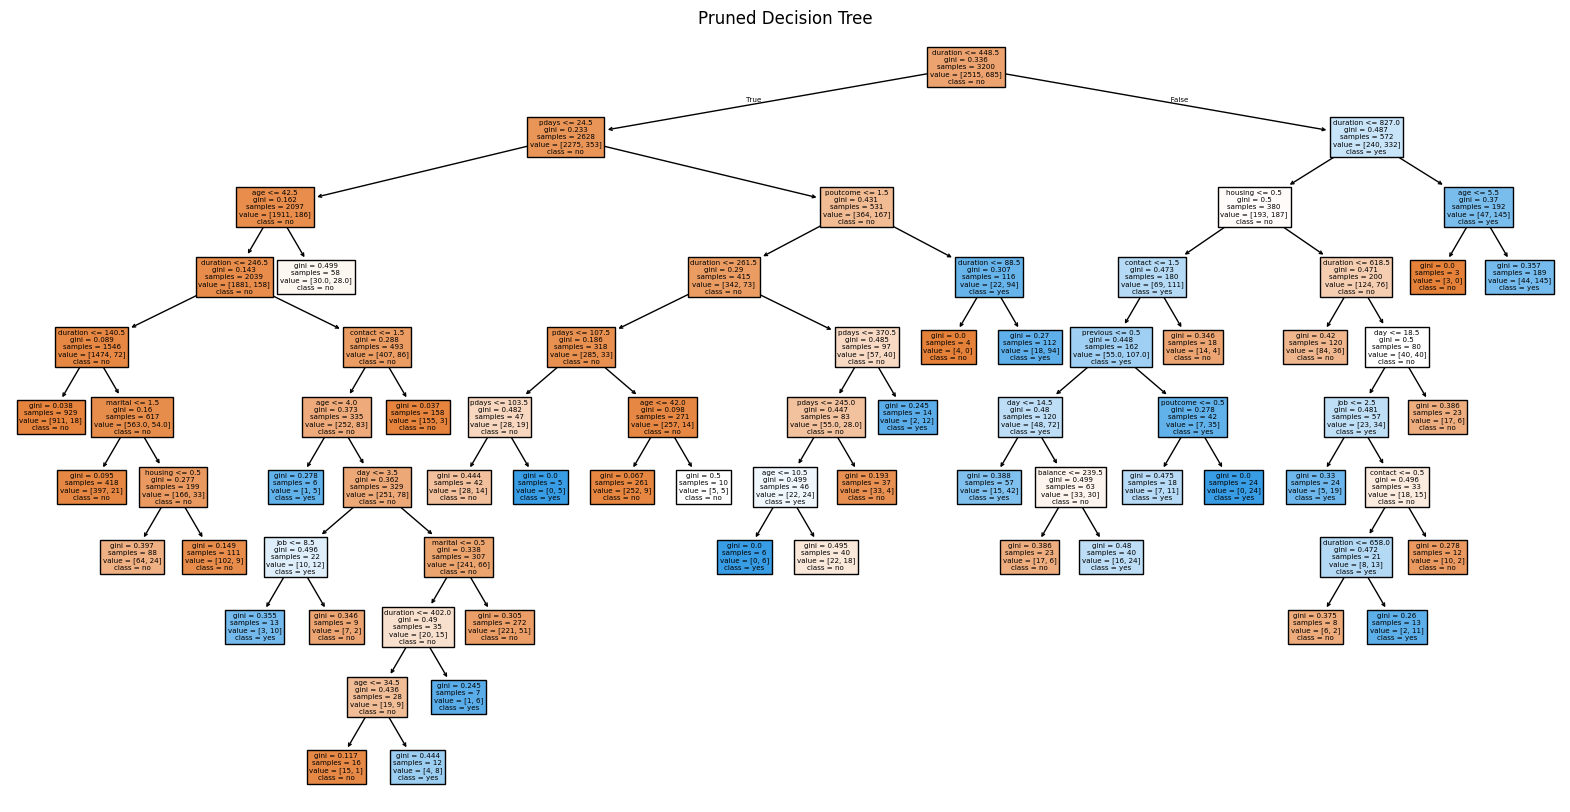

Final Pruned Tree - Training Accuracy: 0.88
Final Pruned Tree - Testing Accuracy: 0.85


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Fit a fully grown tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Step 2: Obtain cost-complexity pruning path
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 3: Train and evaluate trees for different alpha values
trees = []
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    trees.append(pruned_tree)
    train_scores.append(pruned_tree.score(X_train, y_train))
    test_scores.append(pruned_tree.score(X_test, y_test))

# Step 4: Plot training and testing scores vs ccp_alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, label="Train Score", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Score", marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Post-Pruning on Tree Accuracy")
plt.legend()
plt.grid()
plt.show()

# Step 5: Choose the best alpha and prune the tree
best_alpha = ccp_alphas[np.argmax(test_scores)]
final_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_pruned_tree.fit(X_train, y_train)

# Step 6: Visualize the final pruned tree
plt.figure(figsize=(20, 10))
plot_tree(final_pruned_tree, filled=True, feature_names=X.columns, class_names=["no", "yes"])
plt.title("Pruned Decision Tree")
plt.show()

# Step 7: Evaluate final pruned tree
train_acc = final_pruned_tree.score(X_train, y_train)
test_acc = final_pruned_tree.score(X_test, y_test)
print(f"Final Pruned Tree - Training Accuracy: {train_acc:.2f}")
print(f"Final Pruned Tree - Testing Accuracy: {test_acc:.2f}")


# Model Exploration

The Project outline only required that we test 3 of the potential models, but the models were simple enough to set up once all of our data was prepared. I went ahead and did a very simple run of every potential model to get a better understanding of which model would be best fit for the data

## Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
)
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays','duration', 'day', 'poutcome']]
y = data['y']  # Assuming 'y' is your target variable column


In [ ]:
# Step 2: Check Multicollinearity using VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    # -----> Convert X.values to numeric type <-----
    vif_data['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    return vif_data

# Assuming 'X' is your feature DataFrame
vif_results = calculate_vif(X)

# Print the VIF results
print(vif_results)


      Feature        VIF
0         age  11.495302
1         job   2.867427
2     marital   4.662962
3   education   3.747138
4     default   1.032297
5     balance   1.314772
6     housing   2.262325
7        loan   1.193512
8     contact   1.694907
9         day        inf
10   campaign   1.885147
11      pdays   2.871891
12   duration   1.974396
13        day        inf
14   poutcome  16.309116


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#REMOVE HIGHLY COLLINEAR VARIABLES
##X = X.drop(columns=['day', 'pdays'])  # Drop features with high VIF values

# Step 3: Handle Outliers using Z-Score
# numeric_features = ['age', 'balance', 'duration', 'campaign', 'previous']
# X_outliers_removed = X[(np.abs(zscore(X[numeric_features])) < 3).all(axis=1)]
# y = y[X_outliers_removed.index]
# X = X_outliers_removed

# Step 4: Feature Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [ ]:
# Step : Train Logistic Regression with Regularization
model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear')  # L2 Regularization
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Step 7: Model Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Step 8: Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

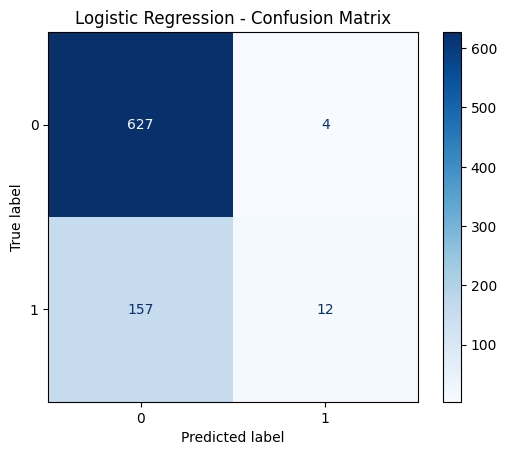

In [ ]:
# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [ ]:
# Print Metrics
print("Logistic Regression - Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression - Metrics:
Accuracy: 0.7987
Precision: 0.7500
Recall: 0.0710
F1-Score: 0.1297
ROC-AUC: 0.7139

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       631
           1       0.75      0.07      0.13       169

    accuracy                           0.80       800
   macro avg       0.77      0.53      0.51       800
weighted avg       0.79      0.80      0.73       800



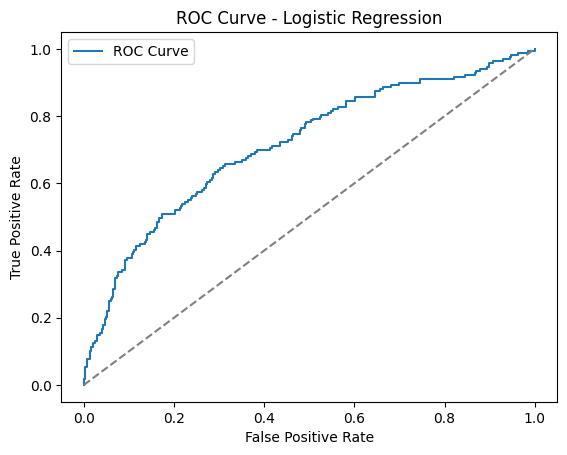

In [ ]:
# Step 10: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Alternative visualization of logistic regression outcome

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# ----> Convert target variable 'y' to numerical (0 and 1) <----
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets (optional, for later evaluation)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features (required for statsmodels)
X = sm.add_constant(X)

# ----> Ensure all columns in X are numeric <----
X = X.astype(float) #This will convert all columns to a numeric type

# Create and fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.472019
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3986
Method:                           MLE   Df Model:                           13
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                 0.08571
Time:                        04:17:34   Log-Likelihood:                -1888.1
converged:                       True   LL-Null:                       -2065.1
Covariance Type:            nonrobust   LLR p-value:                 1.128e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1868      0.335     -3.544      0.000      -1.843      -0.530
age            0.0045      0.

LOGISTIC REGRESSION 2ND ITERATION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
)
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Step 1: Preprocess Features and Target
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'day', 'campaign', 'pdays', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
le = LabelEncoder()
for feature in categorical_features:
    X.loc[:, feature] = le.fit_transform(X[feature])

# Encode target variable
y = le.fit_transform(y)

# Step 2: Check Multicollinearity using VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    # -----> Convert X.values to numeric type <-----
    vif_data['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    return vif_data

X = X.drop(columns=['pdays'])  # Drop features with high VIF values

print("VIF before removing multicollinear features:")
X_vif = sm.add_constant(X)  # Add constant for statsmodels
# -----> Ensure X_vif is of numeric type <-----
X_vif = X_vif.astype(float)
print(calculate_vif(X_vif))

# Remove highly collinear features
#X = X.drop(columns=[''])  # Drop features with high VIF values

# Step 3: Handle Outliers using Z-Score
numeric_features = ['age', 'balance', 'campaign']
X_outliers_removed = X[(np.abs(zscore(X[numeric_features])) < 3).all(axis=1)]
y = y[X_outliers_removed.index]
X = X_outliers_removed

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression with Regularization
model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear')  # L2 Regularization
model.fit(X_train, y_train)

# Step 7: Model Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Step 8: Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Print Metrics
print("Logistic Regression - Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Step 11: Cross-Validation for Robustness
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Step 12: Store Results for Comparison
logistic_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "Cross-Validation Accuracy": np.mean(cv_scores)
}

print("\nLogistic Regression Results Summary:")
for key, value in logistic_results.items():
    print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")


NameError: name 'data' is not defined

Strengths:

The model is excellent at predicting the negative class (high specificity: 95.8%).
The accuracy of 84.5% is fairly strong overall.
Weaknesses:

The model struggles with predicting the positive class (low recall: 37.6%).
The false negative rate is high, meaning the model misses many positive cases.


to improve model: Class Imbalance: If the dataset is imbalanced (fewer positive cases), techniques like SMOTE (Synthetic Minority Oversampling) or class weighting can improve recall.

Summary of Model Performance
The model performs very well on the negative class (Class 0), achieving high precision, recall, and F1-score.
However, performance for the positive class (Class 1) is weak due to the low recall (38.3%), meaning many positives are missed.
The ROC-AUC of 0.8913 suggests strong discrimination power overall.
Cross-validation confirms model consistency with a mean accuracy of 84.5%


## Naive Bayes

Need to use different models for different variable types

Continuous variables - GaussianNB

Discreet - MultinomialNB

Binary - BernoulliNB

In [ ]:
# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the Naive Bayes model
model = GaussianNB()  # Choose the appropriate Naive Bayes type
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.78875
Confusion Matrix:
[[549  89]
 [ 80  82]]
Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.86      0.87       638
         yes       0.48      0.51      0.49       162

    accuracy                           0.79       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.79      0.79      0.79       800



2nd Iteration Bayes

Accuracy: 0.7812
Precision: 0.4850
Recall: 0.5740
F1-Score: 0.5257
ROC-AUC: 0.8058

Confusion Matrix:
[[528 103]
 [ 72  97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       631
           1       0.48      0.57      0.53       169

    accuracy                           0.78       800
   macro avg       0.68      0.71      0.69       800
weighted avg       0.80      0.78      0.79       800



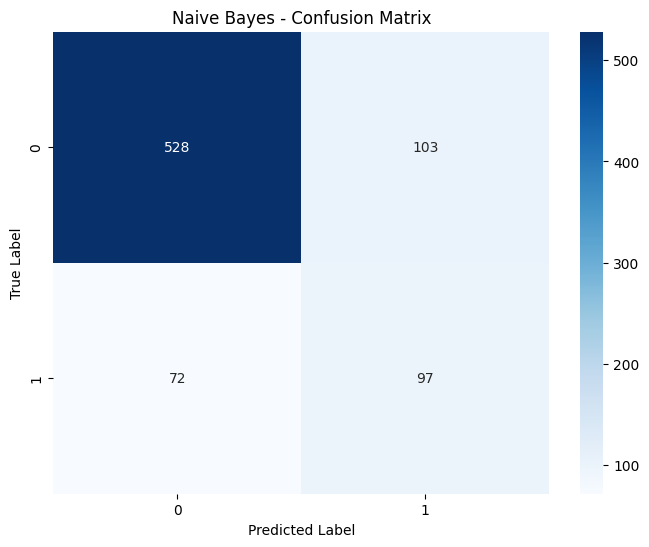

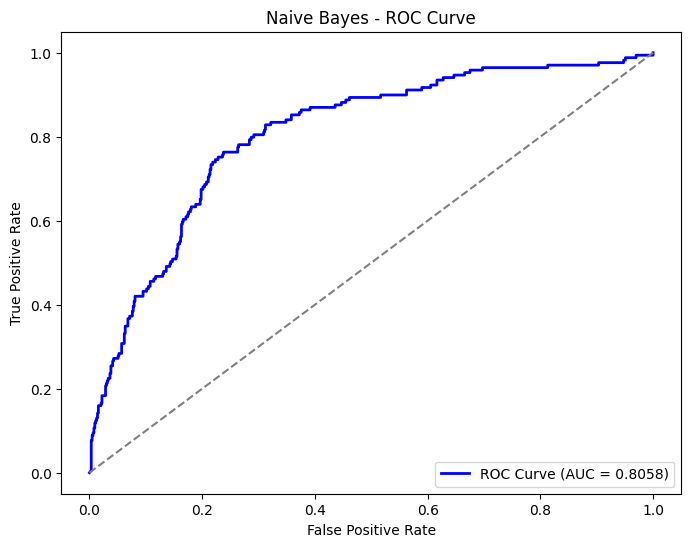

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
          'duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC curve

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# --- Visualization ---

# 1. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

# 2. ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Random Forest


In [ ]:
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators and other parameters as needed
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.81375
Confusion Matrix:
[[612  26]
 [123  39]]
Classification Report:
              precision    recall  f1-score   support

          no       0.83      0.96      0.89       638
         yes       0.60      0.24      0.34       162

    accuracy                           0.81       800
   macro avg       0.72      0.60      0.62       800
weighted avg       0.79      0.81      0.78       800



2nd Iteration Random Forest


Accuracy: 0.8300
Precision: 0.7538
Recall: 0.2899
F1-Score: 0.4188
ROC-AUC: 0.7550

Confusion Matrix:
[[615  16]
 [120  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       631
           1       0.75      0.29      0.42       169

    accuracy                           0.83       800
   macro avg       0.80      0.63      0.66       800
weighted avg       0.82      0.83      0.80       800



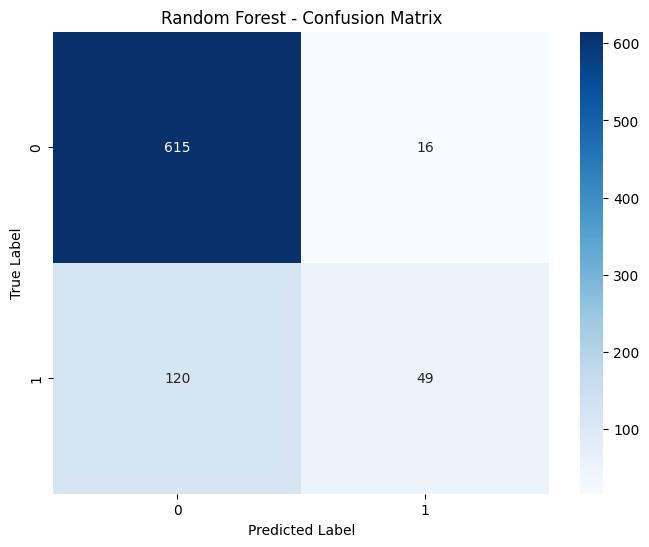

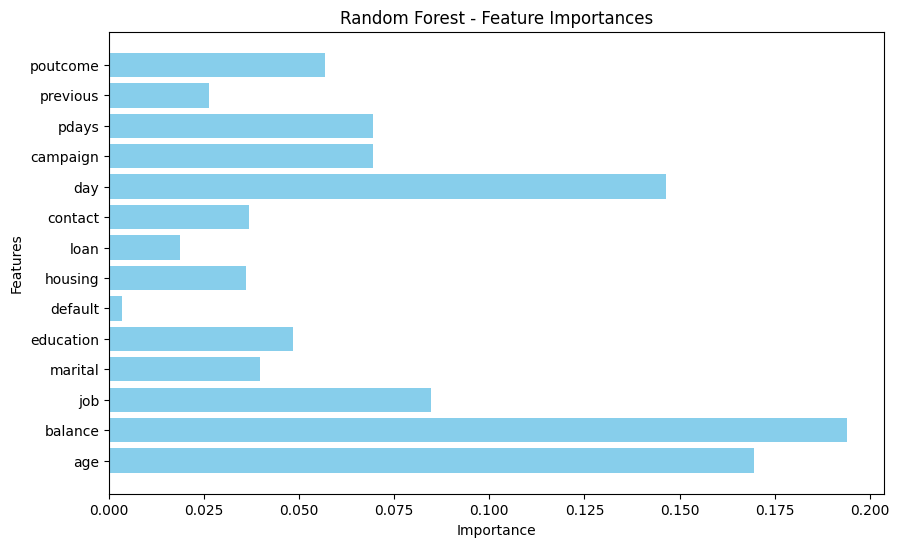

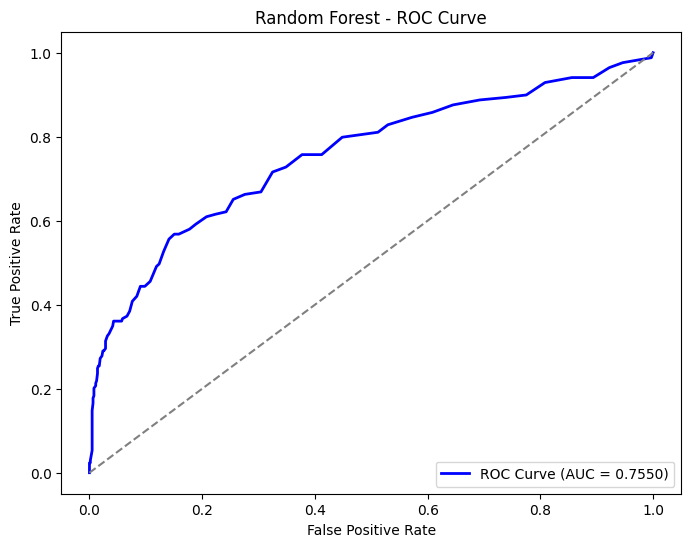

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
          'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable (optional)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC curve

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importances')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()


## K-Nearest Neighbors

Accuracy: 0.79625
Confusion Matrix:
[[598  40]
 [123  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       638
           1       0.49      0.24      0.32       162

    accuracy                           0.80       800
   macro avg       0.66      0.59      0.60       800
weighted avg       0.76      0.80      0.77       800



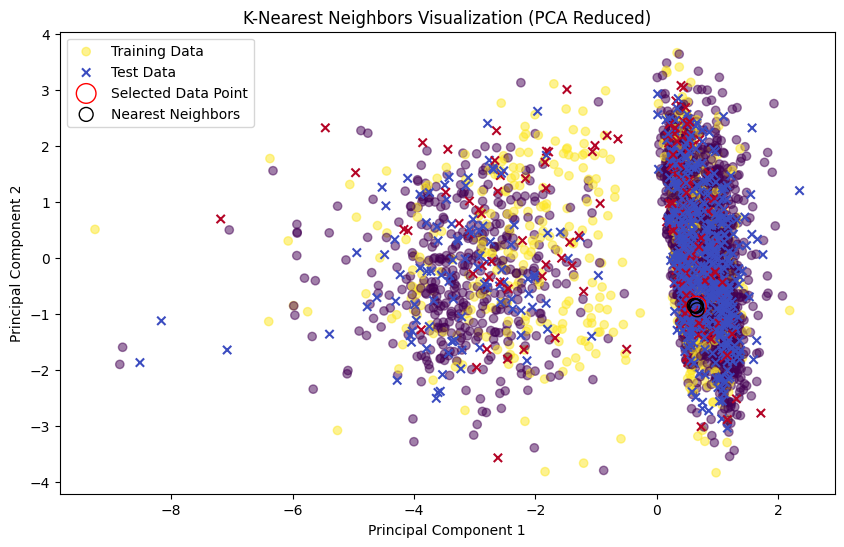

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
          'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])  # Encode categorical features

# Encode the target variable if it's categorical
y = LabelEncoder().fit_transform(y)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Visualization of a selected test data point and its neighbors
index_to_visualize = 10  # Select the index of the test data point
data_point = X_test[index_to_visualize]

# Find the nearest neighbors
distances, indices = model.kneighbors([data_point])

# Plot the training and test data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.5, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')

# Highlight the selected test point
plt.scatter(data_point[0], data_point[1], s=200, facecolors='none', edgecolors='red', label='Selected Data Point')

# Highlight the nearest neighbors
plt.scatter(X_train[indices[0], 0], X_train[indices[0], 1], s=100, facecolors='none', edgecolors='black', label='Nearest Neighbors')

# Plot settings
plt.title('K-Nearest Neighbors Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


2nd Nearest Neighbor Iteration

Accuracy: 0.7963
Precision: 0.4937
Recall: 0.2407
F1-Score: 0.3237
ROC-AUC: 0.6456

Confusion Matrix:
[[598  40]
 [123  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       638
           1       0.49      0.24      0.32       162

    accuracy                           0.80       800
   macro avg       0.66      0.59      0.60       800
weighted avg       0.76      0.80      0.77       800



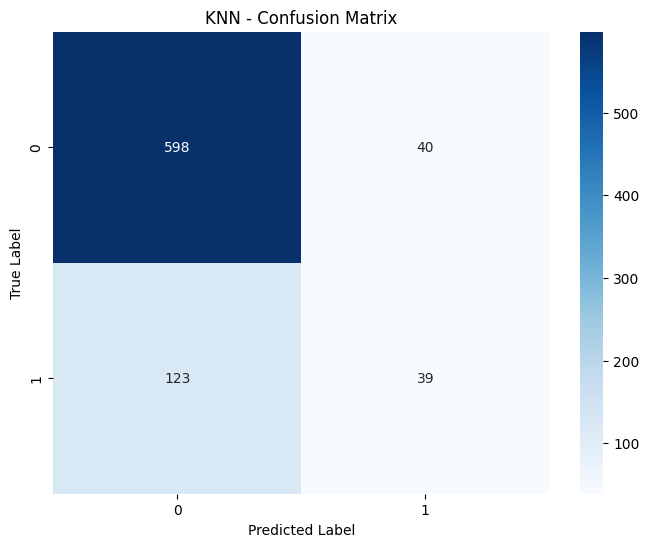

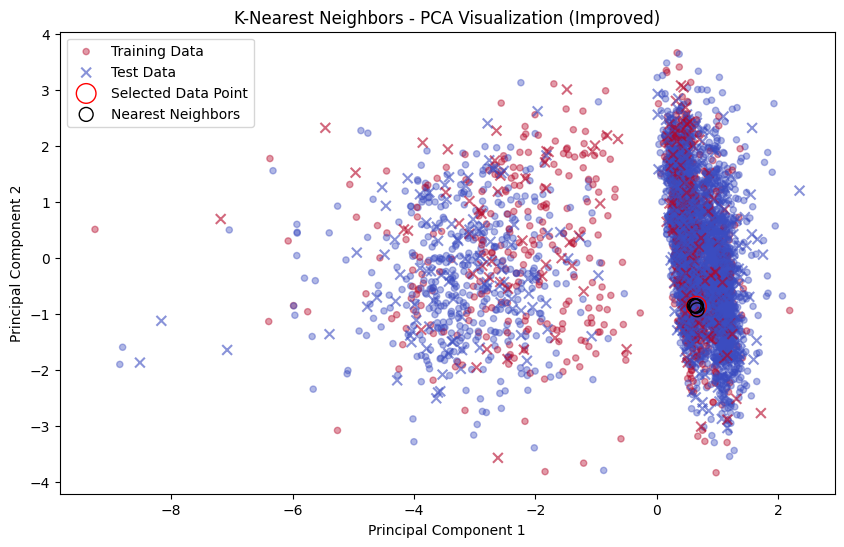

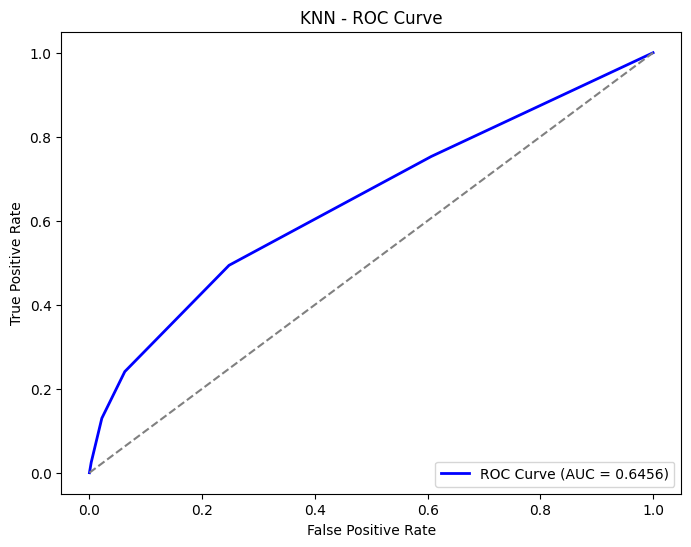

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
          'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])  # Encode categorical features

# Encode the target variable if it's categorical
y = LabelEncoder().fit_transform(y)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC curve

# --- Model Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# --- Visualizations ---

# 1. Improved Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN - Confusion Matrix')
plt.show()

# 2. Improved PCA Plot
plt.figure(figsize=(10, 6))

# Plot training data (lighter color)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.4, s=20, label='Training Data')

# Plot testing data (darker color)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, s=50, marker='x', label='Test Data')

# Highlight the selected test point
index_to_visualize = 10  # Choose any index of the test data point
data_point = X_test[index_to_visualize]
plt.scatter(data_point[0], data_point[1], s=200, facecolors='none', edgecolors='red', label='Selected Data Point')

# Find and plot nearest neighbors
distances, indices = model.kneighbors([data_point])
plt.scatter(X_train[indices[0], 0], X_train[indices[0], 1], s=100, facecolors='none', edgecolors='black', label='Nearest Neighbors')

# Plot settings
plt.title('K-Nearest Neighbors - PCA Visualization (Improved)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc="lower right")
plt.show()


Nearest Neighbor seems to be getting bad scores, which intuitively makes sense.

## Decision Tree

In [ ]:
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # Adjust parameters like max_depth, min_samples_split, etc. as needed
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8025
Confusion Matrix:
[[557  81]
 [ 77  85]]
Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.87      0.88       638
         yes       0.51      0.52      0.52       162

    accuracy                           0.80       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.80      0.80      0.80       800



Visualizing the decision tree

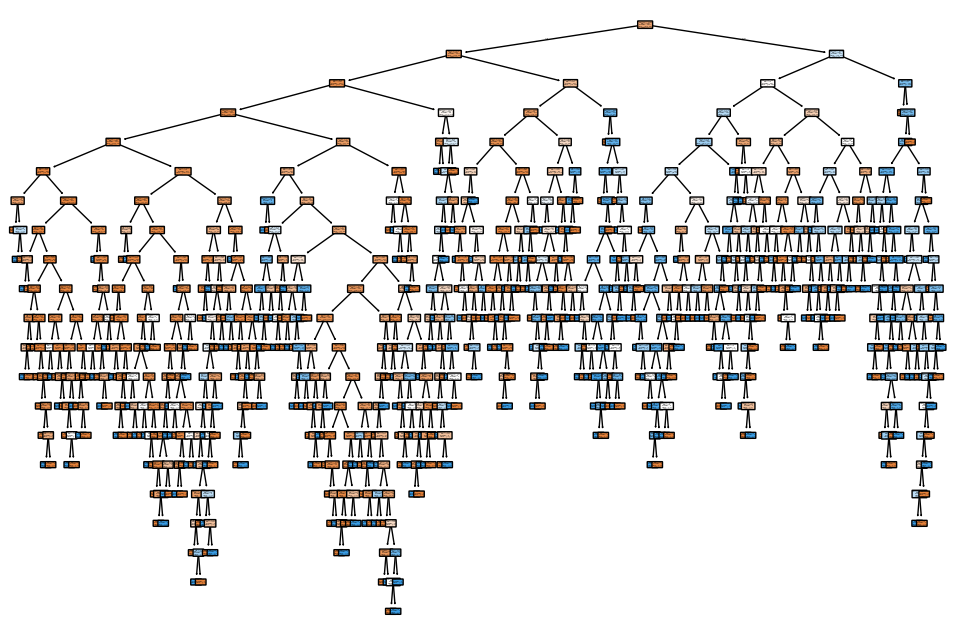

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()

2nd Iteration Decision Tree

Accuracy: 0.8125
Precision: 0.6429
Recall: 0.1667
F1-Score: 0.2647
ROC-AUC: 0.7140

Confusion Matrix:
[[623  15]
 [135  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       638
           1       0.64      0.17      0.26       162

    accuracy                           0.81       800
   macro avg       0.73      0.57      0.58       800
weighted avg       0.79      0.81      0.77       800



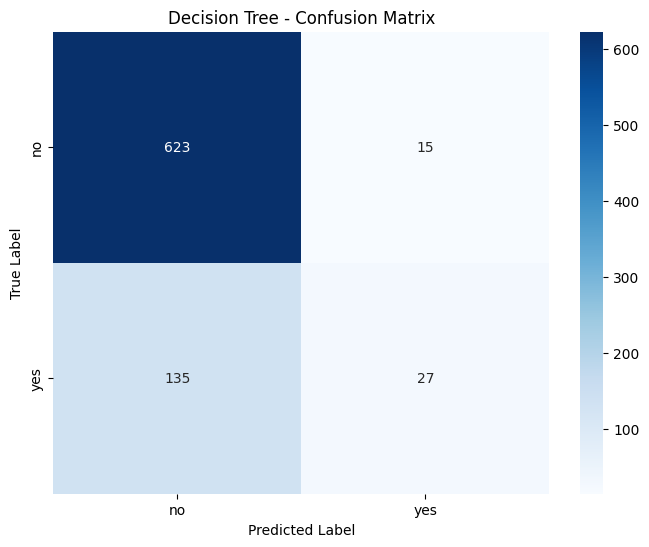

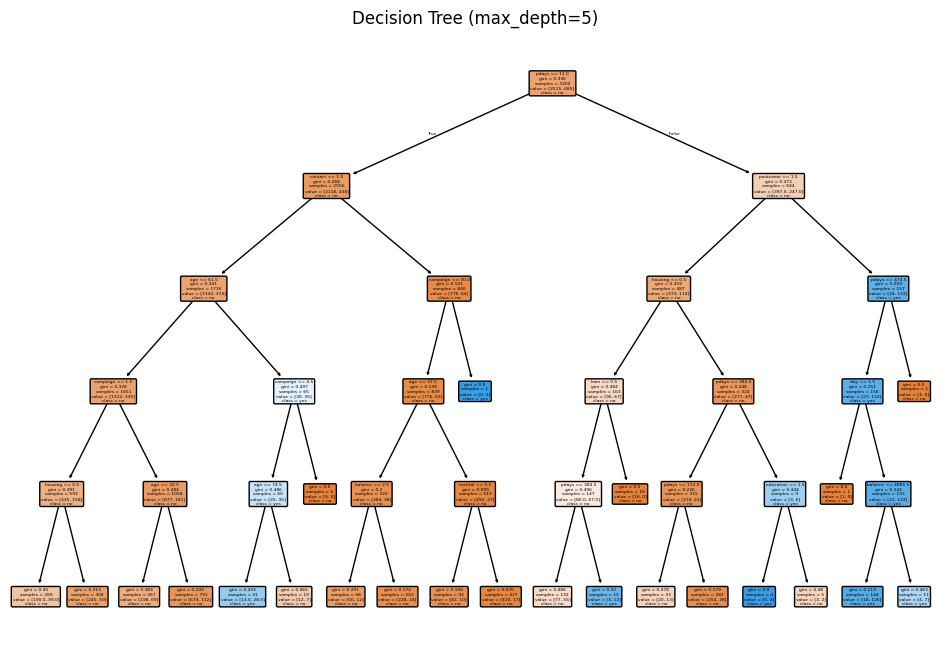

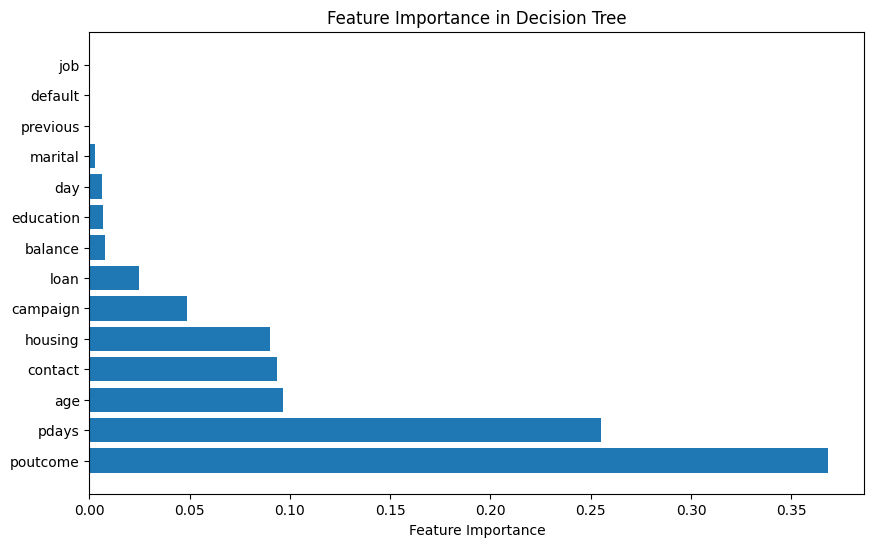

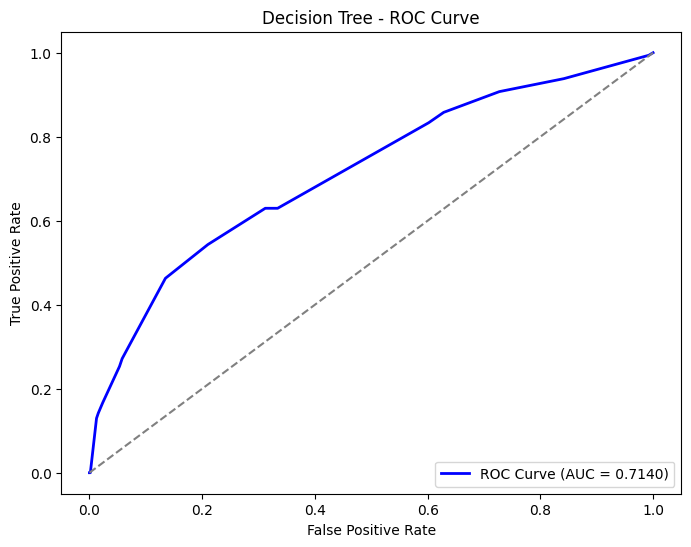

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Assuming 'data' is your DataFrame and it has already been loaded

# Prepare the features and target
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
          'day', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc for assignment

# Create a new LabelEncoder for the target variable
target_le = LabelEncoder()
y = target_le.fit_transform(y)  # Fit and transform the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model with max_depth to avoid overfitting
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit depth of the tree to make it interpretable
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC curve

# --- Model Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)

# Use numeric labels (0 for 'no' and 1 for 'yes') directly for metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # ROC-AUC can still use numeric labels
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# 2. Decision Tree Visualization (limited depth)
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree (max_depth=5)')
plt.show()

# 3. Feature Importance
importances = model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Random Forest Fine Tuning

Accuracy: 0.8275
Precision: 0.8780
Recall: 0.2130
F1-Score: 0.3429
ROC-AUC: 0.7664

Confusion Matrix:
[[626   5]
 [133  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       631
           1       0.88      0.21      0.34       169

    accuracy                           0.83       800
   macro avg       0.85      0.60      0.62       800
weighted avg       0.84      0.83      0.78       800

Mode Result: ModeResult(mode=0, count=631)
Mode of the target variable (y): 0


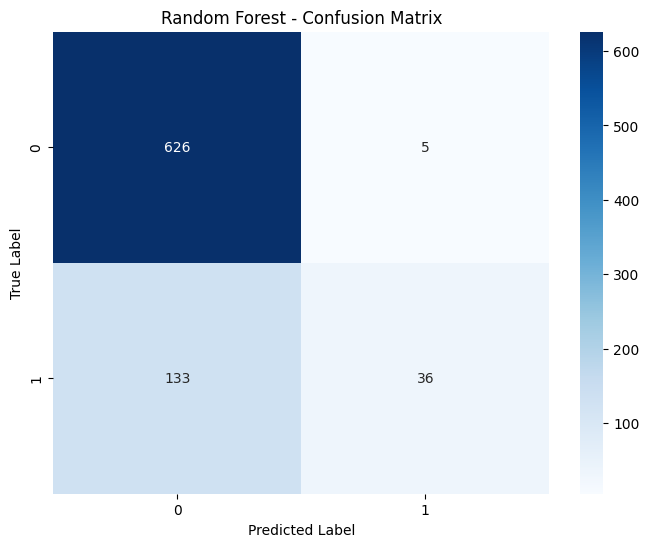

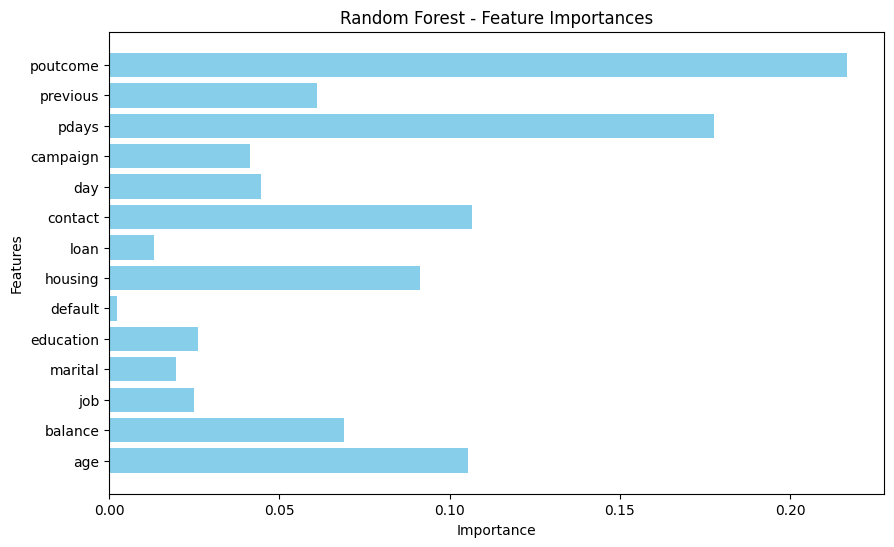

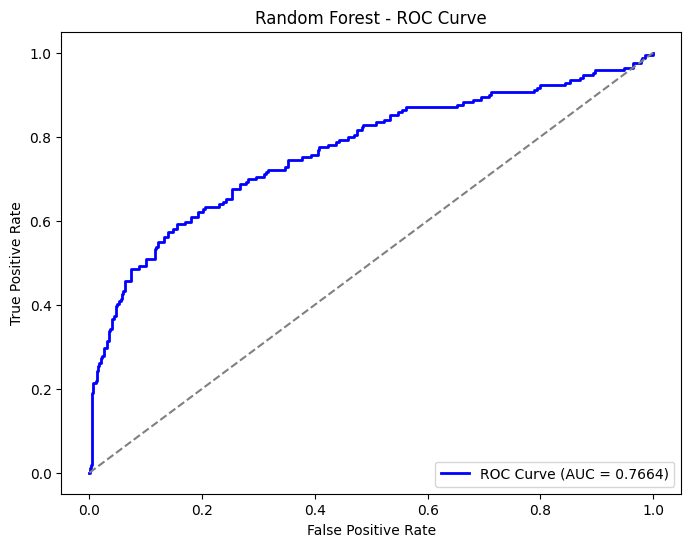

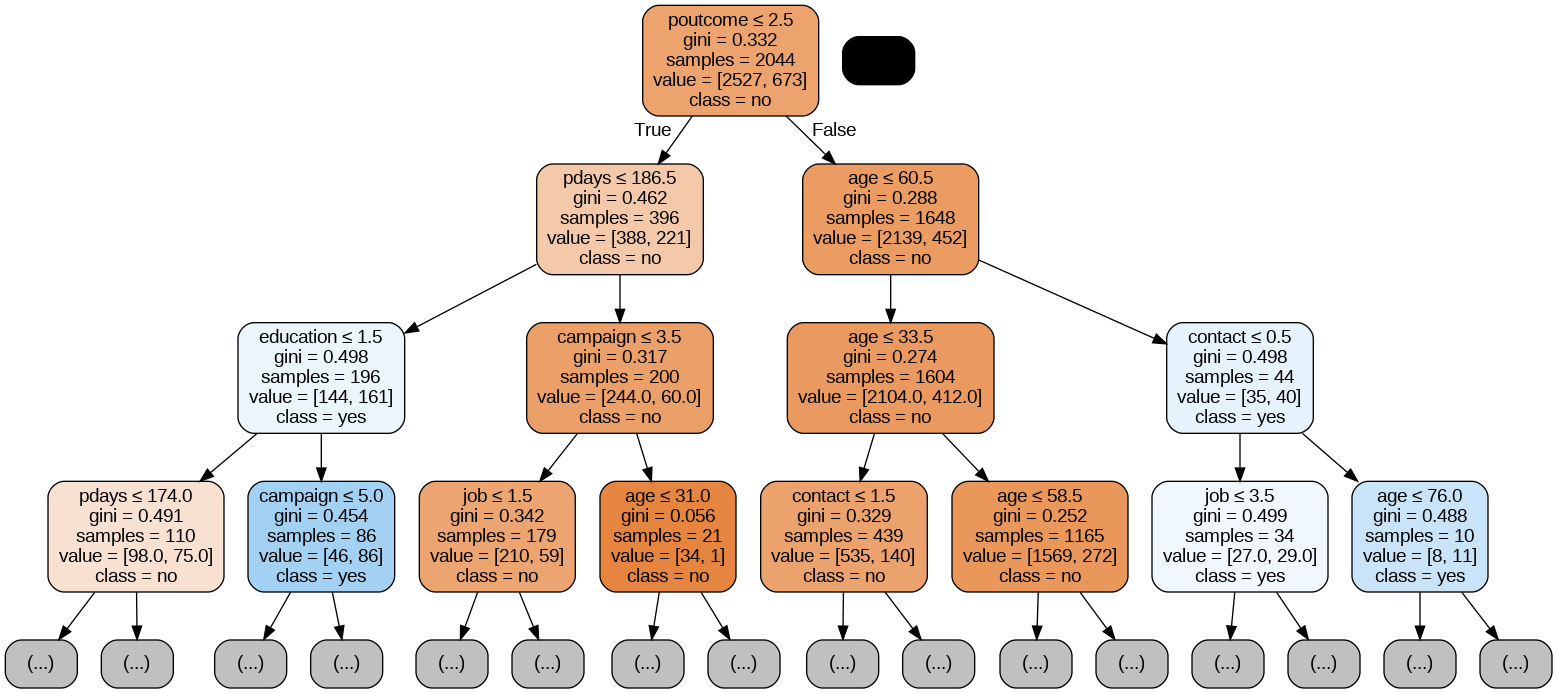

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable (optional)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Random Forest model with a max_depth to limit tree complexity
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Set max_depth to limit the size of individual trees
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC curve

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Display mode of the target variable (y)
mode_y = stats.mode(y_test)  # mode returns an object with mode values and counts

# Check the structure of the result
print(f"Mode Result: {mode_y}")

# Extract the mode value
if isinstance(mode_y.mode, np.ndarray):
    mode_y_value = mode_y.mode[0]  # Access the first mode value if it's an array
else:
    mode_y_value = mode_y.mode  # If it's already a scalar, use it directly

print(f"Mode of the target variable (y): {mode_y_value}")

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importances')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Visualize Random Forest - First Tree (with limited depth)
# Function to plot the tree with limited depth
def plot_tree(model, feature_names, class_names, tree_index=0, max_depth=3):
    tree = model.estimators_[tree_index]  # Get the tree based on the index
    dot_data = StringIO()
    export_graphviz(
        tree,
        out_file=dot_data,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=max_depth  # Limit the depth of the tree for better visualization
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Display the first tree in the Random Forest with a max_depth of 3
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], max_depth=3)



Random Forest Optimized with Adjusted Decision Threshold
- a decision threshold of .4 slighlty lowered precision, but increased recall which I was happy with.
- we miss a lot of true positives, but this aligns with the goal. It identitifes many negatives, which will help the company avoid fruitless calls.


Accuracy: 0.8263
Precision: 0.7143
Recall: 0.2959
F1-Score: 0.4184
ROC-AUC: 0.7664

Confusion Matrix:
[[611  20]
 [119  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       631
           1       0.71      0.30      0.42       169

    accuracy                           0.83       800
   macro avg       0.78      0.63      0.66       800
weighted avg       0.81      0.83      0.80       800

Mode Result: ModeResult(mode=0, count=631)
Mode of the target variable (y): 0


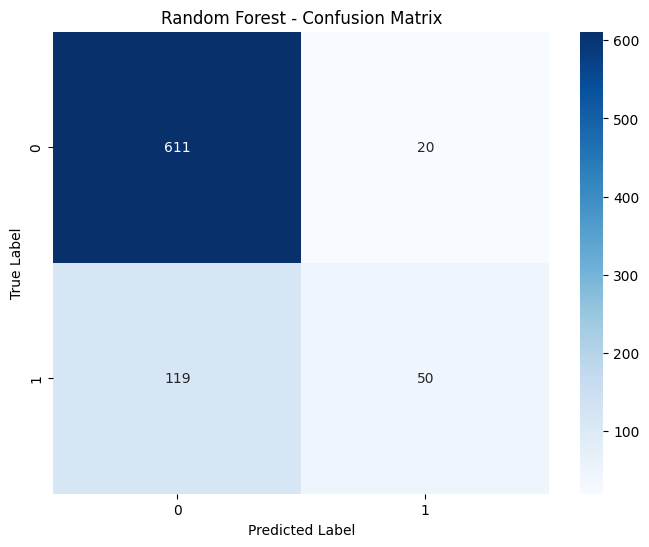

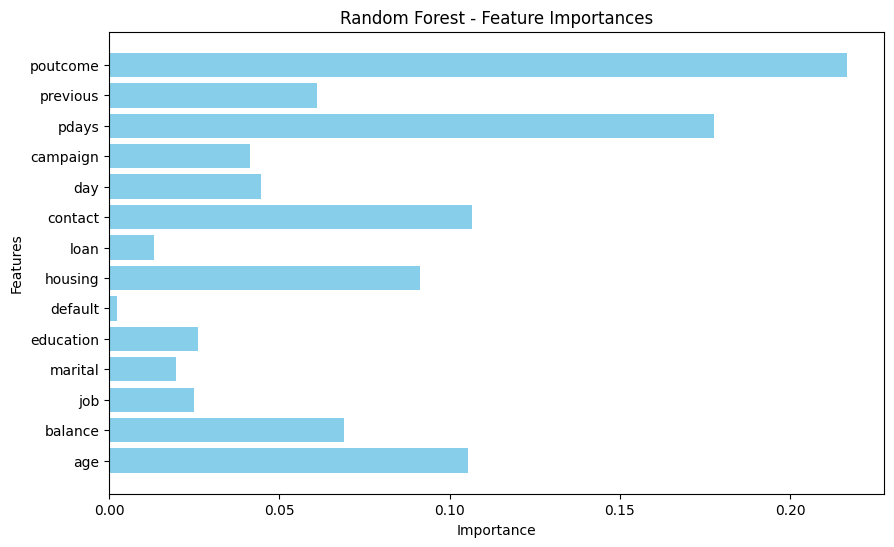

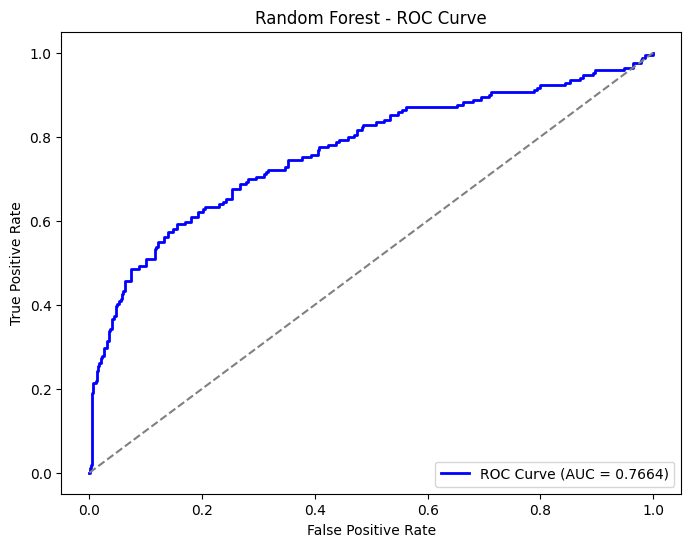

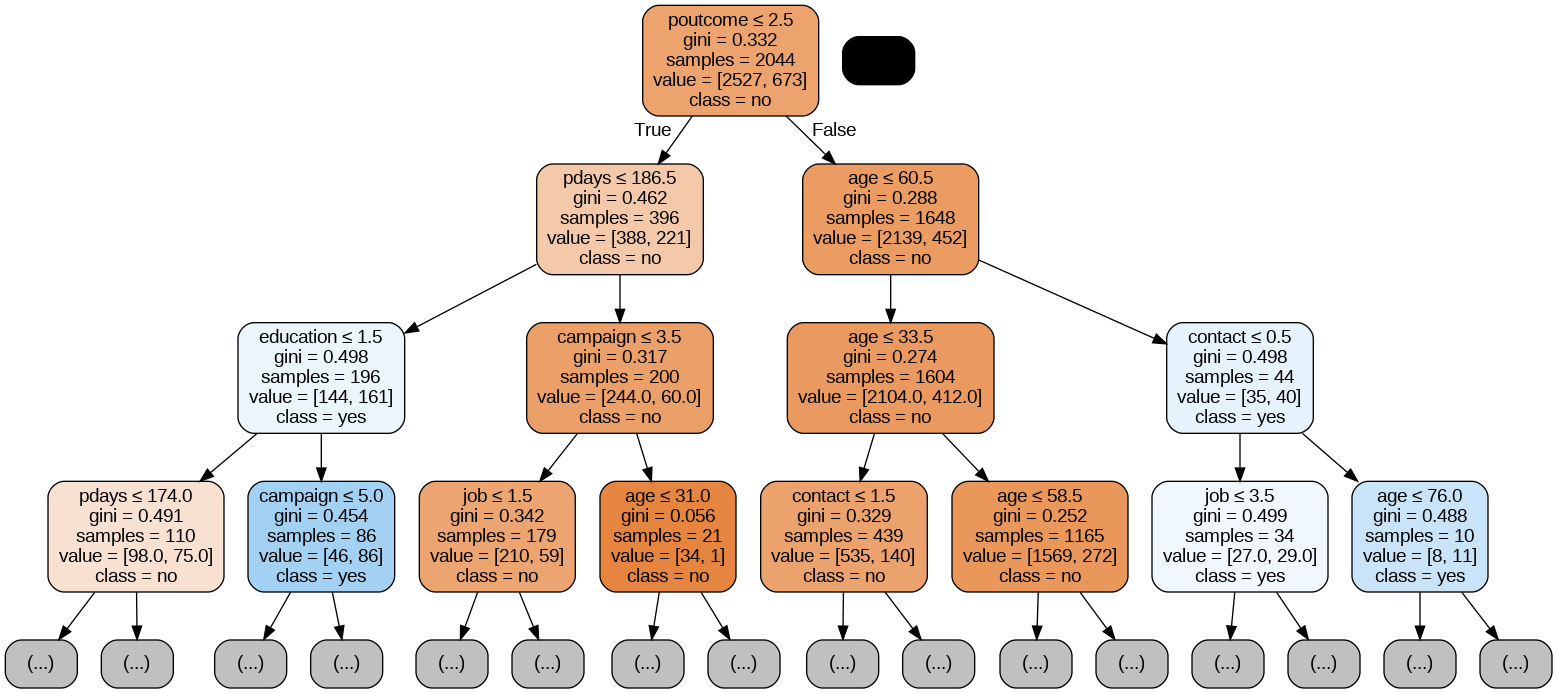

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable (optional)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Random Forest model with a max_depth to limit tree complexity
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Set max_depth to limit the size of individual trees
model.fit(X_train, y_train)

# Make predictions and get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class '1'

# --- Adjusted decision threshold ---
threshold = 0.4  # Change threshold to 0.4
y_pred = (y_pred_proba >= threshold).astype(int)  # Classify based on threshold

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Display mode of the target variable (y)
mode_y = stats.mode(y_test)  # mode returns an object with mode values and counts

# Check the structure of the result
print(f"Mode Result: {mode_y}")

# Extract the mode value
if isinstance(mode_y.mode, np.ndarray):
    mode_y_value = mode_y.mode[0]  # Access the first mode value if it's an array
else:
    mode_y_value = mode_y.mode  # If it's already a scalar, use it directly

print(f"Mode of the target variable (y): {mode_y_value}")

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importances')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Visualize Random Forest - First Tree (with limited depth)
# Function to plot the tree with limited depth
def plot_tree(model, feature_names, class_names, tree_index=0, max_depth=3):
    tree = model.estimators_[tree_index]  # Get the tree based on the index
    dot_data = StringIO()
    export_graphviz(
        tree,
        out_file=dot_data,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=max_depth  # Limit the depth of the tree for better visualization
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Display the first tree in the Random Forest with a max_depth of 3
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], max_depth=3)


Adjusted to handle class imbalance

Under-sampling majority class (0)
- this lowered precision way too much.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.7550
Precision: 0.4458
Recall: 0.6568
F1-Score: 0.5311
ROC-AUC: 0.7672

Confusion Matrix:
[[493 138]
 [ 58 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       631
           1       0.45      0.66      0.53       169

    accuracy                           0.76       800
   macro avg       0.67      0.72      0.68       800
weighted avg       0.80      0.76      0.77       800

Mode Result: ModeResult(mode=0, count=631)
Mode of the target variable (y): 0


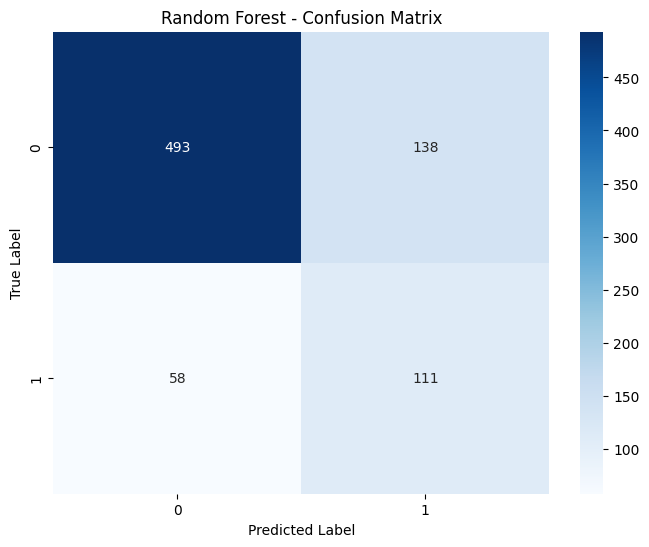

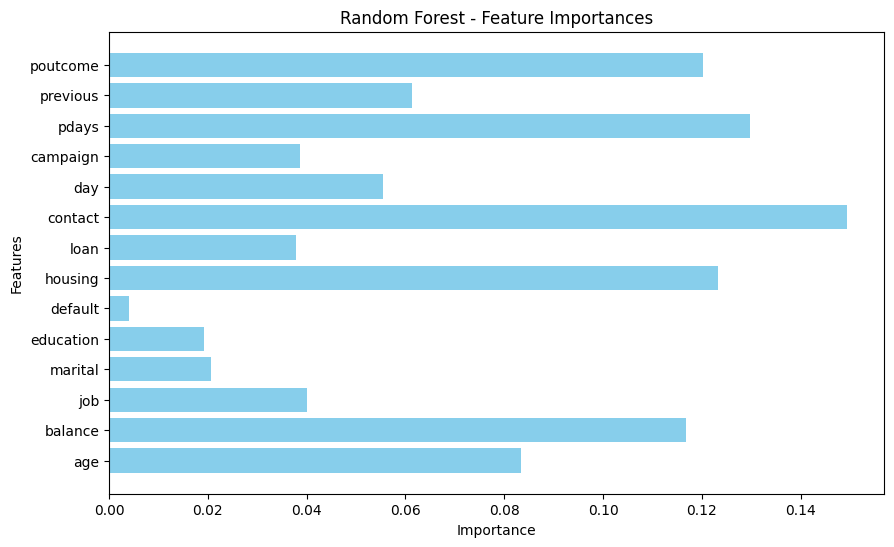

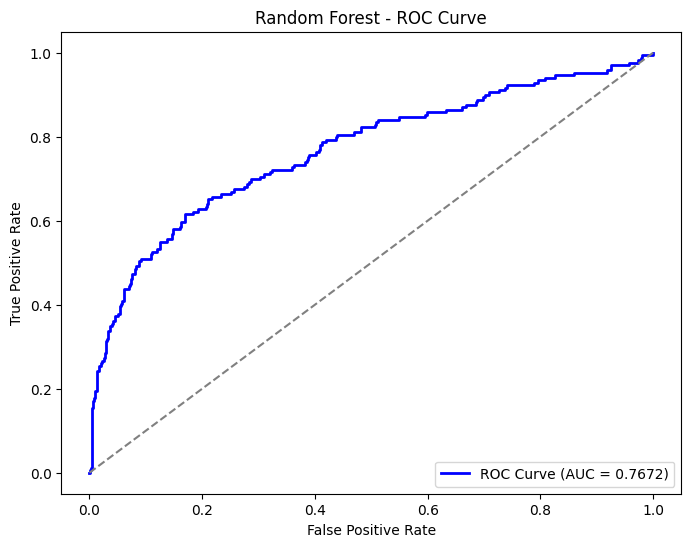

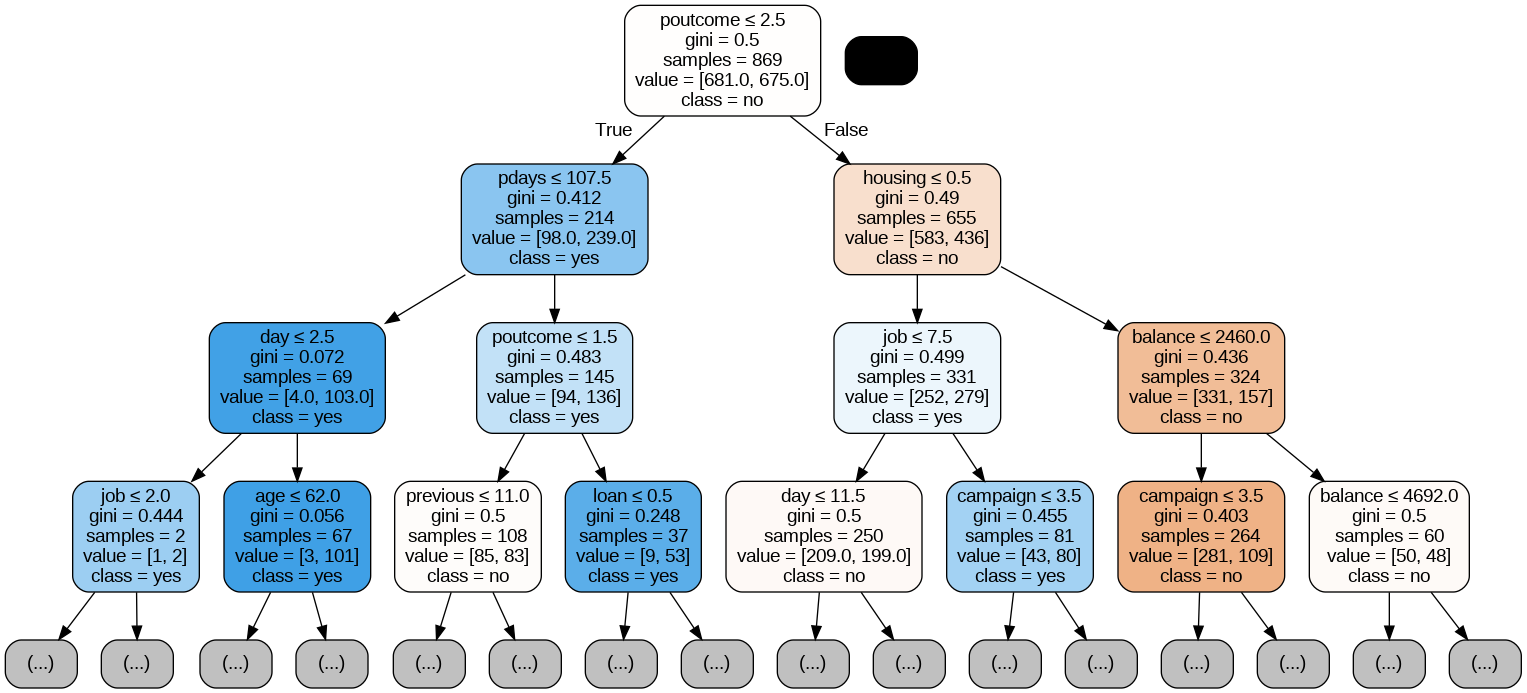

In [ ]:
# Import necessary libraries for under-sampling
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable (optional)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Handling class imbalance: Under-sampling ---
# Under-sample the majority class using RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Create and train the Random Forest model with class weights and max_depth to limit tree complexity
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions and get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class '1'

# --- Adjusted decision threshold ---
threshold = 0.5  # Increase threshold to boost precision
y_pred = (y_pred_proba >= threshold).astype(int)  # Classify based on new threshold

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Display mode of the target variable (y)
mode_y = stats.mode(y_test)  # mode returns an object with mode values and counts

# Check the structure of the result
print(f"Mode Result: {mode_y}")

# Extract the mode value
if isinstance(mode_y.mode, np.ndarray):
    mode_y_value = mode_y.mode[0]  # Access the first mode value if it's an array
else:
    mode_y_value = mode_y.mode  # If it's already a scalar, use it directly

print(f"Mode of the target variable (y): {mode_y_value}")

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importances')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Visualize Random Forest - First Tree (with limited depth)
# Function to plot the tree with limited depth
def plot_tree(model, feature_names, class_names, tree_index=0, max_depth=3):
    tree = model.estimators_[tree_index]  # Get the tree based on the index
    dot_data = StringIO()
    export_graphviz(
        tree,
        out_file=dot_data,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=max_depth  # Limit the depth of the tree for better visualization
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Display the first tree in the Random Forest with a max_depth of 3
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], max_depth=3)



#Final Model

##Random Forest

Accuracy: 0.8275
Precision: 0.8780
Recall: 0.2130
F1-Score: 0.3429
ROC-AUC: 0.7664

Confusion Matrix:
[[626   5]
 [133  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       631
           1       0.88      0.21      0.34       169

    accuracy                           0.83       800
   macro avg       0.85      0.60      0.62       800
weighted avg       0.84      0.83      0.78       800

Mode Result: ModeResult(mode=0, count=631)
Mode of the target variable (y): 0


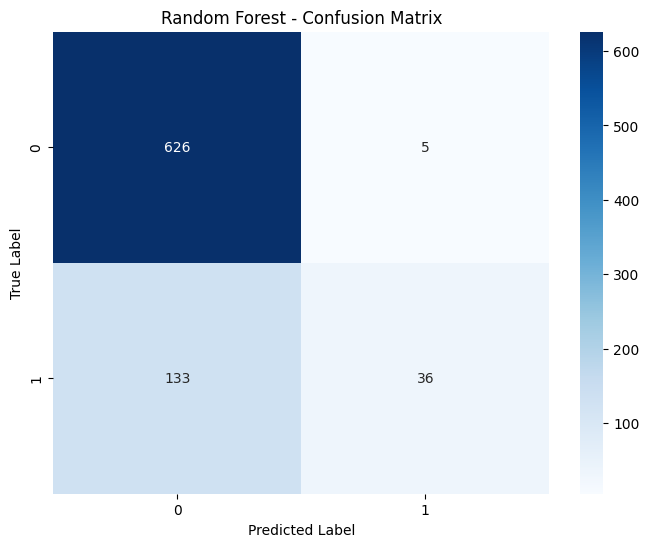

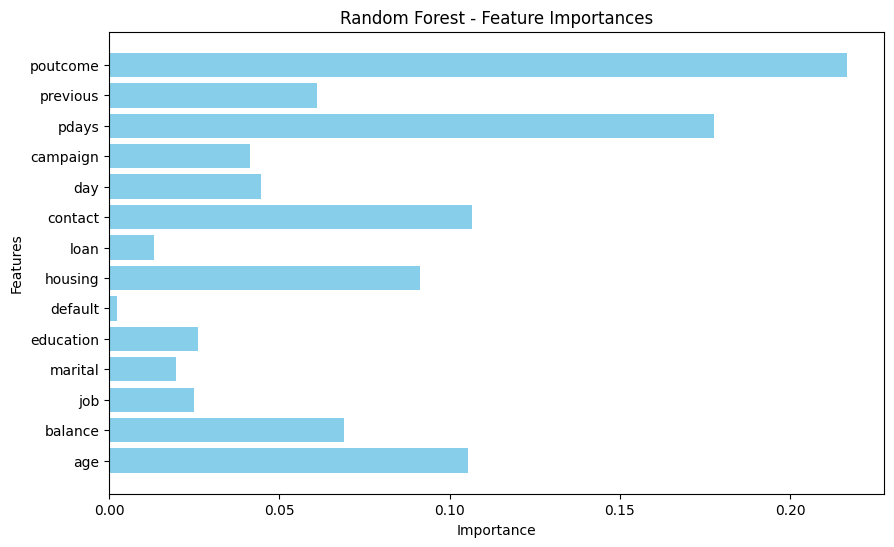

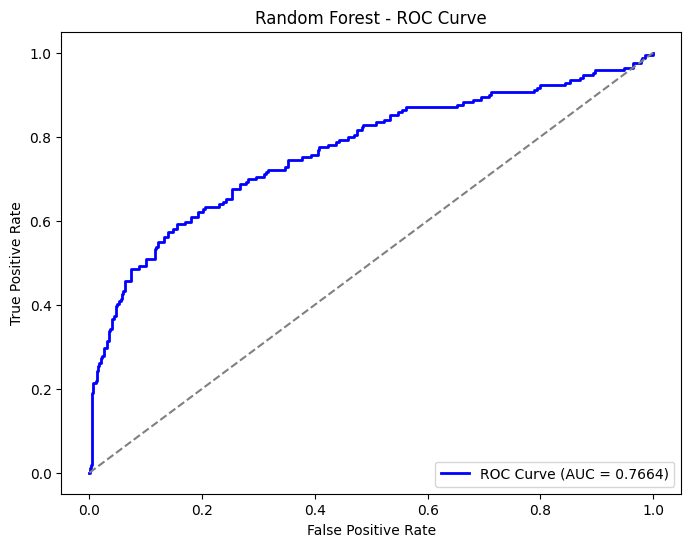

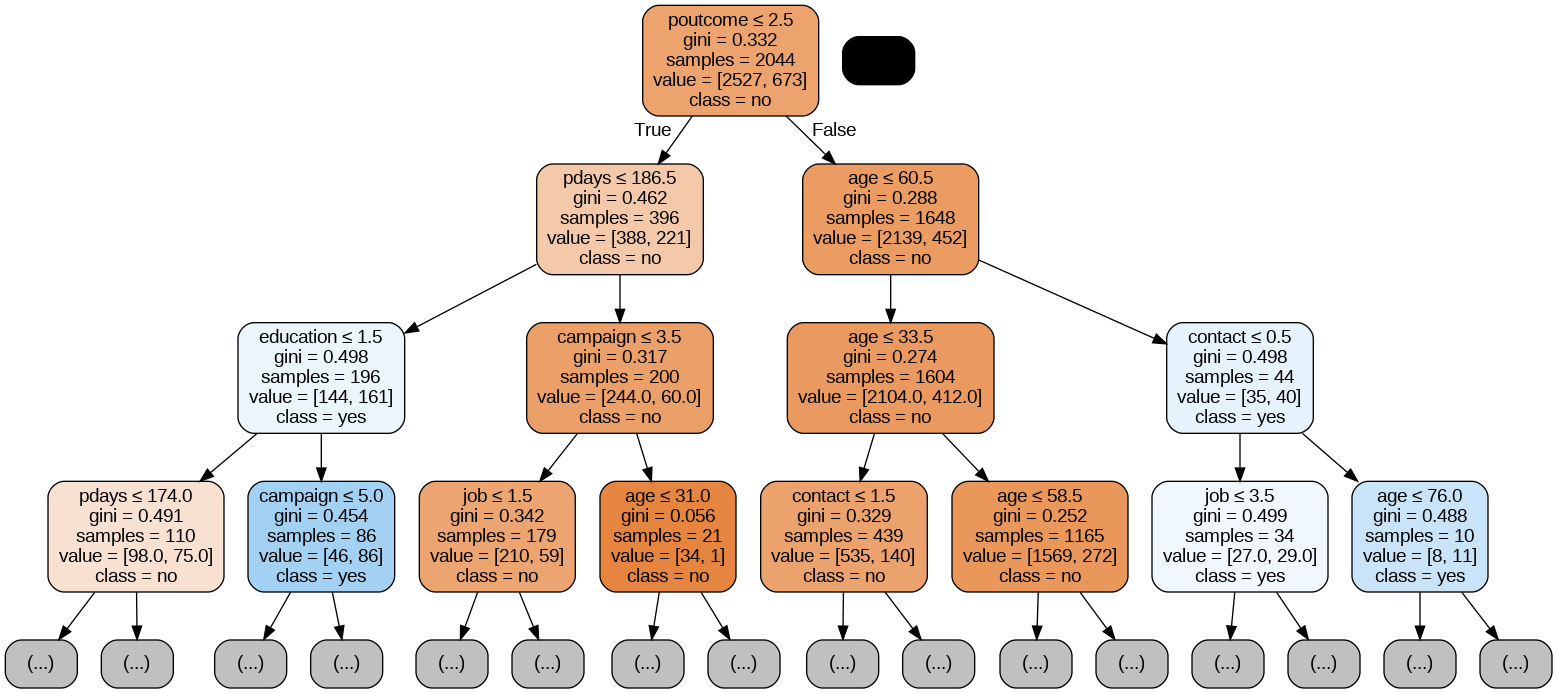

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Assuming 'data' is your DataFrame
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

# Encode categorical features using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable (optional)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Random Forest model with a max_depth to limit tree complexity
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Set max_depth to limit the size of individual trees
model.fit(X_train, y_train)

# Make predictions and get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class '1'

# --- Adjusted decision threshold ---
threshold = 0.5  # Change threshold to 0.5
y_pred = (y_pred_proba >= threshold).astype(int)  # Classify based on threshold

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Display mode of the target variable (y)
mode_y = stats.mode(y_test)  # mode returns an object with mode values and counts

# Check the structure of the result
print(f"Mode Result: {mode_y}")

# Extract the mode value
if isinstance(mode_y.mode, np.ndarray):
    mode_y_value = mode_y.mode[0]  # Access the first mode value if it's an array
else:
    mode_y_value = mode_y.mode  # If it's already a scalar, use it directly

print(f"Mode of the target variable (y): {mode_y_value}")

# --- Visualizations ---

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importances')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Visualize Random Forest - First Tree (with limited depth)
# Function to plot the tree with limited depth
def plot_tree(model, feature_names, class_names, tree_index=0, max_depth=3):
    tree = model.estimators_[tree_index]  # Get the tree based on the index
    dot_data = StringIO()
    export_graphviz(
        tree,
        out_file=dot_data,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=max_depth  # Limit the depth of the tree for better visualization
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Display the first tree in the Random Forest with a max_depth of 3
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], max_depth=3)

## User-Friendly Model

Threshold: 0.40
Accuracy: 0.8263
Precision: 0.7143
Recall: 0.2959

Confusion Matrix:
[[611  20]
 [119  50]]


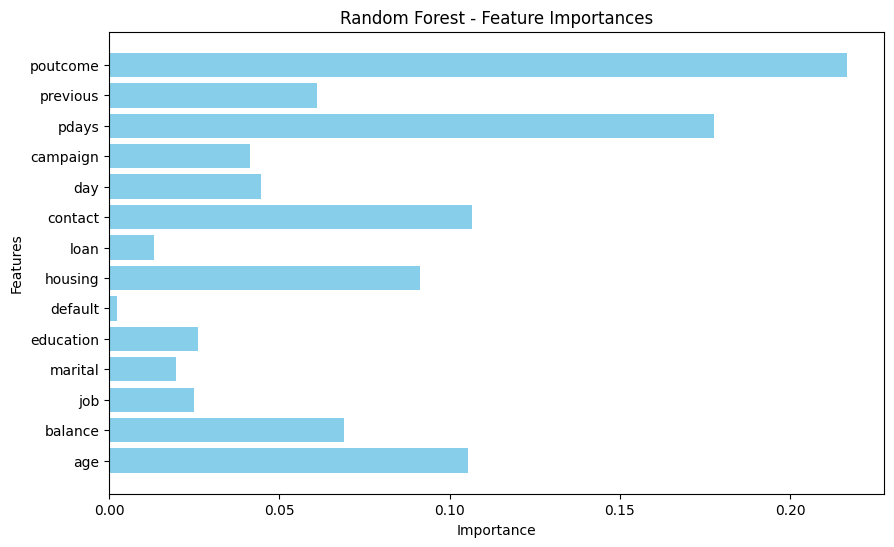


List of All True Positive Predictions:
      Customer #
2882        2882
2058        2058
2536        2536
164          164
1010        1010
2651        2651
1324        1324
2548        2548
520          520
3252        3252
3864        3864
1813        1813
3117        3117
3407        3407
2488        2488
3471        3471
1598        1598
2198        2198
2056        2056
3106        3106
610          610
3685        3685
3563        3563
1923        1923
2342        2342
2941        2941
2204        2204
1611        1611
1694        1694
1961        1961
338          338
3911        3911
1662        1662
2524        2524
939          939
2532        2532
1701        1701
850          850
3286        3286
513          513
1549        1549
1469        1469
2009        2009
765          765
1752        1752
3868        3868
2816        2816
246          246
3098        3098
2291        2291

New True Positives (with Threshold: 0.40):
Empty DataFrame
Columns: [Customer #]
Index: []



In [ ]:
#STEP 1: Define the data you wish to use
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

#STEP 2: Encode categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Add a 'Customer #' column to X_test for easier referencing
X_test = X_test.copy()
X_test.insert(0, 'Customer #', X_test.index)

# Function to run the Random Forest model with adjustable threshold
def run_model(threshold):
    # Clear the output
    from IPython.display import clear_output
    clear_output(wait=True)

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and get probabilities
    y_pred_proba = model.predict_proba(X_test.iloc[:, 1:])[:, 1]  # Exclude 'Customer #' column
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display metrics
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Feature importance graph
    feature_importances = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importances, color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Random Forest - Feature Importances')
    plt.show()

    # Get and display true positives
    true_positives = X_test[(y_pred == 1) & (y_test == 1)]

    print("\nList of All True Positive Predictions:")
    print(true_positives[['Customer #']])

    return true_positives, model

#STEP 3: Adjust initial threshold (default is .5)
threshold = 0.5
all_true_positives = set()
while True:
    true_positives, model = run_model(threshold)

    # New true positives
    new_true_positives = set(true_positives.index) - all_true_positives
    print(f"\nNew True Positives (with Threshold: {threshold:.2f}):")
    print(true_positives.loc[list(new_true_positives), ['Customer #']])

    # Update record of all true positives
    all_true_positives.update(true_positives.index)

    # Display caution message if threshold is <= 0.3
    if threshold <= 0.3:
        print("\nCAUTION: Precision of the model is quite unreliable at such low threshold levels.")

    # Ask user if they want to continue
    print("\nOptions:")
    print("1. 'yes' - Continue and lower the threshold by 0.05")
    print("2. 'export' - Export results to a CSV file (data of all customers to contact)")
    print("3. 'terminate' - Exit the loop")
    response = input("Choose an option (yes/export/terminate): ").strip().lower()

    if response == 'yes':
        threshold -= 0.05
    elif response == 'export':
        filename = input("Enter the filename for the CSV (e.g., 'output.csv'): ").strip()
        all_customers = X_test.loc[list(all_true_positives)].copy()
        all_customers.to_csv(filename, index=False)
        print(f"Data exported to {filename}")
    elif response == 'terminate':
        break
    else:
        print("Invalid option. Please choose 'yes', 'export', or 'terminate'.")

print("Model iterations complete.")

#User Friendly Model Trained on Entire Data Set

##STEP 1: Load New Data

In [11]:
#Change the .csv to the new data csv file
data = pd.read_csv('coursework_data_20595117.csv')

Display first 5 lines of data & column names

In [7]:
data.head()

age          job  marital  education default  balance housing loan  \
0   45  blue-collar  married    primary      no      300     yes   no   
1   35       admin.  married   tertiary      no      163     yes   no   
2   29  blue-collar  married    primary      no        5      no   no   
3   46   technician  married  secondary      no      488      no   no   
4   56     services   single  secondary      no      699     yes   no   

    contact  day  duration  campaign  pdays  previous poutcome    y  
0  cellular   29       203         1    261         3  failure   no  
1  cellular    6       126         6     -1         0  unknown   no  
2  cellular    3       321         1     -1         0  unknown  yes  
3   unknown    5        92         1     -1         0  unknown   no  
4  cellular   20       193         1     -1         0  unknown   no

##STEP 2: Ensure column names are correctly referenced, and encode the variables that are categorical in nature

In [12]:
#STEP 2A: Define the data you wish to use (ensure column names match exactly)
X = data[['age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day',
         'campaign', 'pdays', 'previous', 'poutcome']].copy()
y = data['y']

#STEP 2B: Encode categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

##STEP 3: Run the model and choose training parameter

*   Set retrain = True if you wish to retrain the model on new data
*   Set retrain = False if you wish to use the previously trained model




Threshold: 0.50
Accuracy: 0.8237
Precision: 0.8622
Recall: 0.1995

Confusion Matrix:
[[3126   27]
 [ 678  169]]


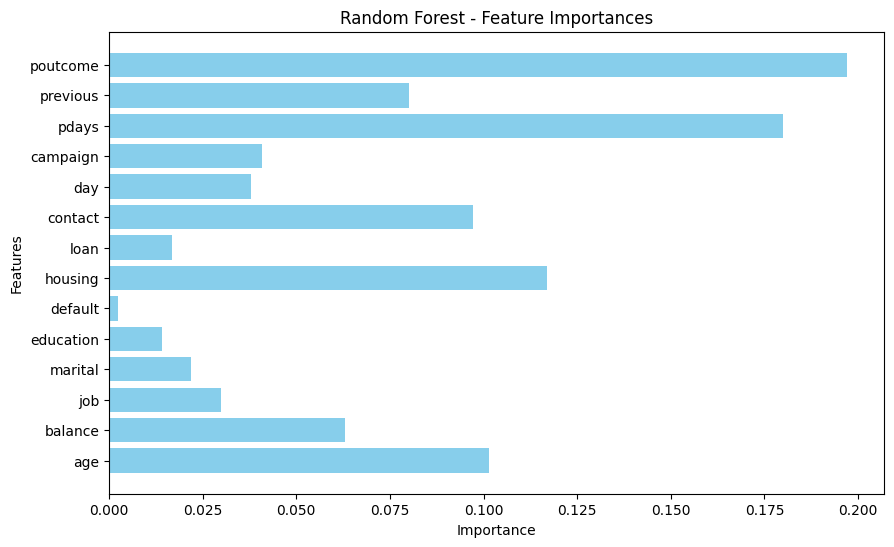


List of All True Positive Predictions:
      Customer #
47            47
53            53
115          115
164          164
186          186
...          ...
3949        3949
3950        3950
3953        3953
3962        3962
3974        3974

[169 rows x 1 columns]

New True Positives (with Threshold: 0.50):
      Customer #
513          513
520          520
1033        1033
2056        2056
2058        2058
...          ...
1010        1010
2548        2548
3065        3065
510          510
2047        2047

[169 rows x 1 columns]

Options:
1. 'yes' - Continue and lower the threshold by 0.05
2. 'export' - Export results to a CSV file (data of all customers to contact)
3. 'terminate' - Exit the loop
Choose an option (yes/export/terminate): Terminate
Model iterations complete.


In [13]:
# Encode target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Add a 'Customer #' column for easier referencing in results (optional)
X.insert(0, 'Customer #', X.index)


# Function to train the Random Forest model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train.iloc[:, 1:], y_train)  # Exclude 'Customer #' column for training
    return model


# Function to evaluate the model with an adjustable threshold
def evaluate_model(model, X_eval, y_eval, threshold):
    # Make predictions and get probabilities
    y_pred_proba = model.predict_proba(X_eval.iloc[:, 1:])[:, 1]  # Exclude 'Customer #' column
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    accuracy = accuracy_score(y_eval, y_pred)
    conf_matrix = confusion_matrix(y_eval, y_pred)

    # Display metrics
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Feature importance graph
    feature_importances = model.feature_importances_
    features = X_eval.columns[1:]  # Exclude 'Customer #' column
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importances, color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Random Forest - Feature Importances')
    plt.show()

    # Get and display true positives
    true_positives = X_eval[(y_pred == 1) & (y_eval == 1)]

    print("\nList of All True Positive Predictions:")
    print(true_positives[['Customer #']])

    return true_positives


# Main loop for threshold adjustment and exporting results
#STEP 3: ADJUST RETRAIN ATTRIBUTE IF REQUIRED
def main_loop(threshold, X_train, y_train, X_new=None, y_new=None, retrain=True):
    global model
    if retrain or 'model' not in globals():
        model = train_model(X_train, y_train)

    # Evaluate on the current or new dataset
    X_eval = X_train if X_new is None else X_new
    y_eval = y_train if y_new is None else y_new

    all_true_positives = set()
    while True:
        true_positives = evaluate_model(model, X_eval, y_eval, threshold)

        # New true positives
        new_true_positives = set(true_positives.index) - all_true_positives
        print(f"\nNew True Positives (with Threshold: {threshold:.2f}):")
        print(true_positives.loc[list(new_true_positives), ['Customer #']])

        # Update record of all true positives
        all_true_positives.update(true_positives.index)

        # Display caution message if threshold is <= 0.3
        if threshold <= 0.3:
            print("\nCAUTION: Precision of the model is quite unreliable at such low threshold levels.")

        # Ask user if they want to continue
        print("\nOptions:")
        print("1. 'yes' - Continue and lower the threshold by 0.05")
        print("2. 'export' - Export results to a CSV file (data of all customers to contact)")
        print("3. 'terminate' - Exit the loop")
        response = input("Choose an option (yes/export/terminate): ").strip().lower()

        if response == 'yes':
            threshold -= 0.05
        elif response == 'export':
            filename = input("Enter the filename for the CSV (e.g., 'output.csv'): ").strip()
            all_customers = X_eval.loc[list(all_true_positives)].copy()
            all_customers.to_csv(filename, index=False)
            print(f"Data exported to {filename}")
        elif response == 'terminate':
            break
        else:
            print("Invalid option. Please choose 'yes', 'export', or 'terminate'.")

    print("Model iterations complete.")


# Example Usage
# Retrain the model and evaluate it on the original dataset
main_loop(threshold=0.5, X_train=X, y_train=y, retrain=True)

# Reuse the trained model to analyze a new dataset
# new_data = pd.read_csv('new_data.csv')
# Preprocess new_data as per the original steps
# main_loop(threshold=0.5, X_train=X, y_train=y, X_new=new_data, y_new=new_data['y'], retrain=False)

